### Table of Contents

#### [1. Introduction](#1)
* [1.1 Exploratory Questions](#1.1)
* [1.2 Data Cleaning and Formatting](#1.2)
    * [1.2.1 First Look at Data](#1.2.1)
    * [1.2.2 Data Formatting/Cleaning Process](#1.2.2)
        * [1.2.2.1 Formatting the Order Month](#1.2.2.1)
        * [1.2.2.2 Msaking an 'Order Date' Column](#1.2.2.2)
        * [1.2.2.3 Making a Year + Quarter Column](#1.2.2.3)
        * [1.2.2.4 Creating Revenue and Profit Columns](#1.2.2.4)
        * [1.2.2.5 Temporary Removal of Some Values](#1.2.2.5)
   
#### [2. Overall](#1)

#### [3. Product Focus](#3)
* [3.1 Trends](#3.1)
    * [3.1.1 Revenue Trend](#3.1.1)
    * [3.1.2 Trend of Quantity Sold vs Profit Earned per Item Category](#3.1.2)
* [3.2 Comparisons](#3.2)
    * [3.2.1 Profit Generated per Item Category in 2018Q3](#3.2.1)
    * [3.2.2 Quantity Sold per Item Category in 2018Q3](#3.2.2)
    * [3.2.3 Profit Generated per Item Category for All Time](#3.2.3)
    * [3.2.4 Quantioty Sold per Item Category for All Time](#3.2.4)
    * [3.2.5 Profit Generated per Item in 2018Q3](#3.2.5)
    * [3.2.6 Quantity Sold per Item in 2018Q3](#3.2.6)
    * [3.2.7 Profit generated per Item for All Time](#3.2.7)
    * [3.2.8 Quantity Sold per Item for All Time](#3.2.8)
    
#### [4. Customer Focus](#4)
* [4.1 Profit gained per Customer in 2018Q3](#4.1)
* [4.2 Number of Orders Placed per Customer in 2018Q3](#4.2)
* [4.3 Profit Gained per Customer for All Time](#4.3)
* [4.4 Number of Orders Placed per Customer for All Time](#4.4)
* [4.5 Average Amount Spent per Order per Customer for All Time](#4.5)
* [4.6 Average  Amount Spent per Order per Custometr in 2018Q3](#4.6)

#### [5. Region Focus](#5)
* [5.1 Number of Customers per Country](#5.1)
* [5.2 Amount of Profit Generated per Country in 2018Q3](#5.2)
* [5.3 Amount of Profit Generated per Country for All Time](#5.3)
* [5.4 Total Number of Items Bought per Country in 2018Q3](#5.4)
* [5.5 Total Number of Items Bought per Country for All Time](#5.5)
* [5.6 Number of Orders Made per Country in 2018Q3](#5.6)
* [5.7 Number of Orders Made per Country for All Time](#5.7)

#### [6. Dashboards](#6)
* [6.1 Sales Trends by Financial Quarter/Product Category](#6.1)
* [6.2 Product and Product Category Sales Statistics for 2018Q3](#6.2)
* [6.3 Product Category Profit Gained VS Quantity Sold](#6.3)
* [6.4 Customer Sales Statistics for 2018Q3](#6.4)
* [6.5 Country Sales Statistics for 2018Q3](#6.5)

#### [7. What may be done in 2019 to increase profit/revenue?](#7)
                    

# 1. Introduction <a id='1'></a>

## 1.1 Exploratory Questions <a id='1.1'></a>

This is the list of exploratory questions

<b>Overall

    What may be done in 2019 to increase profit/revenue?

<b>Product centric
1. Which product/category has generated the most profit during the last quarter? The most revenue? The most number of sales?
2. Is this increase in sales quantity/profit/revenue a temporarily high one or a more permanent one?

<b>Customer centric
1. What is the profit gained from each customer from the last quarter? during all time?
2. What is the average amount spent per customer?
3. How many times has each customer bought items from the company?

<b>Region centric
1. Which country is the majority of the customers from?
2. What is the amount of profit made from each country?
3. Which country has bought the most number of items from the company?
4. Which country has made the most orders?

[back to top](#1)

## 1.2 Data Cleaning and Formatting <a id='1.2'></a>

### 1.2.1 First Look at Data <a id='1.2.1'></a>

At first the data looked rather complete to me since there were no missing pieces of data

As seen below, there was no instances of null values

In [1]:
# Import NumPy, Pandas libraries, matplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.gridspec import GridSpec

#read the csv file given
df = pd.read_csv('Dart Sales Transactional Data.csv')

# Create a copy of the DataFrame, df_bkup
df_bkup = df.copy()

#checking for value types in df
df.dtypes.value_counts()

object     8
int64      4
float64    4
dtype: int64

However I soon realised that the order dates had their year, month, and day split into the different Order Year, Order Month, and Order Day columns respectively.
This would have made it difficult for me to follow the order timelines and put them into a graph.
The quarter in which the order was placed was also not formatted properly into the name and format that I had wanted/needed

Therefore I had to make new date and quarter columns.

[back to top](#1)

### 1.2.2 Data Formatting/Cleaning Process <a id='1.2.2'></a>

#### 1.2.2.1 Formatting the Order Month <a id='1.2.2.1'></a>

I first changed the months from their names to their respective month number.

Meaning,


January was changed to 1,


February to 2,


March to 3,

and so on.

In [2]:
#changing month from string to int

#make dictionary mapping month name to its respective number
monthdict = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}

#replace values in the table
df['Order Month'] = df['Order Month'].map(monthdict)

#show table
df

OrderID  Order Year Order Quarter  Order Month  Order Day  \
0       10248        2018         Qtr 1            1         30   
1       10248        2018         Qtr 1            1         30   
2       10248        2018         Qtr 1            1         30   
3       10249        2017         Qtr 1            1         29   
4       10249        2017         Qtr 1            1         29   
...       ...         ...           ...          ...        ...   
2167    11083        2017         Qtr 2            6         16   
2168    11083        2017         Qtr 2            6         16   
2169    11083        2017         Qtr 2            6         16   
2170    11083        2017         Qtr 2            6         16   
2171    11083        2017         Qtr 2            6         16   

         Customer Name Customer Country Customer City          ProductName  \
0     Dr Jims Trousers               UK        London      Desperado Jeans   
1     Dr Jims Trousers               UK        London         Oyaki Kimono   
2     Dr Jims Trousers               UK        London        Walking Shoes   
3           Boombastic          Germany       Münster      Kool Sunglasses   
4           Boombastic          Germany       Münster  Summit Hiking Boots   
...                ...              ...           ...                  ...   
2167    Das Alpen Shoe      Switzerland          Bern          Mehmet-Skor   
2168    Das Alpen Shoe      Switzerland          Bern     Ravellis Träskor   
2169    Das Alpen Shoe      Switzerland          Bern   Samba Soccer Socks   
2170    Das Alpen Shoe      Switzerland          Bern  Summit Hiking Boots   
2171    Das Alpen Shoe      Switzerland          Bern        Walking Shoes   

     Product CategoryName  Quantity  UnitPrice in USD  Unit Discount in %  \
0           Men's Clothes        12             28.62                0.00   
1         Women's Clothes         5             12.71                0.00   
2        Women's Footwear        10             14.04                0.00   
3      Children's Clothes         9             22.80                0.00   
4          Men's Footwear        40            101.20                0.00   
...                   ...       ...               ...                 ...   
2167         Baby Clothes         7              4.50                0.00   
2168     Women's Footwear        15              3.50                0.00   
2169        Men's Clothes        50              4.50                0.05   
2170       Men's Footwear         3             99.90                0.03   
2171     Women's Footwear        10             15.65                0.00   

      UnitCost in USD   Shipper Name  Freight Cost (Paid by Customer)  
0               21.10    SafeAndFast                           175.93  
1                8.96    SafeAndFast                           175.93  
2               10.95    SafeAndFast                           175.93  
3               20.36    SafeAndFast                          1204.80  
4               82.74    SafeAndFast                          1204.80  
...               ...            ...                              ...  
2167             3.43  Quik Shipping                            44.50  
2168             2.65  Quik Shipping                            44.50  
2169             3.90  Quik Shipping                            44.50  
2170            82.74  Quik Shipping                            44.50  
2171            10.95  Quik Shipping                            44.50  

[2172 rows x 16 columns]

[back to top](#1)

#### 1.2.2.2 Making an 'Order Date' Column <a id='1.2.2.2'></a>
To make a new date column, I first had to make the actual dates.

To do so, I first changed the 'Order Year', 'Order Month', and 'Order Day' columns into a string format.

Then, I made an 'Order Date' column by adding the values in the 'Order Year', 'Order Month' and 'Order Day' columns, with a '/' in between each column together to create a string that the system would recognise as a date.

Finally, I converted this string into a DateTime format and inserted it into the column as the order's date.

In [3]:
#change order day/month/year columns into string
df['Order Year'] = df['Order Year'].astype(str)
df['Order Month'] = df['Order Month'].astype(str)
df['Order Day'] = df['Order Day'].astype(str)

#make a new column with order date
df['Order Date'] = pd.to_datetime(df["Order Year"] + "/" + df["Order Month"] + "/" + df["Order Day"])

#show table
df

OrderID Order Year Order Quarter Order Month Order Day  \
0       10248       2018         Qtr 1           1        30   
1       10248       2018         Qtr 1           1        30   
2       10248       2018         Qtr 1           1        30   
3       10249       2017         Qtr 1           1        29   
4       10249       2017         Qtr 1           1        29   
...       ...        ...           ...         ...       ...   
2167    11083       2017         Qtr 2           6        16   
2168    11083       2017         Qtr 2           6        16   
2169    11083       2017         Qtr 2           6        16   
2170    11083       2017         Qtr 2           6        16   
2171    11083       2017         Qtr 2           6        16   

         Customer Name Customer Country Customer City          ProductName  \
0     Dr Jims Trousers               UK        London      Desperado Jeans   
1     Dr Jims Trousers               UK        London         Oyaki Kimono   
2     Dr Jims Trousers               UK        London        Walking Shoes   
3           Boombastic          Germany       Münster      Kool Sunglasses   
4           Boombastic          Germany       Münster  Summit Hiking Boots   
...                ...              ...           ...                  ...   
2167    Das Alpen Shoe      Switzerland          Bern          Mehmet-Skor   
2168    Das Alpen Shoe      Switzerland          Bern     Ravellis Träskor   
2169    Das Alpen Shoe      Switzerland          Bern   Samba Soccer Socks   
2170    Das Alpen Shoe      Switzerland          Bern  Summit Hiking Boots   
2171    Das Alpen Shoe      Switzerland          Bern        Walking Shoes   

     Product CategoryName  Quantity  UnitPrice in USD  Unit Discount in %  \
0           Men's Clothes        12             28.62                0.00   
1         Women's Clothes         5             12.71                0.00   
2        Women's Footwear        10             14.04                0.00   
3      Children's Clothes         9             22.80                0.00   
4          Men's Footwear        40            101.20                0.00   
...                   ...       ...               ...                 ...   
2167         Baby Clothes         7              4.50                0.00   
2168     Women's Footwear        15              3.50                0.00   
2169        Men's Clothes        50              4.50                0.05   
2170       Men's Footwear         3             99.90                0.03   
2171     Women's Footwear        10             15.65                0.00   

      UnitCost in USD   Shipper Name  Freight Cost (Paid by Customer)  \
0               21.10    SafeAndFast                           175.93   
1                8.96    SafeAndFast                           175.93   
2               10.95    SafeAndFast                           175.93   
3               20.36    SafeAndFast                          1204.80   
4               82.74    SafeAndFast                          1204.80   
...               ...            ...                              ...   
2167             3.43  Quik Shipping                            44.50   
2168             2.65  Quik Shipping                            44.50   
2169             3.90  Quik Shipping                            44.50   
2170            82.74  Quik Shipping                            44.50   
2171            10.95  Quik Shipping                            44.50   

     Order Date  
0    2018-01-30  
1    2018-01-30  
2    2018-01-30  
3    2017-01-29  
4    2017-01-29  
...         ...  
2167 2017-06-16  
2168 2017-06-16  
2169 2017-06-16  
2170 2017-06-16  
2171 2017-06-16  

[2172 rows x 17 columns]

[back to top](#1)

#### 1.2.2.3 Making a Year + Quarter Column <a id='1.2.2.3'></a>
To make the new quarter column, I used the date in the 'Order Date' column that was created in section 1.2.2.2 above.

After doing some research I found that pandas offers a built-in method to extract the quarter information into the format that I had wanted. 

Using this method, I extracted the information from the date in the 'Order Date' column and named the new column 'YQ' to stand for Year and Quarter.

In [4]:
#make quarter + year column
#extract quarter info from date column
df['YQ'] = df['Order Date'].dt.to_period('Q')

#show table
df

OrderID Order Year Order Quarter Order Month Order Day  \
0       10248       2018         Qtr 1           1        30   
1       10248       2018         Qtr 1           1        30   
2       10248       2018         Qtr 1           1        30   
3       10249       2017         Qtr 1           1        29   
4       10249       2017         Qtr 1           1        29   
...       ...        ...           ...         ...       ...   
2167    11083       2017         Qtr 2           6        16   
2168    11083       2017         Qtr 2           6        16   
2169    11083       2017         Qtr 2           6        16   
2170    11083       2017         Qtr 2           6        16   
2171    11083       2017         Qtr 2           6        16   

         Customer Name Customer Country Customer City          ProductName  \
0     Dr Jims Trousers               UK        London      Desperado Jeans   
1     Dr Jims Trousers               UK        London         Oyaki Kimono   
2     Dr Jims Trousers               UK        London        Walking Shoes   
3           Boombastic          Germany       Münster      Kool Sunglasses   
4           Boombastic          Germany       Münster  Summit Hiking Boots   
...                ...              ...           ...                  ...   
2167    Das Alpen Shoe      Switzerland          Bern          Mehmet-Skor   
2168    Das Alpen Shoe      Switzerland          Bern     Ravellis Träskor   
2169    Das Alpen Shoe      Switzerland          Bern   Samba Soccer Socks   
2170    Das Alpen Shoe      Switzerland          Bern  Summit Hiking Boots   
2171    Das Alpen Shoe      Switzerland          Bern        Walking Shoes   

     Product CategoryName  Quantity  UnitPrice in USD  Unit Discount in %  \
0           Men's Clothes        12             28.62                0.00   
1         Women's Clothes         5             12.71                0.00   
2        Women's Footwear        10             14.04                0.00   
3      Children's Clothes         9             22.80                0.00   
4          Men's Footwear        40            101.20                0.00   
...                   ...       ...               ...                 ...   
2167         Baby Clothes         7              4.50                0.00   
2168     Women's Footwear        15              3.50                0.00   
2169        Men's Clothes        50              4.50                0.05   
2170       Men's Footwear         3             99.90                0.03   
2171     Women's Footwear        10             15.65                0.00   

      UnitCost in USD   Shipper Name  Freight Cost (Paid by Customer)  \
0               21.10    SafeAndFast                           175.93   
1                8.96    SafeAndFast                           175.93   
2               10.95    SafeAndFast                           175.93   
3               20.36    SafeAndFast                          1204.80   
4               82.74    SafeAndFast                          1204.80   
...               ...            ...                              ...   
2167             3.43  Quik Shipping                            44.50   
2168             2.65  Quik Shipping                            44.50   
2169             3.90  Quik Shipping                            44.50   
2170            82.74  Quik Shipping                            44.50   
2171            10.95  Quik Shipping                            44.50   

     Order Date      YQ  
0    2018-01-30  2018Q1  
1    2018-01-30  2018Q1  
2    2018-01-30  2018Q1  
3    2017-01-29  2017Q1  
4    2017-01-29  2017Q1  
...         ...     ...  
2167 2017-06-16  2017Q2  
2168 2017-06-16  2017Q2  
2169 2017-06-16  2017Q2  
2170 2017-06-16  2017Q2  
2171 2017-06-16  2017Q2  

[2172 rows x 18 columns]

[back to top](#1)

#### 1.2.2.4 Creating Revenue and Profit Columns <a id='1.2.2.4'></a>
I had also decided to create extra columns to show an Order's revenue and profit, and a Unit's profit since they will be used later on in the report.

To calculate out the profit for a single item, I took the item's revenue and subtracted off the item's cost.

The formula used was:


'UnitPrice in USD' - 'UnitCost in USD'.

To find the profit for an order, I took the formula above multiplied by the number of the items bought, which was stated in the 'Quantity' column.

The formula used was:


('UnitPrice in USD' - 'UnitCost in USD') x 'Quantity'.

To find the revenue obtained for an order, I took the revenue of the item bought and multiplied it by how many of that item was bought.

The formula used was:


'UnitPrice in USD' x 'Quantity'.

In [5]:
#make a order revenue column (unit price x quantity)
df['Order Revenue'] = df['UnitPrice in USD'] * df['Quantity']

#make a unit profit column
df['Unit Profit'] = df['UnitPrice in USD'] - df['UnitCost in USD']

#make a order profit column
df['Order Profit'] = (df['UnitPrice in USD'] - df['UnitCost in USD']) * df['Quantity']

#make a copy of the thing
#comment it out after to save the info!
df_2014 = df.copy()

df_2014

OrderID Order Year Order Quarter Order Month Order Day  \
0       10248       2018         Qtr 1           1        30   
1       10248       2018         Qtr 1           1        30   
2       10248       2018         Qtr 1           1        30   
3       10249       2017         Qtr 1           1        29   
4       10249       2017         Qtr 1           1        29   
...       ...        ...           ...         ...       ...   
2167    11083       2017         Qtr 2           6        16   
2168    11083       2017         Qtr 2           6        16   
2169    11083       2017         Qtr 2           6        16   
2170    11083       2017         Qtr 2           6        16   
2171    11083       2017         Qtr 2           6        16   

         Customer Name Customer Country Customer City          ProductName  \
0     Dr Jims Trousers               UK        London      Desperado Jeans   
1     Dr Jims Trousers               UK        London         Oyaki Kimono   
2     Dr Jims Trousers               UK        London        Walking Shoes   
3           Boombastic          Germany       Münster      Kool Sunglasses   
4           Boombastic          Germany       Münster  Summit Hiking Boots   
...                ...              ...           ...                  ...   
2167    Das Alpen Shoe      Switzerland          Bern          Mehmet-Skor   
2168    Das Alpen Shoe      Switzerland          Bern     Ravellis Träskor   
2169    Das Alpen Shoe      Switzerland          Bern   Samba Soccer Socks   
2170    Das Alpen Shoe      Switzerland          Bern  Summit Hiking Boots   
2171    Das Alpen Shoe      Switzerland          Bern        Walking Shoes   

     Product CategoryName  ...  UnitPrice in USD  Unit Discount in %  \
0           Men's Clothes  ...             28.62                0.00   
1         Women's Clothes  ...             12.71                0.00   
2        Women's Footwear  ...             14.04                0.00   
3      Children's Clothes  ...             22.80                0.00   
4          Men's Footwear  ...            101.20                0.00   
...                   ...  ...               ...                 ...   
2167         Baby Clothes  ...              4.50                0.00   
2168     Women's Footwear  ...              3.50                0.00   
2169        Men's Clothes  ...              4.50                0.05   
2170       Men's Footwear  ...             99.90                0.03   
2171     Women's Footwear  ...             15.65                0.00   

      UnitCost in USD   Shipper Name Freight Cost (Paid by Customer)  \
0               21.10    SafeAndFast                          175.93   
1                8.96    SafeAndFast                          175.93   
2               10.95    SafeAndFast                          175.93   
3               20.36    SafeAndFast                         1204.80   
4               82.74    SafeAndFast                         1204.80   
...               ...            ...                             ...   
2167             3.43  Quik Shipping                           44.50   
2168             2.65  Quik Shipping                           44.50   
2169             3.90  Quik Shipping                           44.50   
2170            82.74  Quik Shipping                           44.50   
2171            10.95  Quik Shipping                           44.50   

      Order Date      YQ Order Revenue  Unit Profit  Order Profit  
0     2018-01-30  2018Q1        343.44         7.52         90.24  
1     2018-01-30  2018Q1         63.55         3.75         18.75  
2     2018-01-30  2018Q1        140.40         3.09         30.90  
3     2017-01-29  2017Q1        205.20         2.44         21.96  
4     2017-01-29  2017Q1       4048.00        18.46        738.40  
...          ...     ...           ...          ...           ...  
2167  2017-06-16  2017Q2         31.50         1.07          7.49  
2168  2017-06-16  2017Q2  

#### 1.2.2.5 Temporary Removal of Some Values <a id='1.2.2.5'></a>

I decided to remove some rows which had 2014 as its Order Year since not all sales categories had sales in the year of 2014.

The data given for year 2014 was only for it's last quarter. And during that last quarter there were a total of 8 transactions/sales made. While the data will not be used for a good number of graphs, it may be used for some of them when comparing overall transactions.

By doing so, it allows me to create graphs where the start year is the same and allows me to create trend graphs where all categories have at least sold something so that the trend comparison is a little bit more fair.

I did save a copy of the data where the 2014 transactions are available in df_2014 in the event that I need to use it.

In [6]:
#removal of 2014 transactions
df.drop(df.loc[df['Order Year']== '2014'].index, inplace=True)

df

OrderID Order Year Order Quarter Order Month Order Day  \
0       10248       2018         Qtr 1           1        30   
1       10248       2018         Qtr 1           1        30   
2       10248       2018         Qtr 1           1        30   
3       10249       2017         Qtr 1           1        29   
4       10249       2017         Qtr 1           1        29   
...       ...        ...           ...         ...       ...   
2167    11083       2017         Qtr 2           6        16   
2168    11083       2017         Qtr 2           6        16   
2169    11083       2017         Qtr 2           6        16   
2170    11083       2017         Qtr 2           6        16   
2171    11083       2017         Qtr 2           6        16   

         Customer Name Customer Country Customer City          ProductName  \
0     Dr Jims Trousers               UK        London      Desperado Jeans   
1     Dr Jims Trousers               UK        London         Oyaki Kimono   
2     Dr Jims Trousers               UK        London        Walking Shoes   
3           Boombastic          Germany       Münster      Kool Sunglasses   
4           Boombastic          Germany       Münster  Summit Hiking Boots   
...                ...              ...           ...                  ...   
2167    Das Alpen Shoe      Switzerland          Bern          Mehmet-Skor   
2168    Das Alpen Shoe      Switzerland          Bern     Ravellis Träskor   
2169    Das Alpen Shoe      Switzerland          Bern   Samba Soccer Socks   
2170    Das Alpen Shoe      Switzerland          Bern  Summit Hiking Boots   
2171    Das Alpen Shoe      Switzerland          Bern        Walking Shoes   

     Product CategoryName  ...  UnitPrice in USD  Unit Discount in %  \
0           Men's Clothes  ...             28.62                0.00   
1         Women's Clothes  ...             12.71                0.00   
2        Women's Footwear  ...             14.04                0.00   
3      Children's Clothes  ...             22.80                0.00   
4          Men's Footwear  ...            101.20                0.00   
...                   ...  ...               ...                 ...   
2167         Baby Clothes  ...              4.50                0.00   
2168     Women's Footwear  ...              3.50                0.00   
2169        Men's Clothes  ...              4.50                0.05   
2170       Men's Footwear  ...             99.90                0.03   
2171     Women's Footwear  ...             15.65                0.00   

      UnitCost in USD   Shipper Name Freight Cost (Paid by Customer)  \
0               21.10    SafeAndFast                          175.93   
1                8.96    SafeAndFast                          175.93   
2               10.95    SafeAndFast                          175.93   
3               20.36    SafeAndFast                         1204.80   
4               82.74    SafeAndFast                         1204.80   
...               ...            ...                             ...   
2167             3.43  Quik Shipping                           44.50   
2168             2.65  Quik Shipping                           44.50   
2169             3.90  Quik Shipping                           44.50   
2170            82.74  Quik Shipping                           44.50   
2171            10.95  Quik Shipping                           44.50   

      Order Date      YQ Order Revenue  Unit Profit  Order Profit  
0     2018-01-30  2018Q1        343.44         7.52         90.24  
1     2018-01-30  2018Q1         63.55         3.75         18.75  
2     2018-01-30  2018Q1        140.40         3.09         30.90  
3     2017-01-29  2017Q1        205.20         2.44         21.96  
4     2017-01-29  2017Q1       4048.00        18.46        738.40  
...          ...     ...           ...          ...           ...  
2167  2017-06-16  2017Q2         31.50         1.07          7.49  
2168  2017-06-16  2017Q2  

[back to top](#1)

## 2. Overall <a id='2'></a>

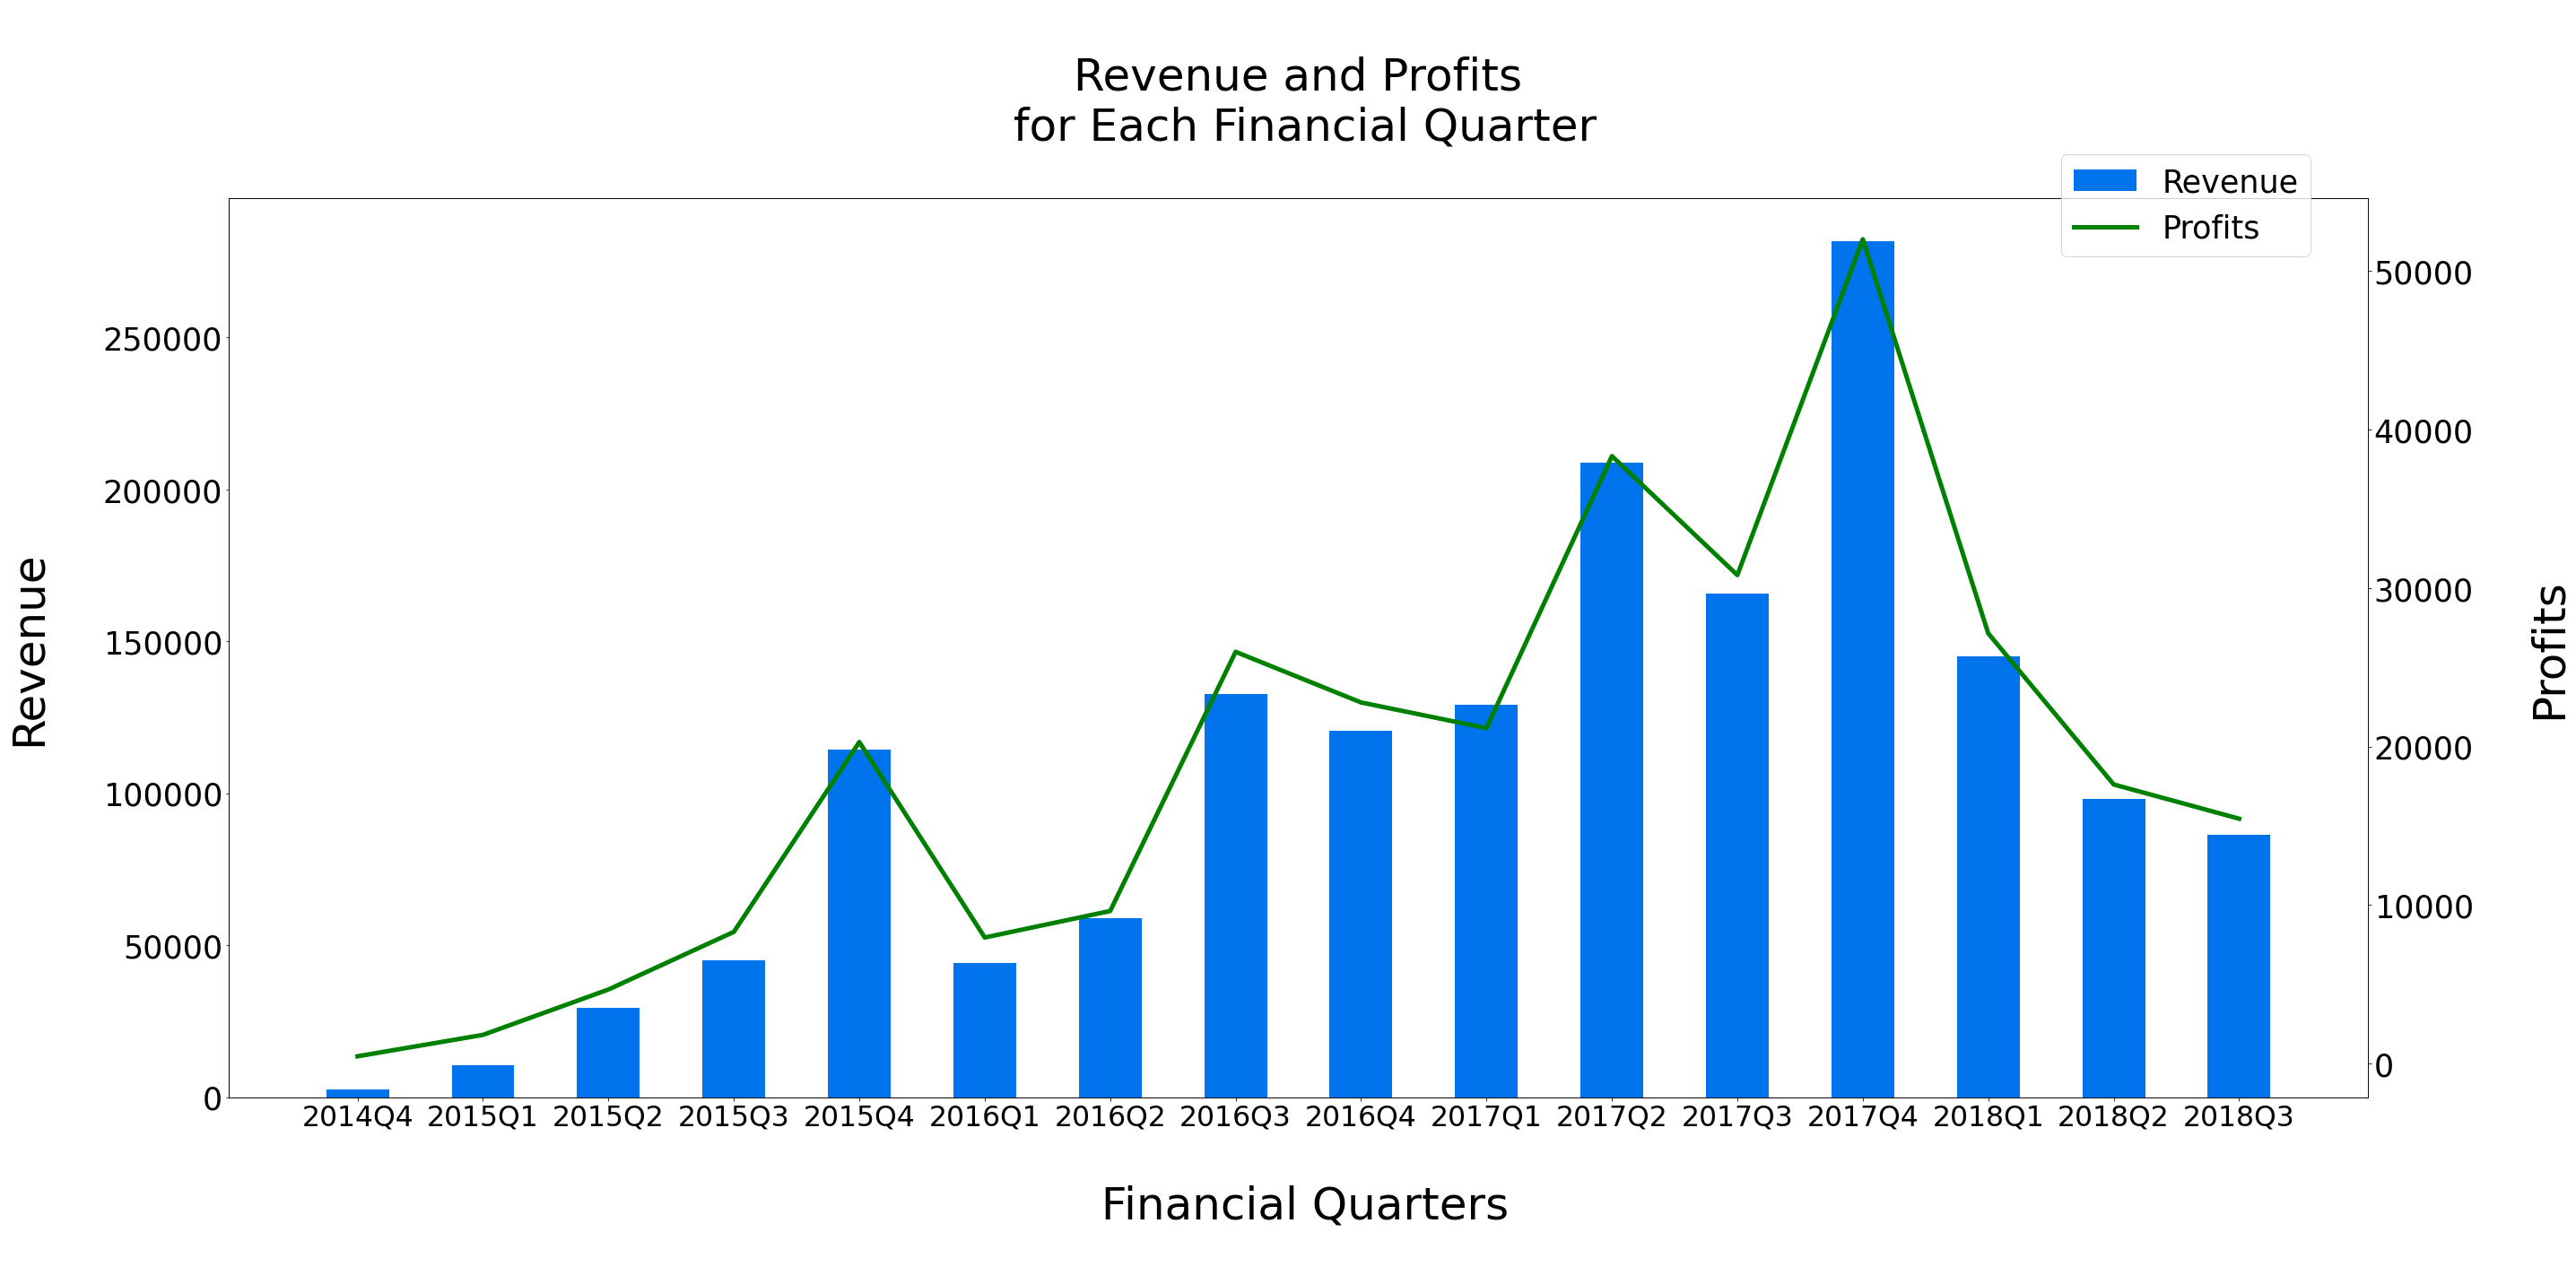

In [7]:
totalrev = df_2014.groupby('YQ')['Order Revenue'].sum()
totalprof = df_2014.groupby('YQ')['Order Profit'].sum()
orderdt = totalrev.index.astype(str)

# Create a figure and subplot for revenue chart
fig, ax_r = plt.subplots(1,1,figsize=(40, 20))

# Plot revenue chart
ax_r.bar(orderdt, totalrev, color = '#0073ed', width=0.5, label='Revenue')
ax_r.set_title('\nRevenue and Profits\n for Each Financial Quarter\n', fontsize = 50)
ax_r.set_ylabel('Revenue\n', fontsize = 50) # first y-axis (on the left)
ax_r.set_xlabel('\n Financial Quarters\n', fontsize = 50)

plt.tick_params(axis='x', labelsize = 31.5)
plt.tick_params(axis='y', labelsize = 35)

# Instantiate a second axes that shares the same x-axis
ax_p = ax_r.twinx()

# Plot profits chart
ax_p.plot(orderdt, totalprof, 'green', linewidth = 5, label = 'Profits')
ax_p.set_ylabel('\nProfits', fontsize = 50) # second y-axis (on the right)

plt.tick_params(axis='y', labelsize = 35)

# Set location of legend for both axes
fig.legend(fontsize = 35, loc=(0.80, 0.80))

# Set tight layout for figure
fig.tight_layout()

# Display plot
plt.show()

This graph is meant to be a overall look at the revenue/profit gain for each financial quarter by the company from 2014Q4 - 2018Q3 which is the time range for the data I had.

The purpose of the graph is for people to be able to see which quarters had an increase/decrease in the profit/revenue gained. This is so that there is a possibility to predict which of the upcoming financial quarters will bring in more/lesser revenue/profits.

As shown above, from 2014Q4 to 2018Q3, the fourth quarter for each year usually has one of the highest profit and revenue gain, while the first two quarters of the year has one of the lowest profit and revenue gain.

2018 is an exception to this claim as the first and second quarters of the 3 quarters' data provided had the highest profit and revenue gain and second highest profit and revenue gain respectively.

The most amount of revenue and profit gained was in 2017Q4 with \\$281,659.77 in revenue and \\$52,016.02 in profit

Last quarter, 2018Q3, was the 7th lowest quarter in terms of revenue and profit earned, with revenue being \\$86,365.68 and profit being \\$15,444.83

[back to top](#1)

## 3. Product Focus <a id='3'></a>                                                                

## 3.1 Trends <a id='3.1'></a>

### 3.1.1 Revenue Trend <a id='3.1.1'></a>

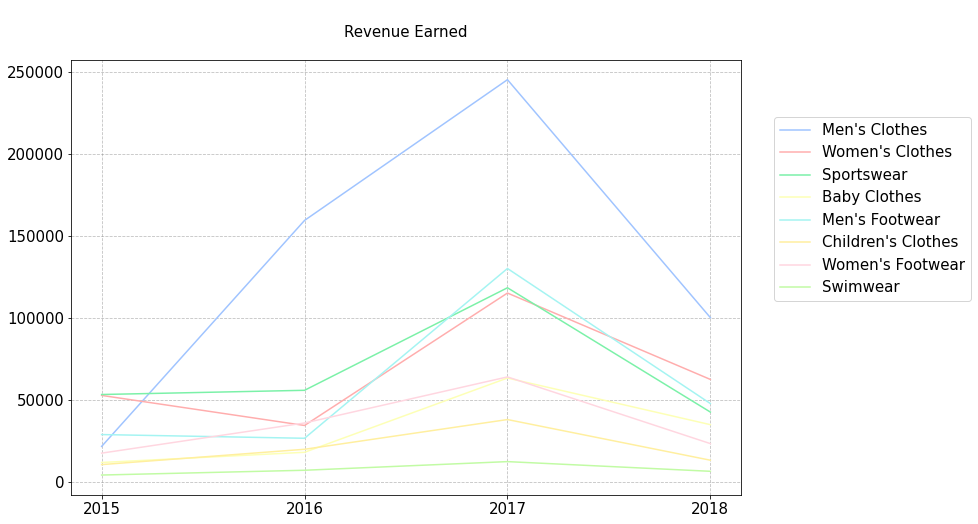

In [8]:

#prepare data
#add order year to list and sort it
year = df['Order Year'].unique().tolist()
year.sort()

#seperate the categories
cat1 = df[df["Product CategoryName"] == 'Men\'s Clothes']
cat2 = df[df["Product CategoryName"] == 'Women\'s Clothes']
cat3 = df[df["Product CategoryName"] == 'Sportswear']
cat4 = df[df["Product CategoryName"] == 'Baby Clothes']
cat5 = df[df["Product CategoryName"] == 'Men\'s Footwear']
cat6 = df[df["Product CategoryName"] == 'Children\'s Clothes']
cat7 = df[df["Product CategoryName"] == 'Women\'s Footwear']
cat8 = df[df["Product CategoryName"] == 'Swimwear']

#group them by order year and revenue
pc_r1 = cat1.groupby('Order Year')['Order Revenue'].sum()
pc_r2 = cat2.groupby('Order Year')['Order Revenue'].sum()
pc_r3 = cat3.groupby('Order Year')['Order Revenue'].sum()
pc_r4 = cat4.groupby('Order Year')['Order Revenue'].sum()
pc_r5 = cat5.groupby('Order Year')['Order Revenue'].sum()
pc_r6 = cat6.groupby('Order Year')['Order Revenue'].sum()
pc_r7 = cat7.groupby('Order Year')['Order Revenue'].sum()
pc_r8 = cat8.groupby('Order Year')['Order Revenue'].sum()
#----------------------------------------------------------------
#set figure size
plt.figure(figsize=(12,8))

#plot the lines
plt.plot(year, pc_r1, '#a0c4ff', label = 'Men\'s Clothes')
plt.plot(year, pc_r2, '#ffadad', label = 'Women\'s Clothes')
plt.plot(year, pc_r3, '#7bf1a8', label = 'Sportswear')
plt.plot(year, pc_r4, '#fdffb6', label = 'Baby Clothes')
plt.plot(year, pc_r5, '#a4f4f2', label = 'Men\'s Footwear')
plt.plot(year, pc_r6, '#ffef9f', label = 'Children\'s Clothes')
plt.plot(year, pc_r7, '#ffd6e0', label = 'Women\'s Footwear')
plt.plot(year, pc_r8, '#c1fba4', label = 'Swimwear')

#set the plot title
plt.title('\nRevenue Earned\n', fontsize = 15)

#set the marker size 
plt.tick_params(axis='x', labelsize = 15)
plt.tick_params(axis='y', labelsize = 15)

#set gridlines
plt.grid(c = 'grey', alpha = .5, linestyle = '--')

#set legend
plt.legend(fontsize = 15, loc=(1.05,0.445))

plt.show()

The graph above shows the revenue earned by the company for each product category from 2015 - 2018, excluding the last quarter of 2018.

It is partially used to answer the questions

1. Is this increase in sales quantity/profit/revenue a temporarily high one or a more permanent one?
2. What may be done in 2019 to increase profit/revenue? 

Using this graph, it is easier to see the trend for the revenue gained for each item category. While the graph can be used by itself, it is more effective when used with the graphs in the entirety of [section 3.2](#3.2) as it is meant to be a comparison graph. This is the same for the graphs below at [3.1.2](#3.1.2).

Revenue gained has peaked in 2017 for all categories, with the Men's Clothes being the highest for that year at \\$245,047.29

In 2018, with the exclusion of the fourth quarter, Q4, the top 3 categories for revenue gained are:

Rank| Category| Revenue
:---|:---|:---
1 | Men's Clothes| \\$100,007.75
2 |Women's Clothes| \\$62,325.53
3 |Men's footwear| \\$47,622.40

The category which has gained the least revenue for all the years (2015 - 2018, not including Q4) is Swimwear with its revenue being \\$6321.27 in 2018, not including Q4.

The Men's Clothes category increased its revenue gain sharply in 2016,

from 4th in rank in 2015 with a revenue of \\$21,492.33

to 1st in 2016 with a revenue of \\$159,258.80

and has continued to be the top contributing category for revenue gained since that year.

[back to top](#1)

### 3.1.2 Trend of Quantity Sold vs Profit Earned per Item Category <a id='3.1.2'></a>

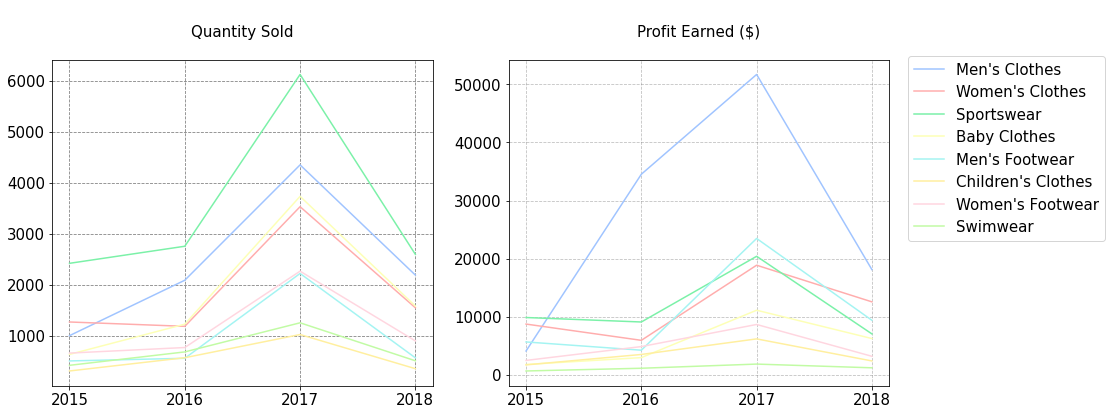

In [9]:
#prepare data
#group them by order year and quantity
pc_q1 = cat1.groupby('Order Year')['Quantity'].sum()
pc_q2 = cat2.groupby('Order Year')['Quantity'].sum()
pc_q3 = cat3.groupby('Order Year')['Quantity'].sum()
pc_q4 = cat4.groupby('Order Year')['Quantity'].sum()
pc_q5 = cat5.groupby('Order Year')['Quantity'].sum()
pc_q6 = cat6.groupby('Order Year')['Quantity'].sum()
pc_q7 = cat7.groupby('Order Year')['Quantity'].sum()
pc_q8 = cat8.groupby('Order Year')['Quantity'].sum()

#group them by order year and profit
pc_p1 = cat1.groupby('Order Year')['Order Profit'].sum()
pc_p2 = cat2.groupby('Order Year')['Order Profit'].sum()
pc_p3 = cat3.groupby('Order Year')['Order Profit'].sum()
pc_p4 = cat4.groupby('Order Year')['Order Profit'].sum()
pc_p5 = cat5.groupby('Order Year')['Order Profit'].sum()
pc_p6 = cat6.groupby('Order Year')['Order Profit'].sum()
pc_p7 = cat7.groupby('Order Year')['Order Profit'].sum()
pc_p8 = cat8.groupby('Order Year')['Order Profit'].sum()
#--------------------------------------------------------------------------

#set size for both plots
fig, ax = plt.subplots(2, 2, figsize=(15,6))

#left subplot --> Quantity
plt.subplot(1, 2, 1)

#plot the lines
plt.plot(year, pc_q1, '#a0c4ff', label = 'Men\'s Clothes')
plt.plot(year, pc_q2, '#ffadad', label = 'Women\'s Clothes')
plt.plot(year, pc_q3, '#7bf1a8', label = 'Sportswear')
plt.plot(year, pc_q4, '#fdffb6', label = 'Baby Clothes')
plt.plot(year, pc_q5, '#a4f4f2', label = 'Men\'s Footwear')
plt.plot(year, pc_q6, '#ffef9f', label = 'Children\'s Clothes')
plt.plot(year, pc_q7, '#ffd6e0', label = 'Women\'s Footwear')
plt.plot(year, pc_q8, '#c1fba4', label = 'Swimwear')

#set the plot title
plt.title('\nQuantity Sold\n', fontsize = 15)

#set the marker size 
plt.tick_params(axis='x', labelsize = 15)
plt.tick_params(axis='y', labelsize = 15)

#set gridlines
plt.grid(c = 'k', alpha = .5, linestyle = '--')
#-----------------------------------------------------------------------

#right subplot --> profit
plt.subplot(1, 2, 2)

#plot the lines
plt.plot(year, pc_p1, '#a0c4ff', label = 'Men\'s Clothes')
plt.plot(year, pc_p2, '#ffadad', label = 'Women\'s Clothes')
plt.plot(year, pc_p3, '#7bf1a8', label = 'Sportswear')
plt.plot(year, pc_p4, '#fdffb6', label = 'Baby Clothes')
plt.plot(year, pc_p5, '#a4f4f2', label = 'Men\'s Footwear')
plt.plot(year, pc_p6, '#ffef9f', label = 'Children\'s Clothes')
plt.plot(year, pc_p7, '#ffd6e0', label = 'Women\'s Footwear')
plt.plot(year, pc_p8, '#c1fba4', label = 'Swimwear')

#set the plot title
plt.title('\nProfit Earned ($)\n', fontsize = 15)

#set the marker size
plt.tick_params(axis='x', labelsize = 15)
plt.tick_params(axis='y', labelsize = 15)

#set gridlines
plt.grid(c = 'grey', alpha = .5, linestyle = '--')

#set legend
plt.legend(fontsize = 15, loc=(1.05,0.445))
#-----------------------------------------------------------------------------

plt.show()

There are two graphs shown above,
The one on the left shows the quantity sold for each category per year.
The right shows the profit earned by each category per year.
The range of time is from 2015 - 2018, excluding Q4 of 2018.

They are also both partially used to answer the questions

1. Is this increase in sales quantity/profit/revenue a temporarily high one or a more permanent one?
2. What may be done in 2019 to increase profit/revenue?

similar to the graph at [3.1.1](#3.1.1)

As shown, for both graphs, both sales profit and quantity sold have peaked in 2017.

The category which has the highest quantity on items sold is Sportswear for all years, with the most sales being in 2017 where there were 6,125 units sold. 

In 2018, with the exclusion of Q4, the top 3 categories with the highest number of items sold are:

Rank | Category | Units Sold
:---|:---|:---
1| Sportswear| 2,596 units
2| Men's Clothes| 2,189 units
3| Baby Clothes| 1,582 units

Since sportwear consistently has the highest quantity of items sold, it may be expected to be on eof the categories to bring in the most amount of profit. However, from 2016 to 2018, with the exclusion of Q4, Men's Clothes has consistently had the highest amount of profit of all the categories.

Futhermore, the top 3 categories with the highest amount of profit earned, from 2015 to 2018, excluding Q4, are:

Rank | Category | Profit
:---|:---|:---
1| Men's Clothes|\\$18,119.32
2| Women's Clothes|\\$12,567.74
3| Men's Footwear |\\$9,392.70

Men's Footwear, ranked 6th for quantity sold and 3rd for profit earned, had earned more profit than Sportswear, which was ranked 1st for quantity sold and 4th for profit earned.

Category | Men's Footwear | Sportswear
:---|:---|:---
Quantity Sold | 566 | 2596
Revenue| \\$47,622.40 |\\$42,428.51
Profit| \\$9,392.70| \\$7,050.99


[back to top](#1)

## 3.2 Comparisons <a id='3.2'></a>

### 3.2.1 Profit Generated per Item Category in 2018Q3 <a id='3.2.1'></a>

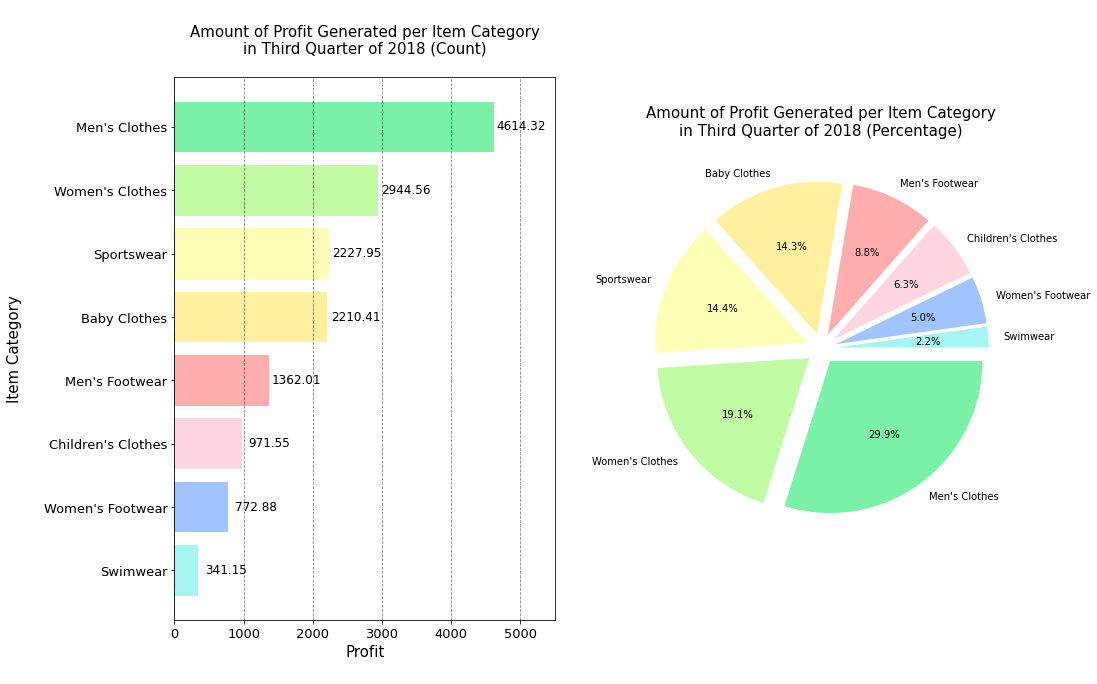

In [10]:
#filter out sales to only include those from 2018Q3
q3_2018 = df[ df["YQ"] == '2018Q3']

#group data by course type
prof2018 = q3_2018.groupby('Product CategoryName')['Order Profit'].sum()

#sort grouped values in descending order,(ascending true)
#inplace true makes the values in order,
#inplace false makes the names (the axis) in order
prof2018.sort_values(ascending = True, inplace = True)

prof2018index = prof2018.index

colors = ['#a4f4f2','#a0c4ff','#ffd6e0','#ffadad','#ffef9f','#fdffb6','#c1fba4','#7bf1a8']

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

plt.subplot(1, 2, 1)
#align = 'center' makesd the name of bar aligned to centert of bar
plt.barh(prof2018index, prof2018, color = colors, align = 'center')

#showing tile/x-axis/y-axis of graph
plt.title('\nAmount of Profit Generated per Item Category\nin Third Quarter of 2018 (Count)\n', fontsize = 15)
plt.xlabel('Profit\n', fontsize = 15)
plt.ylabel('Item Category\n', fontsize = 15)

#set axis limits
plt.xlim(left = 0, right = 5500)

#set range for x and y axis
plt.tick_params(axis='x', labelsize = 13)
plt.tick_params(axis='y', labelsize = 13)

#display data labels
for x,y in zip(prof2018index, prof2018):
    
    label = float(y)
    
    plt.annotate('{:.2f}'.format(label), (y,x), fontsize = 12, textcoords = 'offset points', xytext = (28,-3), ha = 'center')

#set gridlines
plt.grid(axis = 'x', c = 'k', alpha = .5, linestyle = '--')

plt.subplot(1, 2, 2)

plt.title('\nAmount of Profit Generated per Item Category\nin Third Quarter of 2018 (Percentage)\n', fontsize = 15)

plt.pie(prof2018, explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1), labels = prof2018index, colors = colors, autopct='%1.1f%%')
    
#show plot
plt.show()


This graph is meant to answer the question

Which product/category has generated the most profit during the last quarter? 

For 2018Q3, which is the third quarter of 2018, Men's Clothes has generated the most profit. It's profit is \\$4614.32.

This is followed by Women's Clothes in 2nd, with a profit of \\$2994.56

and 3rd being Sportswear with a profit of \\$2227.95

Men's Clothes has contributed 29.9% of the profity earned in 2018Q3


[back to top](#1)

### 3.2.2 Quantity Sold per Item Category in 2018Q3 <a id='3.2.2'></a>

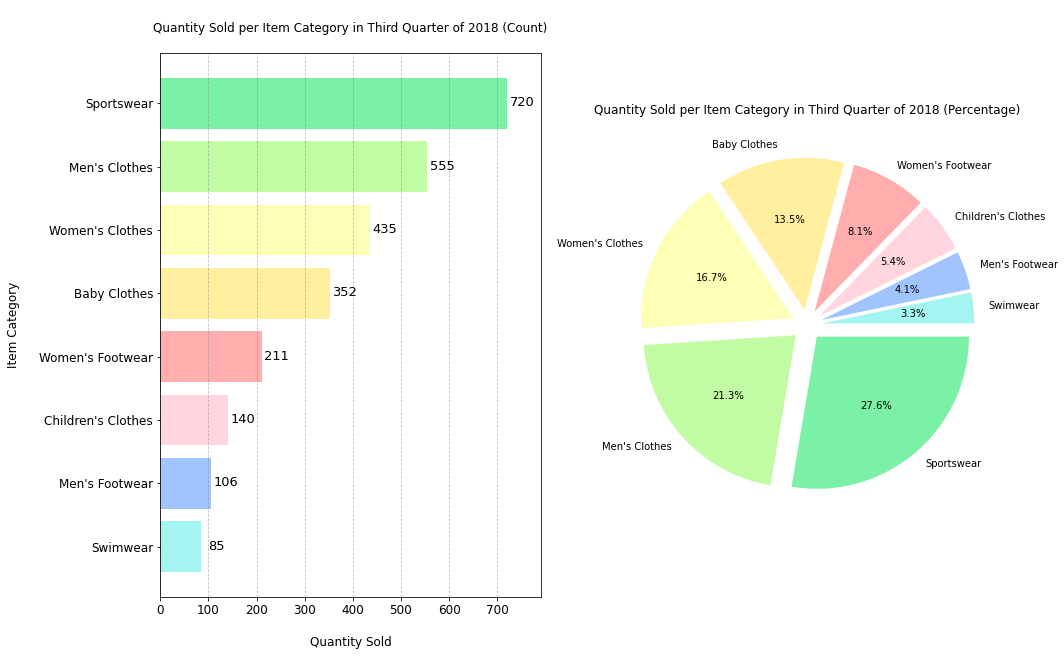

In [11]:
#group data by course type
quant2018 = q3_2018.groupby('Product CategoryName')['Quantity'].sum()

#sort grouped values in descending order,(ascending true)
#inplace true makes the values in order,
#inplace false makes the names (the axis) in order
quant2018.sort_values(ascending = True, inplace = True)

quant2018_index = quant2018.index

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

plt.subplot(1, 2, 1)

#align = 'center' makesd the name of bar aligned to centert of bar
plt.barh(quant2018_index, quant2018, color = colors, align = 'center')

#showing tile/x-axis/y-axis of graph
plt.title('\nQuantity Sold per Item Category in Third Quarter of 2018 (Count)\n', fontsize = 12)
plt.xlabel('\nQuantity Sold', fontsize = 12)
plt.ylabel('Item Category\n', fontsize = 12)

#set range for x and y axis
plt.tick_params(axis='x', labelsize = 12)
plt.tick_params(axis='y', labelsize = 12)
plt.xlim(left = 0, right = 790)


#display data labels
for x,y in zip(quant2018_index, quant2018):
    
    label = int(y)
    
    plt.annotate(label, (y,x), fontsize = 13, textcoords = 'offset points', xytext = (15,-3), ha = 'center')
    
#set gridlines
plt.grid(axis = 'x', c = 'grey', alpha = .5, linestyle = '--')

plt.subplot(1, 2, 2)

plt.title('\nQuantity Sold per Item Category in Third Quarter of 2018 (Percentage)\n', fontsize = 12)

plt.pie(quant2018, explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1), labels=quant2018_index, colors = colors, autopct='%1.1f%%')
    
#show plot
plt.show()

This graph is meant to answer the question

Which product/category has generated the most number of sales during the last quarter? 

In terms of units sold, Sportswear has sold the most units with 720 units sold. 

2nd is Men's Clothes with 555 units sold

And 3rd is Women's Clothes with 352 units sold.

Sportswear has contributed 27.6% of the units sold for 2018Q3

[back to top](#1)

### 3.2.3 Profit Generated per Item Category for All Time <a id='3.2.3'></a>

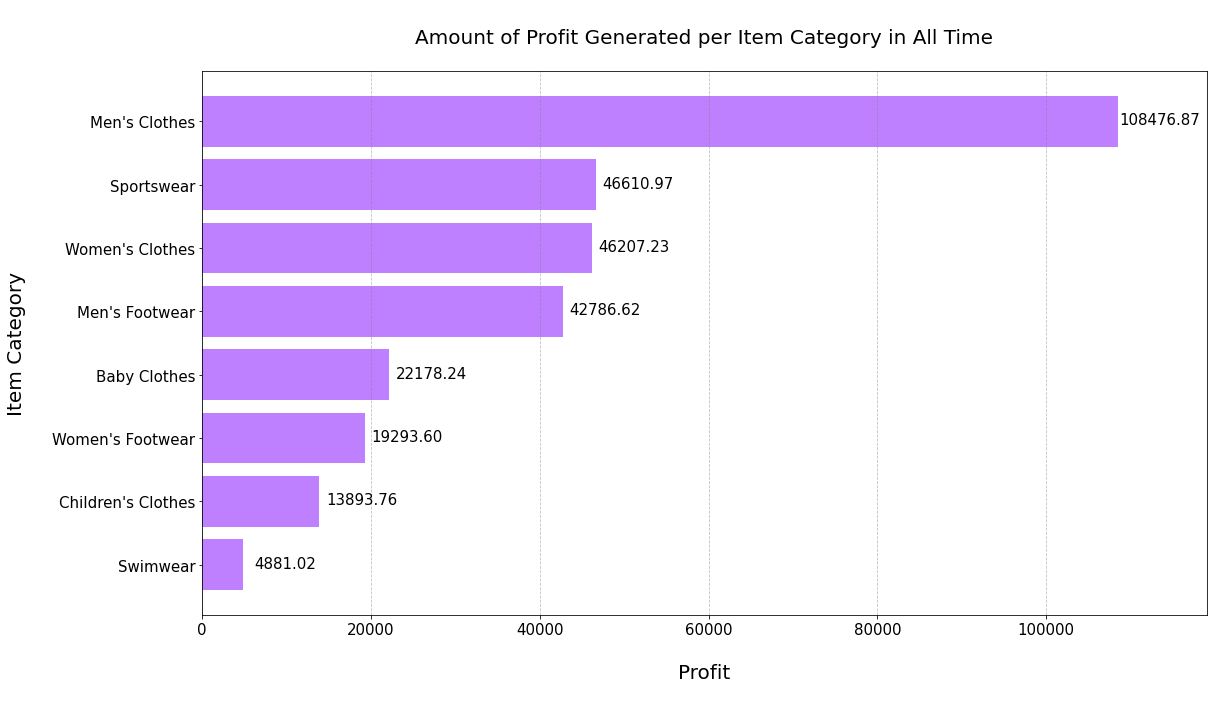

In [12]:
#Revenue generated by itemcat for all time
#change figure size
plt.figure(figsize=(18, 10))

#group data by course type
profall = df_2014.groupby('Product CategoryName')['Order Profit'].sum()

#sort grouped values in descending order,(ascending true)
#inplace true makes the values in order,
#inplace false makes the names (the axis) in order
profall.sort_values(ascending = True, inplace = True)

profallindex = profall.index

#align = 'center' makesd the name of bar aligned to centert of bar
plt.barh(profallindex, profall, color = '#bf80ff', align = 'center')

#showing tile/x-axis/y-axis of graph
plt.title('\nAmount of Profit Generated per Item Category in All Time\n', fontsize = 20)
plt.xlabel('\nProfit\n', fontsize = 20)
plt.ylabel('Item Category\n', fontsize = 20)
plt.xlim(left = 0, right = 119000)

#set range for x and y axis
plt.tick_params(axis='x', labelsize = 15)
plt.tick_params(axis='y', labelsize = 15)

#display data labels
for x,y in zip(profallindex, profall):
    
    label = float(y)
    
    plt.annotate('{:.2f}'.format(label), (y,x), fontsize = 15, textcoords = 'offset points', xytext = (42,-3), ha = 'center')

    #set gridlines
plt.grid(axis = 'x', c = 'grey', alpha = .5, linestyle = '--')

#show plot
plt.show()

This graph is meant to help answer the question

Is this increase in sales quantity/profit/revenue a temporarily high one or a more permanent one?

In terms of Profit generated per item category from 2014Q4 - 2018Q3, which is the 4th quarter of 2014 to the 3rd quarter of 2018,

Men's clothes has earned the most profit at \\$108,476.87

followed by Sportswear at \\$46,610,97

and Women's Clothes at \\$46,207.23

The total profit earned by Men's Clothes, which is in 1st place, is more than twice the total profit earned by the category in second place, Sportswear.

Similarly, a total profit of \\$13,893.76 earned by Children's Clothes, which is in 2nd last place, is more than twice the total profit of \\$4881.02 earned by the category in last place, Swimwear.

[back to top](#1)

### 3.2.4 Quantity Sold per Item Category for All Time <a id='3.2.4'></a>

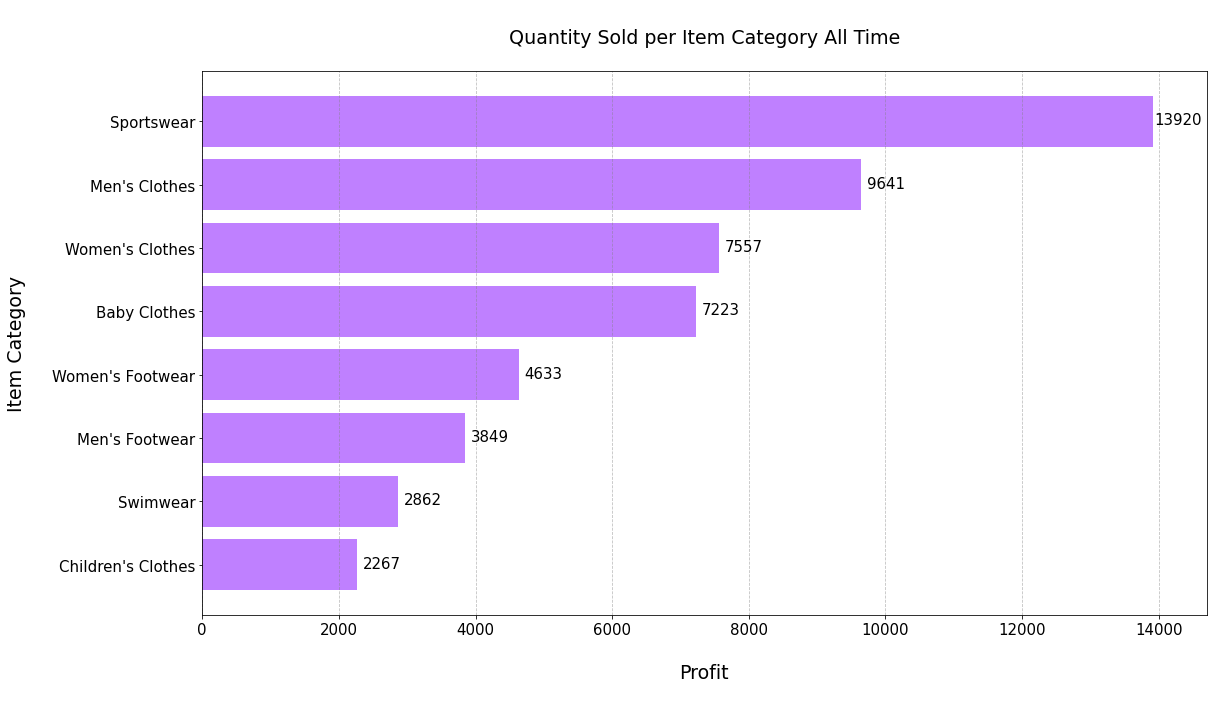

In [13]:
#change figure size
plt.figure(figsize=(18, 10))

#group data by course type
quantall = df_2014.groupby('Product CategoryName')['Quantity'].sum()

#sort grouped values in descending order,(ascending true)
#inplace true makes the values in order,
#inplace false makes the names (the axis) in order
quantall.sort_values(ascending = True, inplace = True)

quantall_index = quantall.index

#align = 'center' makesd the name of bar aligned to centert of bar
plt.barh(quantall_index, quantall, color = '#bf80ff', align = 'center')

#showing tile/x-axis/y-axis of graph
plt.title('\nQuantity Sold per Item Category All Time\n', fontsize = 19)
plt.xlabel('\nProfit\n', fontsize = 19)
plt.ylabel('Item Category\n', fontsize = 19)
plt.xlim(left = 0, right = 14700)

#set axis font size
plt.tick_params(axis='x', labelsize = 15)
plt.tick_params(axis='y', labelsize = 15)

#display data labels
for x,y in zip(quantall_index, quantall):
    
    label = y
    
    plt.annotate(label, (y,x), fontsize = 15, textcoords = 'offset points', xytext = (25,-3), ha = 'center')

#set gridlines
plt.grid(axis = 'x', c = 'grey', alpha = .5, linestyle = '--')
    
#show plot
plt.show()

This graph is meant to help answer the question

Is this increase in sales quantity/profit/revenue a temporarily high one or a more permanent one?

For the quantity sold per item category from 2014Q4 - 2018Q3,

Sportswear has sold the highest quantity at 13,920 units sold,

followed by Men's Clothes at 9,641 units sold

and Women's Clothes at 7,557 units sold.

[back to top](#1)

### 3.2.5 Profit Generated per Item in 2018Q3 <a id='3.2.5'></a>

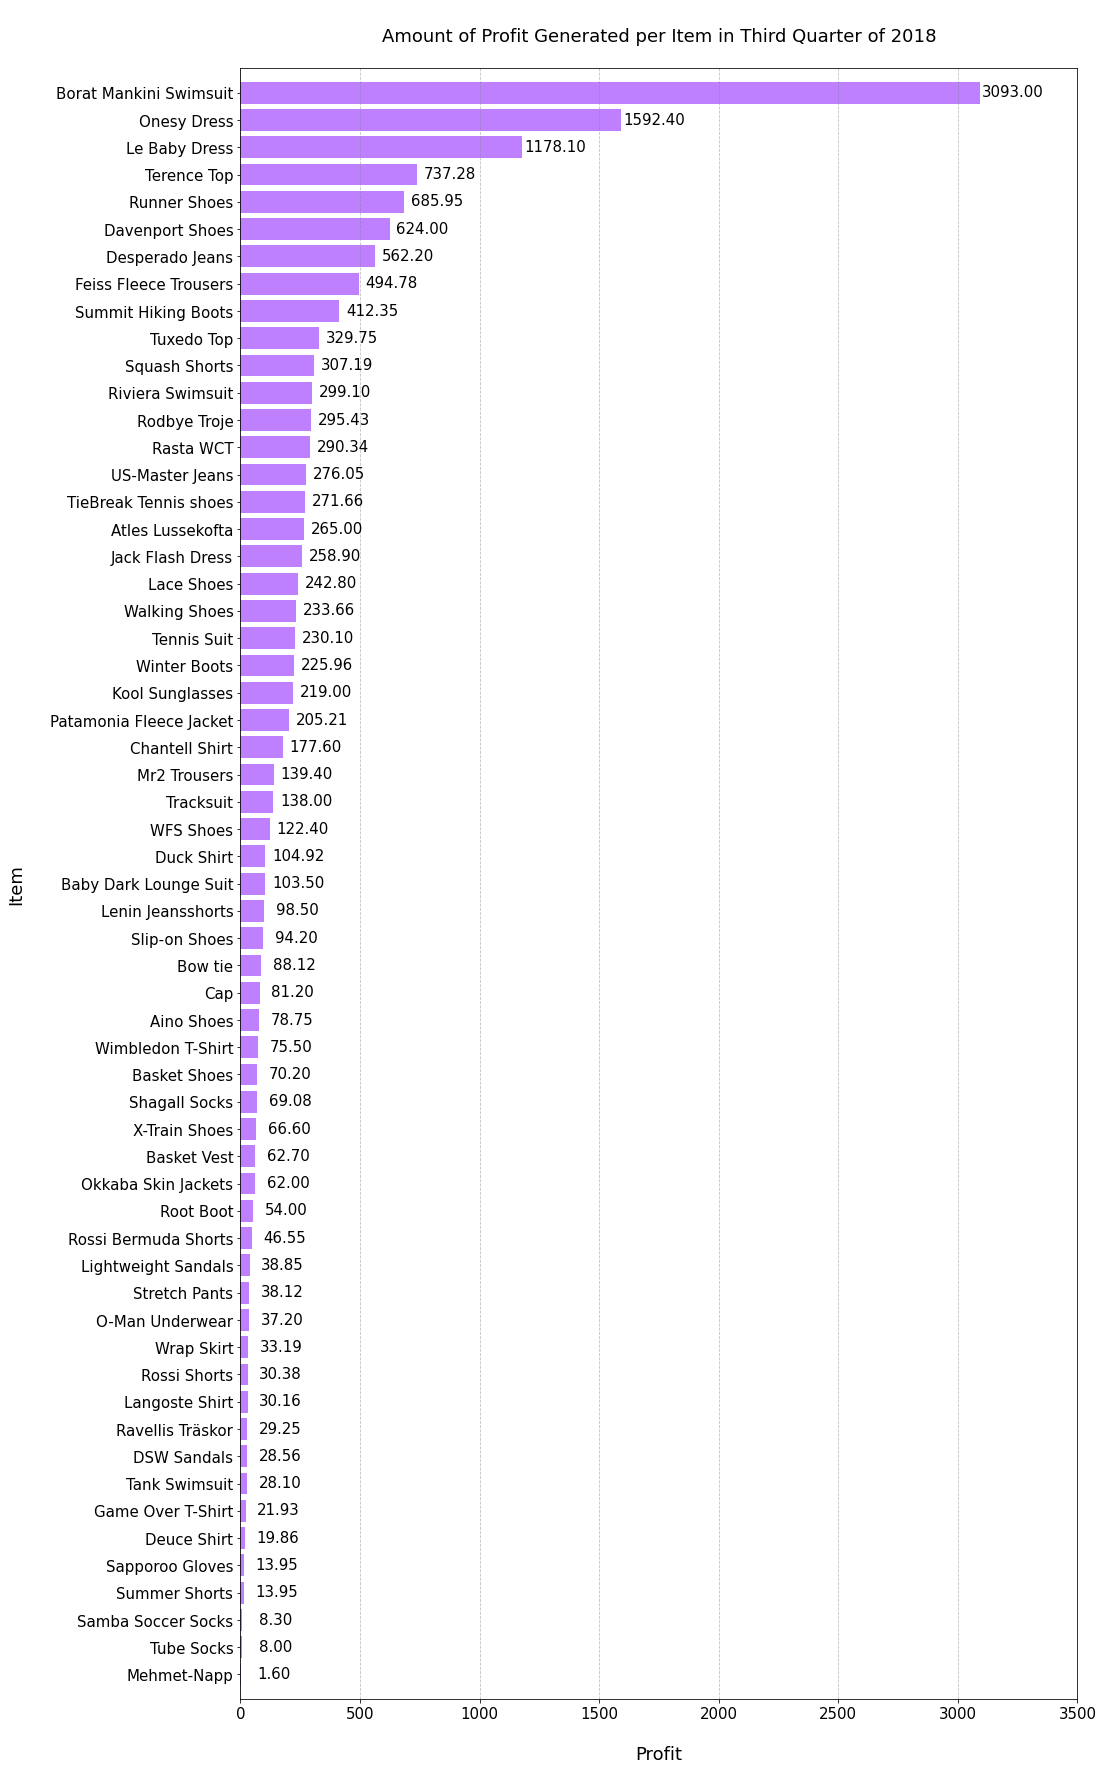

In [14]:
plt.figure(figsize=(15, 30))

#group data by course type
itemprof2018 = q3_2018.groupby('ProductName')['Order Profit'].sum()

#sort grouped values in descending order,(ascending true)
#inplace true makes the values in order,
#inplace false makes the names (the axis) in order
itemprof2018.sort_values(ascending = True, inplace = True)

itemprof2018_index = itemprof2018.index

#align = 'center' makesd the name of bar aligned to centert of bar
plt.barh(itemprof2018_index, itemprof2018, color = '#bf80ff', align = 'center')

#showing tile/x-axis/y-axis of graph
plt.title('\nAmount of Profit Generated per Item in Third Quarter of 2018\n', fontsize = 18)
plt.xlabel('\nProfit', fontsize = 18)
plt.ylabel('Item\n', fontsize = 18)

plt.xlim(left = 0, right = 3500)
plt.ylim(bottom = -0.9, top = 58.9)

#set axis font size
plt.tick_params(axis='x', labelsize = 15)
plt.tick_params(axis='y', labelsize = 15)

#display data labels
for x,y in zip(itemprof2018_index, itemprof2018):
    
    label = y
    
    plt.annotate('{:.2f}'.format(label), (y,x), fontsize = 15, textcoords = 'offset points', xytext = (33,-4), ha = 'center')

#set gridlines
plt.grid(axis = 'x', c = 'grey', alpha = .5, linestyle = '--')
    
plt.show()

This graph is meant to help answer the question

Which product/category has generated the most profit during the last quarter?

The top 5 items with have contributed to the profit generated in 2018Q3 are

Rank|Item|Item Category|Profit
:---|:---|:---|:---
1 |Borat Mankini Swimsuit|Men's Clothes |\\$3,093.00
2 |Onesy Dress| Baby Clothes|\\$1,592.40
3 |Le Baby Dress|Woman's Clothes|\\$1,178.10
4 |Terence Top|Woman's Clothes|\\$737.28
5 |Runner Shoes|Children's Clothes|\\$685.95

The item ranked first for profit contribution, which is the Borat mankini Swimsuit, has contributed a profit of almost two times of that of the second ranked item, which is the Onesy Dress

[back to top](#1)

### 3.2.6 Quantity Sold per Item in 2018Q3 <a id='3.2.6'></a>

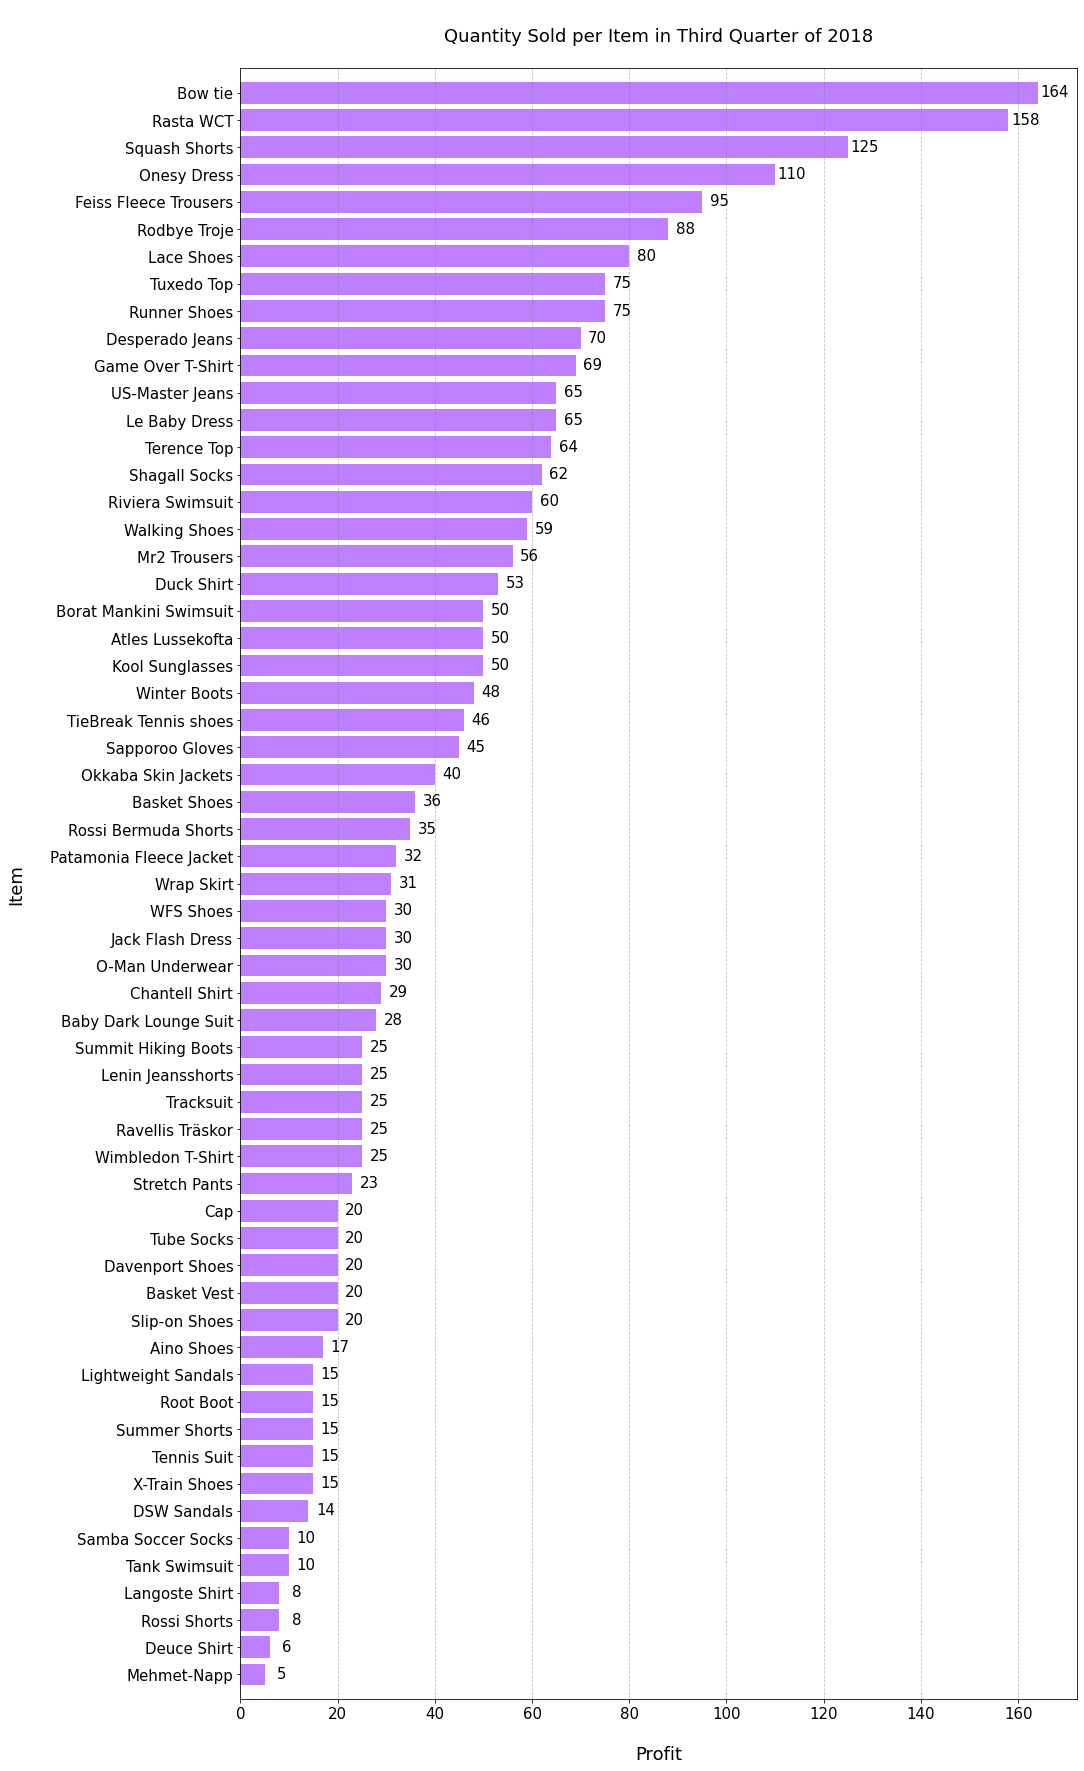

In [15]:
plt.figure(figsize=(15, 30))

#group data by course type
itemquant2018 = q3_2018.groupby('ProductName')['Quantity'].sum()

#sort grouped values in descending order,(ascending true)
#inplace true makes the values in order,
#inplace false makes the names (the axis) in order
itemquant2018.sort_values(ascending = True, inplace = True)

itemquant2018_index = itemquant2018.index

#align = 'center' makesd the name of bar aligned to centert of bar
plt.barh(itemquant2018_index, itemquant2018, color = '#bf80ff', align = 'center')

#showing tile/x-axis/y-axis of graph
plt.title('\nQuantity Sold per Item in Third Quarter of 2018\n', fontsize = 18)
plt.xlabel('\nProfit', fontsize = 18)
plt.ylabel('Item\n', fontsize = 18)

plt.ylim(bottom = -0.9, top = 58.9)

#set axis font size
plt.tick_params(axis='x', labelsize = 15)
plt.tick_params(axis='y', labelsize = 15)

#display data labels
for x,y in zip(itemquant2018_index, itemquant2018):
    
    label = y
    
    plt.annotate(label, (y,x), fontsize = 15, textcoords = 'offset points', xytext = (17,-4), ha = 'center')

#set gridlines
plt.grid(axis = 'x', c = 'grey', alpha = .5, linestyle = '--')
    
plt.show()

This graph is meant to help answer the question

Which product/category has generated the most most number of sales during the last quarter? 

The top 5 items which have sold the most units in 2018Q3 are

Rank|Item|Item Category|Units Sold
:---|:---|:---|:---
1 |Bow tie|Men's Clothes |164
2 |Rasta WCT| Sportswear|158
3 |Squash Shorts|Sportswear|125
4 |Onesy Dress| Baby Clothes|110
5 |Feiss Fleece Trousers|Sportswear|95

It is noted here that while the Borat Mankini Swimsuit had brought in the most profit for 2018Q3, it did not make it as one of the top few items with the most number of units sold. In fact, it is ranked 20th for the number of units sold in 2018Q3.

[back to top](#1)

### 3.2.7 Profit Generated per Item for All Time <a id='3.2.7'></a>

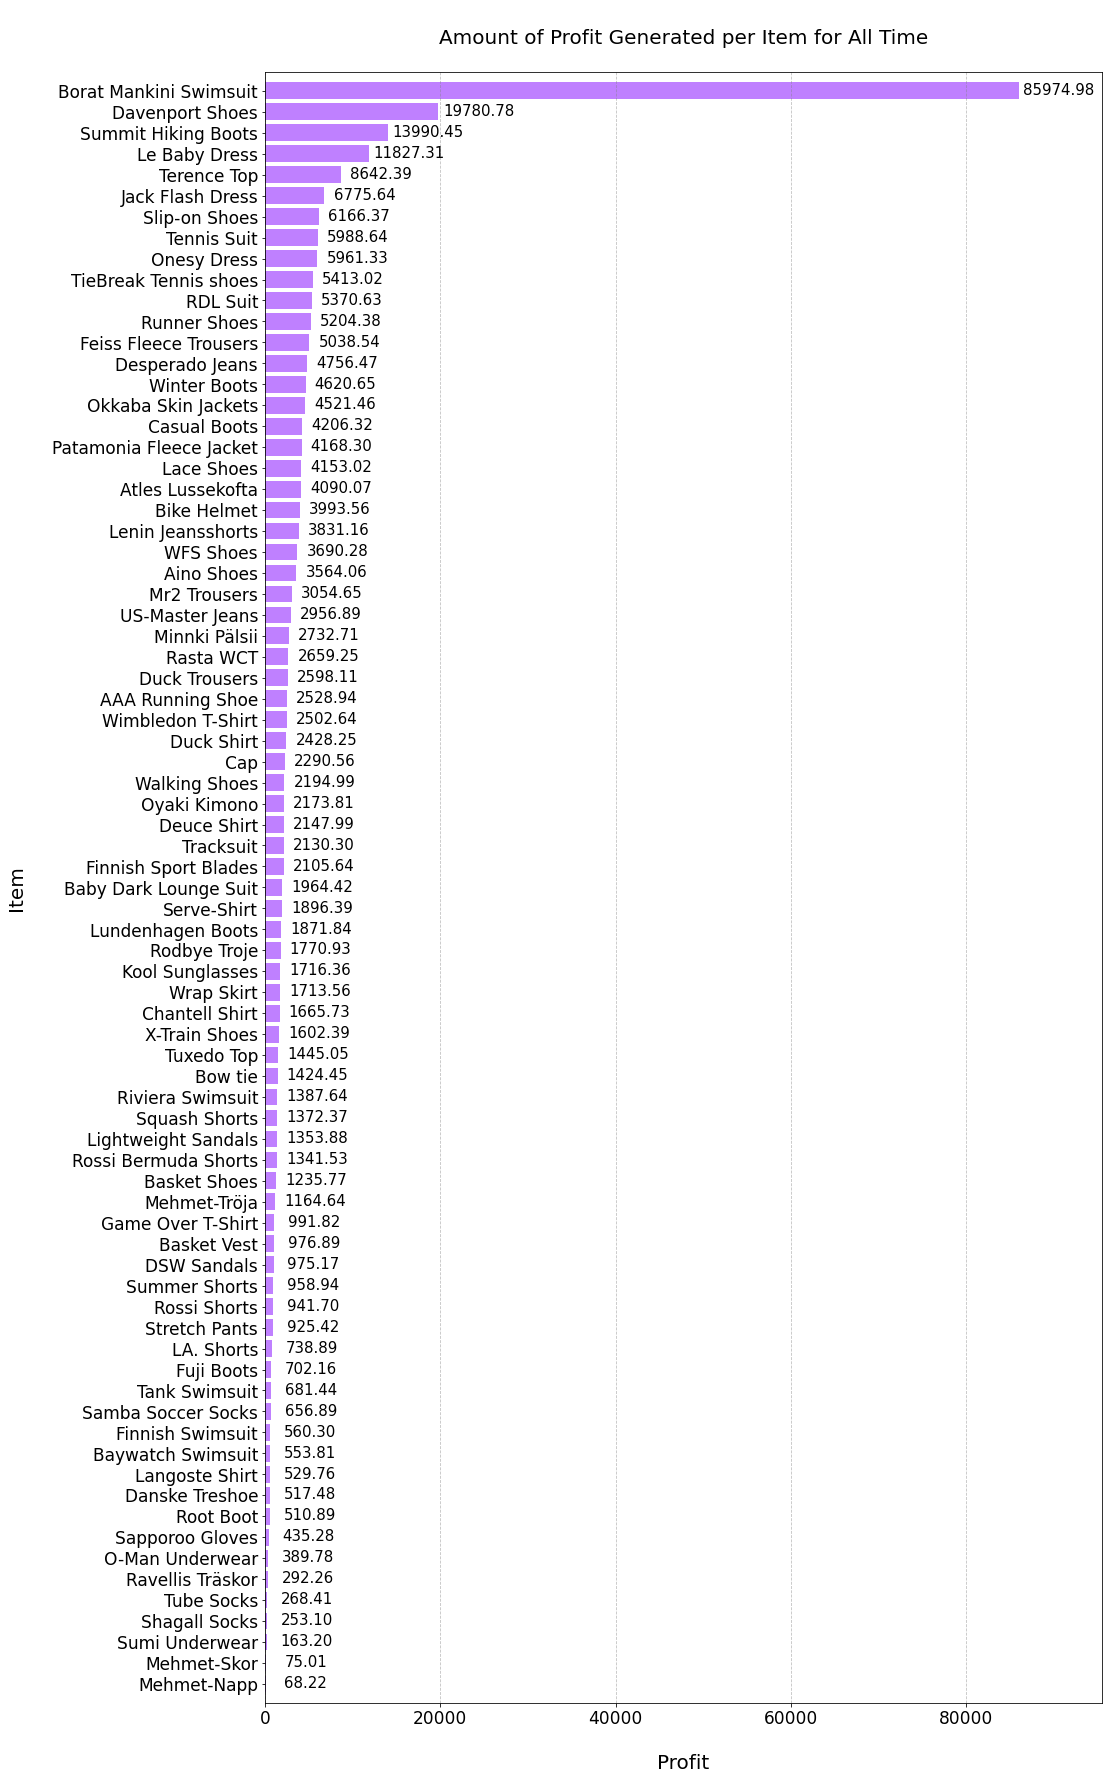

In [16]:
plt.figure(figsize=(15, 30))

#group data by course type
itemprofall = df_2014.groupby('ProductName')['Order Profit'].sum()

#sort grouped values in descending order,(ascending true)
#inplace true makes the values in order,
#inplace false makes the names (the axis) in order
itemprofall.sort_values(ascending = True, inplace = True)

itemprofall_index = itemprofall.index

#align = 'center' makesd the name of bar aligned to centert of bar
plt.barh(itemprofall_index, itemprofall, color = '#bf80ff', align = 'center')

#showing tile/x-axis/y-axis of graph
plt.title('\nAmount of Profit Generated per Item for All Time\n', fontsize = 20)
plt.xlabel('\nProfit', fontsize = 20)
plt.ylabel('Item\n', fontsize = 20)

plt.xlim(left = 0, right = 95500)
plt.ylim(bottom = -0.9, top = 76.9)

#set axis font size
plt.tick_params(axis='x', labelsize = 17)
plt.tick_params(axis='y', labelsize = 17)

#display data labels
for x,y in zip(itemprofall_index, itemprofall):
    
    label = y
    
    plt.annotate('{:.2f}'.format(label), (y,x), fontsize = 15, textcoords = 'offset points', xytext = (40,-4), ha = 'center')

#set gridlines
plt.grid(axis = 'x', c = 'grey', alpha = .5, linestyle = '--')
    
plt.show()

This graph helps answer the question

Is this increase in sales quantity/profit/revenue a temporarily high one or a more permanent one?

When widening out the scope to that of all time profit generated by each item, the items which have generated the most profit is as follows

Rank|Item|Item Category|Profit
:---|:---|:---|:---
1 |Borat Mankini Swimsuit|Men's Clothes |\\$85,974.98
2 |Davenport Shoes|Men's Footwear |\\$19,780.78
3 |Summit Hiking Boots|Men's Footwear|\\$13,990.45
4 |Le Baby Dress|Woman's Clothes|\\$11,827.31
5 |Terence Top|Woman's Clothes|\\$8,642.39

The item ranked first for profit contribution for all time, which is the Borat mankini Swimsuit, has contributed a profit of almost four times of that of the second ranked item, which is the Davenport Shoes.

[back to top](#1)

### 3.2.8 Profit Generated per Item for All Time <a id='3.2.8'></a>

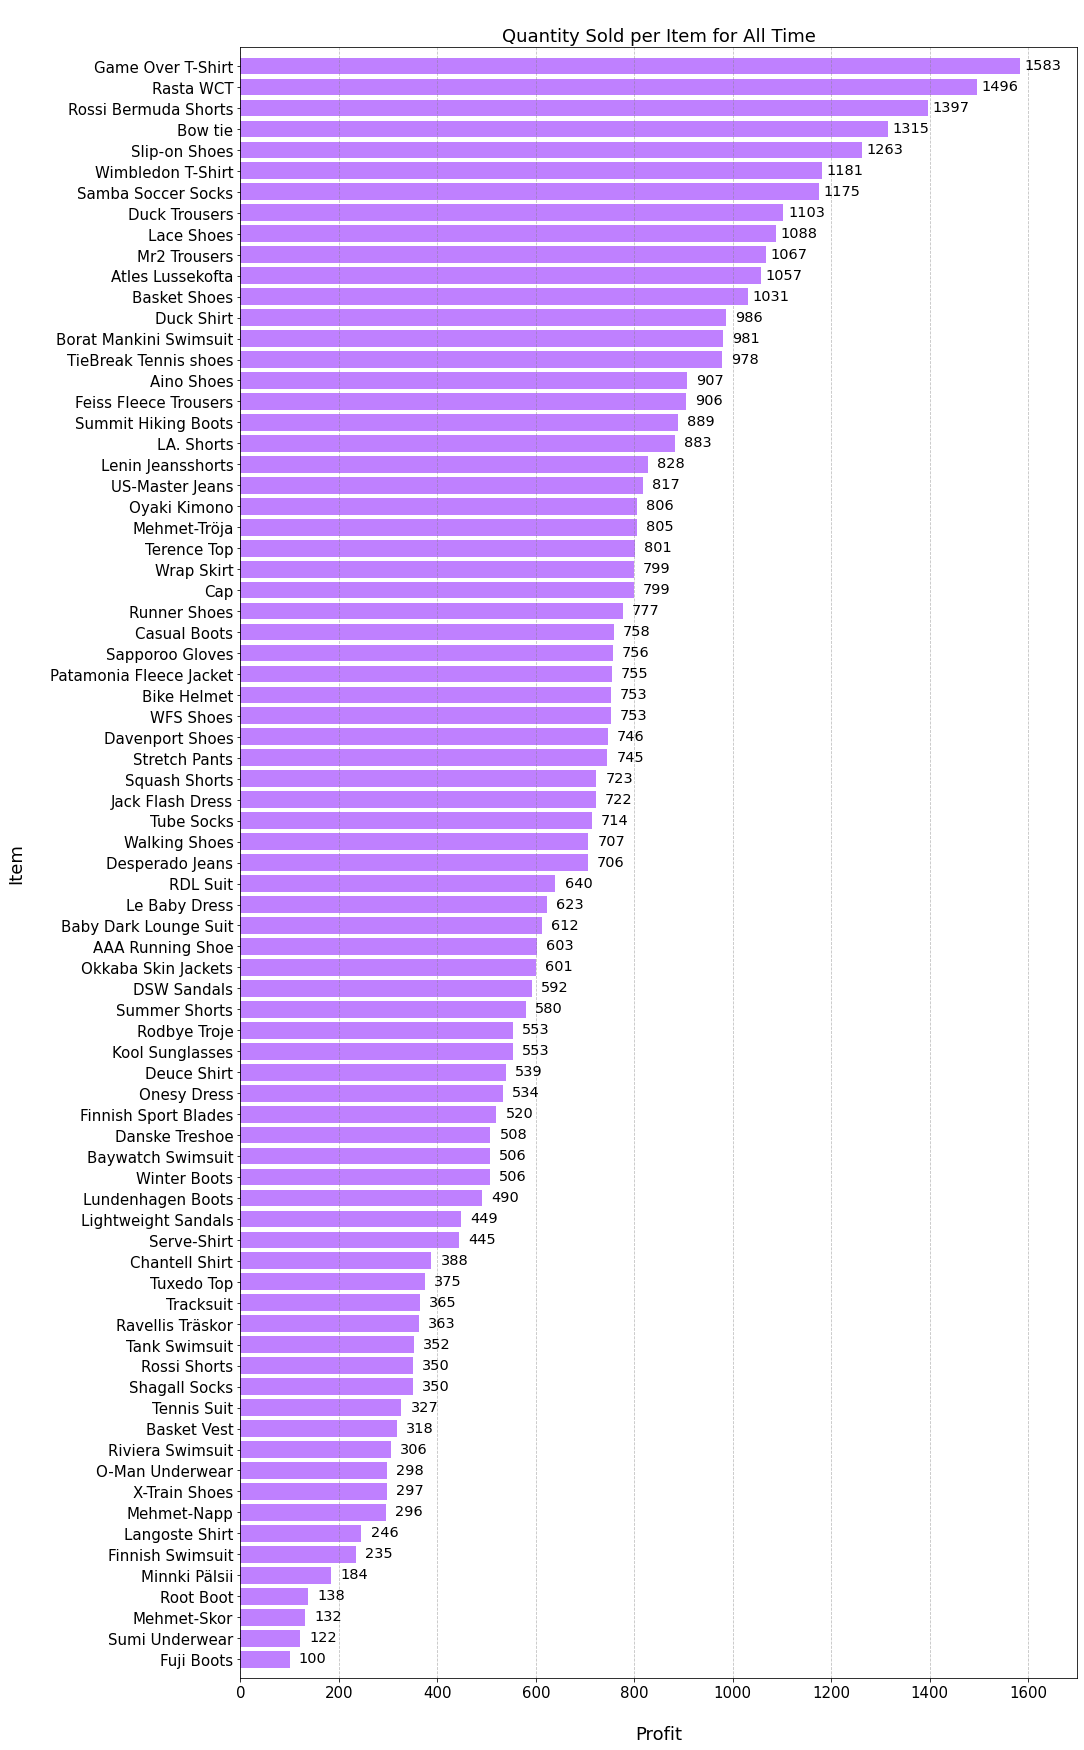

In [17]:
plt.figure(figsize=(15, 30))

#group data by course type
itemquantall = df_2014.groupby('ProductName')['Quantity'].sum()

#sort grouped values in descending order,(ascending true)
#inplace true makes the values in order,
#inplace false makes the names (the axis) in order
itemquantall.sort_values(ascending = True, inplace = True)

itemquantall_index = itemquantall.index

#align = 'center' makesd the name of bar aligned to centert of bar
plt.barh(itemquantall_index, itemquantall, color = '#bf80ff', align = 'center')

#showing tile/x-axis/y-axis of graph
plt.title('\nQuantity Sold per Item for All Time', fontsize = 18)
plt.xlabel('\nProfit', fontsize = 18)
plt.ylabel('Item\n', fontsize = 18)

plt.xlim(left = 0, right = 1700)
plt.ylim(bottom = -0.9, top = 76.9)

#set axis font size
plt.tick_params(axis='x', labelsize = 15)
plt.tick_params(axis='y', labelsize = 15)

#display data labels
for x,y in zip(itemquantall_index, itemquantall):
    
    label = y
    
    plt.annotate(label, (y,x), fontsize = 14.5, textcoords = 'offset points', xytext = (23,-3.25), ha = 'center')

#set gridlines
plt.grid(axis = 'x', c = 'grey', alpha = .5, linestyle = '--')
    
plt.show()

This graph helps answer the question

Is this increase in sales quantity/profit/revenue a temporarily high one or a more permanent one?

When widening out the scope to that of number of units sold by each item for all time, the top 5 items which have sold the most number of units is as follows 

Rank|Item|Item Category|Profit
:---|:---|:---|:---
1 |Game Over T-Shirt|Sportswear |1583
2 |Rasta WCT|Sportswear |1496
3 |Rossi Bermuda Shorts|Men's Clothes|1397
4 |Bow tie|Men's Clothes|1315
5 |Slip-on Shoes|Woman's Footwear|1263

It is noted here that the item ranked first for profit contribution for all time, which is the Borat mankini Swimsuit, was not one of the top 5 items sold for all time. In fact, the Borat Mankini Swimsuit is ranked 14th, with 981 units sold.

[back to top](#1)

# 4. Customer Focus <a id='4'></a>

## 4.1 Profit Gained per Customer in 2018Q3 <a id='4.1'></a>

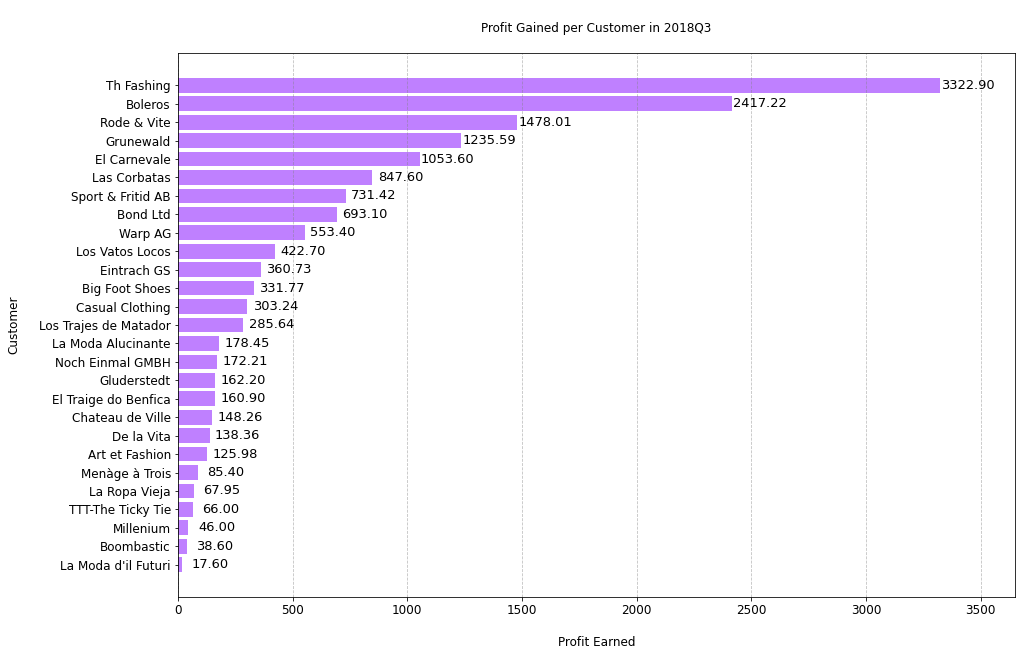

In [18]:
#group data by course type
customerprof18 = q3_2018.groupby('Customer Name')['Order Profit'].sum()

#sort grouped values in descending order,(ascending true)
#inplace true makes the values in order,
#inplace false makes the names (the axis) in order
customerprof18.sort_values(ascending = True, inplace = True)

customerprof18_index = customerprof18.index

plt.figure(figsize=(15, 10))

#align = 'center' makesd the name of bar aligned to centert of bar
plt.barh(customerprof18_index, customerprof18, color = '#bf80ff', align = 'center')

#showing tile/x-axis/y-axis of graph
plt.title('\nProfit Gained per Customer in 2018Q3\n', fontsize = 12)
plt.xlabel('\nProfit Earned', fontsize = 12)
plt.ylabel('Customer\n', fontsize = 12)
plt.xlim(left = 0, right = 3650)


#set range for x and y axis
plt.tick_params(axis='x', labelsize = 12)
plt.tick_params(axis='y', labelsize = 12)

#display data labels
for x,y in zip(customerprof18_index, customerprof18):
    
    label = y
    
    plt.annotate('{:.2f}'.format(label), (y,x), fontsize = 13, textcoords = 'offset points', xytext = (28,-3.5), ha = 'center')
    
#set gridlines
plt.grid(axis = 'x', c = 'grey', alpha = .5, linestyle = '--')

This graph helps answer the question

What is the profit gained from each customer from the last quarter? during all time?

In 2018Q3, we generated the most profit from the customer Th Fashing, who is located in the UK. The amount of profit generated from then was \\$3,322.90.

This is followed by Boleros, from Ireland, whom we have generated a profit of \\$2,417.22 from

and Rode & Vite, from Denmark, from whom we have generated a profit of \\$1,478.01 from

The amount of profit generated from the top three have a difference of more or less \\$1,000 between each other.

[back to top](#1)

## 4.2 Number of Orders Placed per Customer in 2018Q3 <a id='4.2'></a>

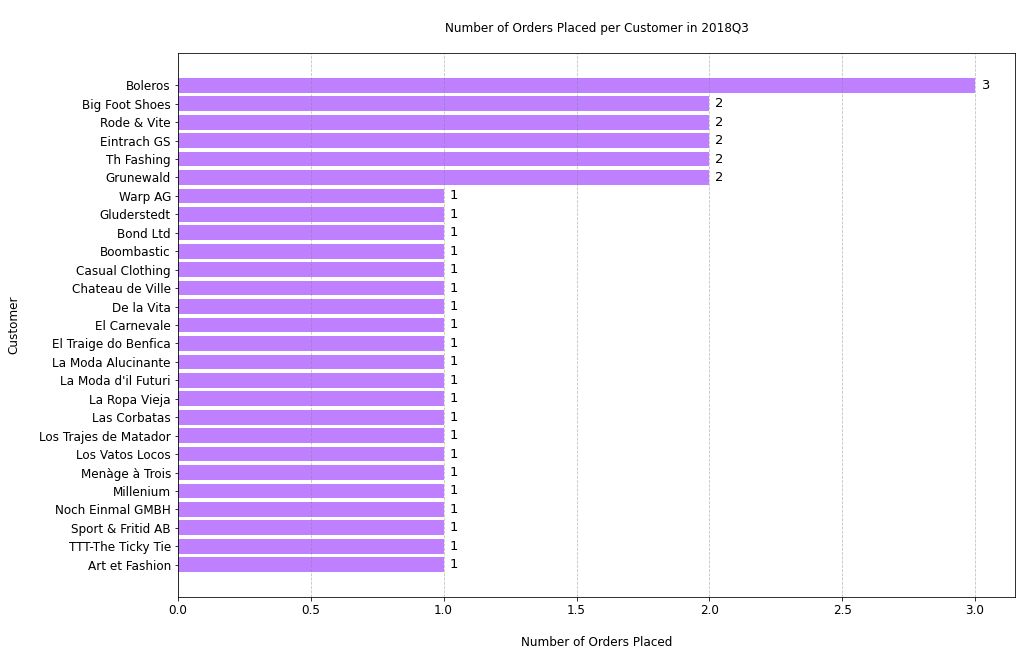

In [19]:
#group data by course type
customerorder18 = q3_2018.groupby('Customer Name')['OrderID'].nunique()

#sort grouped values in descending order,(ascending true)
#inplace true makes the values in order,
#inplace false makes the names (the axis) in order
customerorder18.sort_values(ascending = True, inplace = True)

customerorder18_index = customerorder18.index

plt.figure(figsize=(15, 10))


#align = 'center' makesd the name of bar aligned to centert of bar
plt.barh(customerorder18_index, customerorder18, color = '#bf80ff', align = 'center')

#showing tile/x-axis/y-axis of graph
plt.title('\nNumber of Orders Placed per Customer in 2018Q3\n', fontsize = 12)
plt.xlabel('\nNumber of Orders Placed', fontsize = 12)
plt.ylabel('Customer\n', fontsize = 12)

#set range for x and y axis
plt.tick_params(axis='x', labelsize = 12)
plt.tick_params(axis='y', labelsize = 12)

#display data labels
for x,y in zip(customerorder18_index, customerorder18):
    
    label = int(y)
    
    plt.annotate(label, (y,x), fontsize = 13, textcoords = 'offset points', xytext = (10,-3.5), ha = 'center')
    
#set gridlines
plt.grid(axis = 'x', c = 'grey', alpha = .5, linestyle = '--')

This graph helps answer the question

How many times has each customer bought items from the company?

In 2018Q3, Boleros has made 3 orders with the company which was the highest number of orders amongst all other customers in 2018Q3.

[back to top](#1)

## 4.3 Profit Gained per Customer for All Time <a id='4.3'></a>

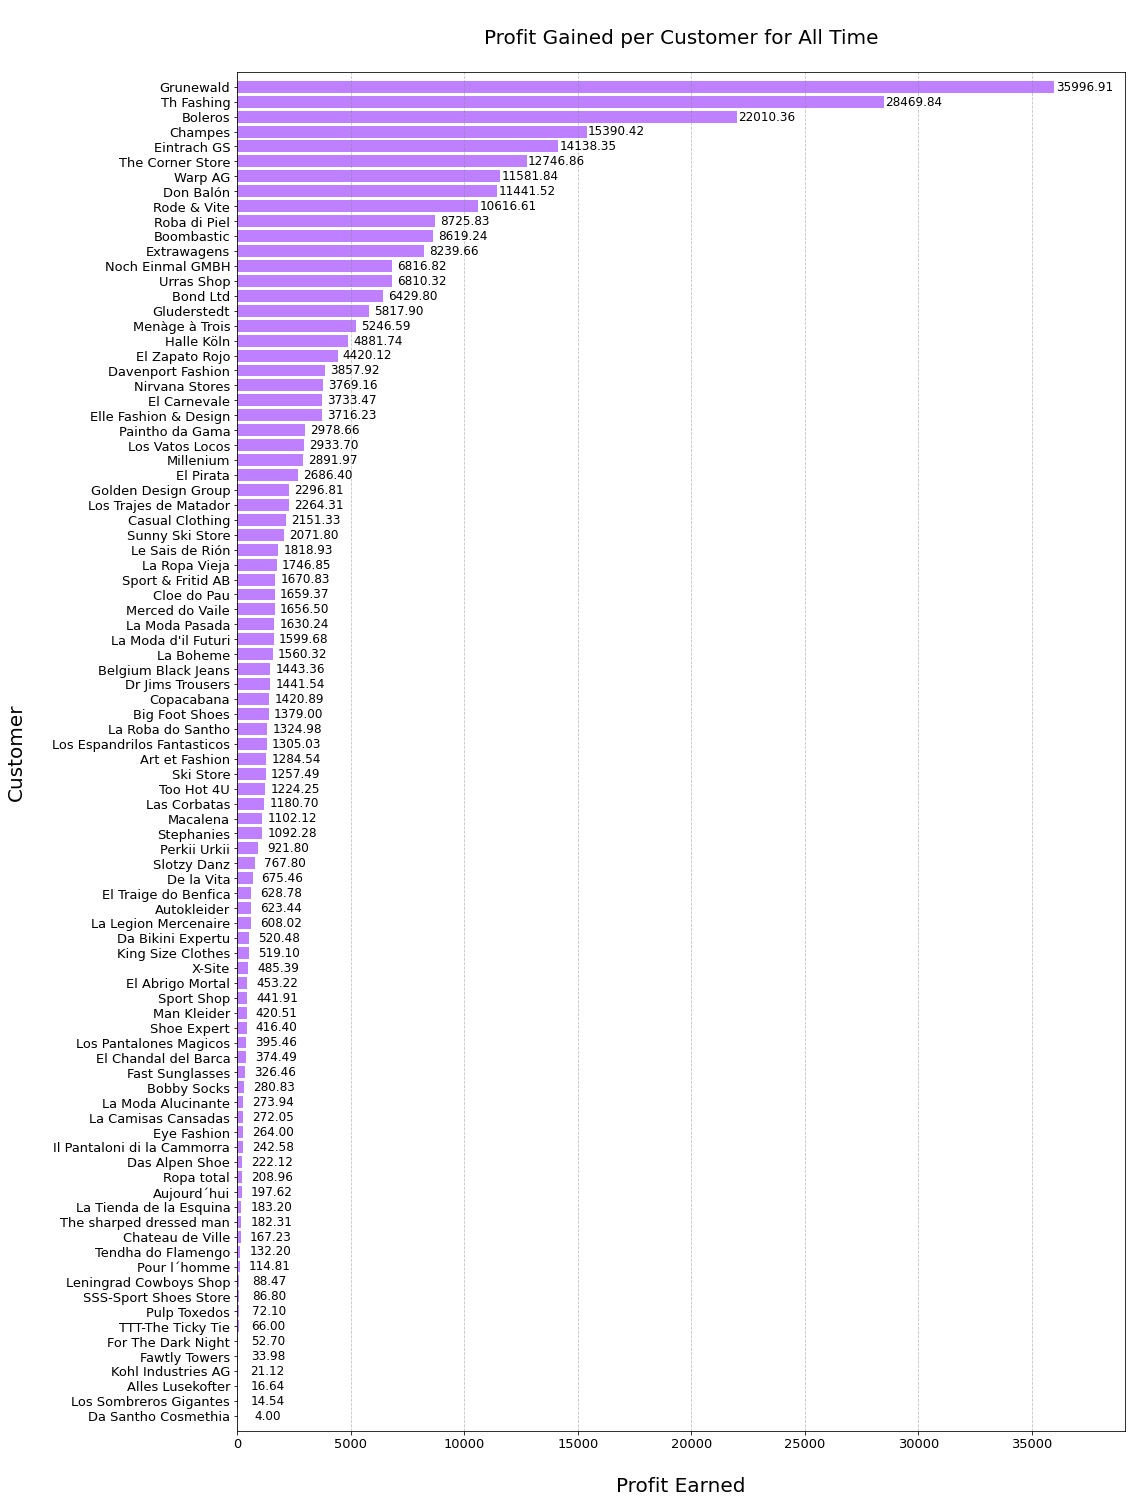

In [20]:
#group data by course type
customerprofall = df_2014.groupby('Customer Name')['Order Profit'].sum()

#sort grouped values in descending order,(ascending true)
#inplace true makes the values in order,
#inplace false makes the names (the axis) in order
customerprofall.sort_values(ascending = True, inplace = True)

customerprofall_index = customerprofall.index

plt.figure(figsize=(35, 25))

plt.subplot(1, 2, 1)

#align = 'center' makesd the name of bar aligned to centert of bar
plt.barh(customerprofall_index, customerprofall, color = '#bf80ff', align = 'center')

#showing tile/x-axis/y-axis of graph
plt.title('\nProfit Gained per Customer for All Time\n', fontsize = 20)
plt.xlabel('\nProfit Earned', fontsize = 20)
plt.ylabel('Customer\n', fontsize = 20)
plt.xlim(left = 0, right = 39100)
plt.ylim(bottom = -1, top = 90)

#set range for x and y axis
plt.tick_params(axis='x', labelsize = 13)
plt.tick_params(axis='y', labelsize = 13)

#display data labels
for x,y in zip(customerprofall_index, customerprofall):
    
    label = y
    
    plt.annotate('{:.2f}'.format(label), (y,x), fontsize = 12, textcoords = 'offset points', xytext = (30,-3.5), ha = 'center')
    
#set gridlines
plt.grid(axis = 'x', c = 'grey', alpha = .5, linestyle = '--')

This graph helps answer the question

What is the profit gained from each customer from the last quarter? during all time?

The customer who we have generated the most profit from for all time is Grunewald, who is located in Germany, andf the amount of profit generated is \\$35,996.91

## 4.4 Number of Orders Placed per Customer for All Time <a id='4.4'></a>

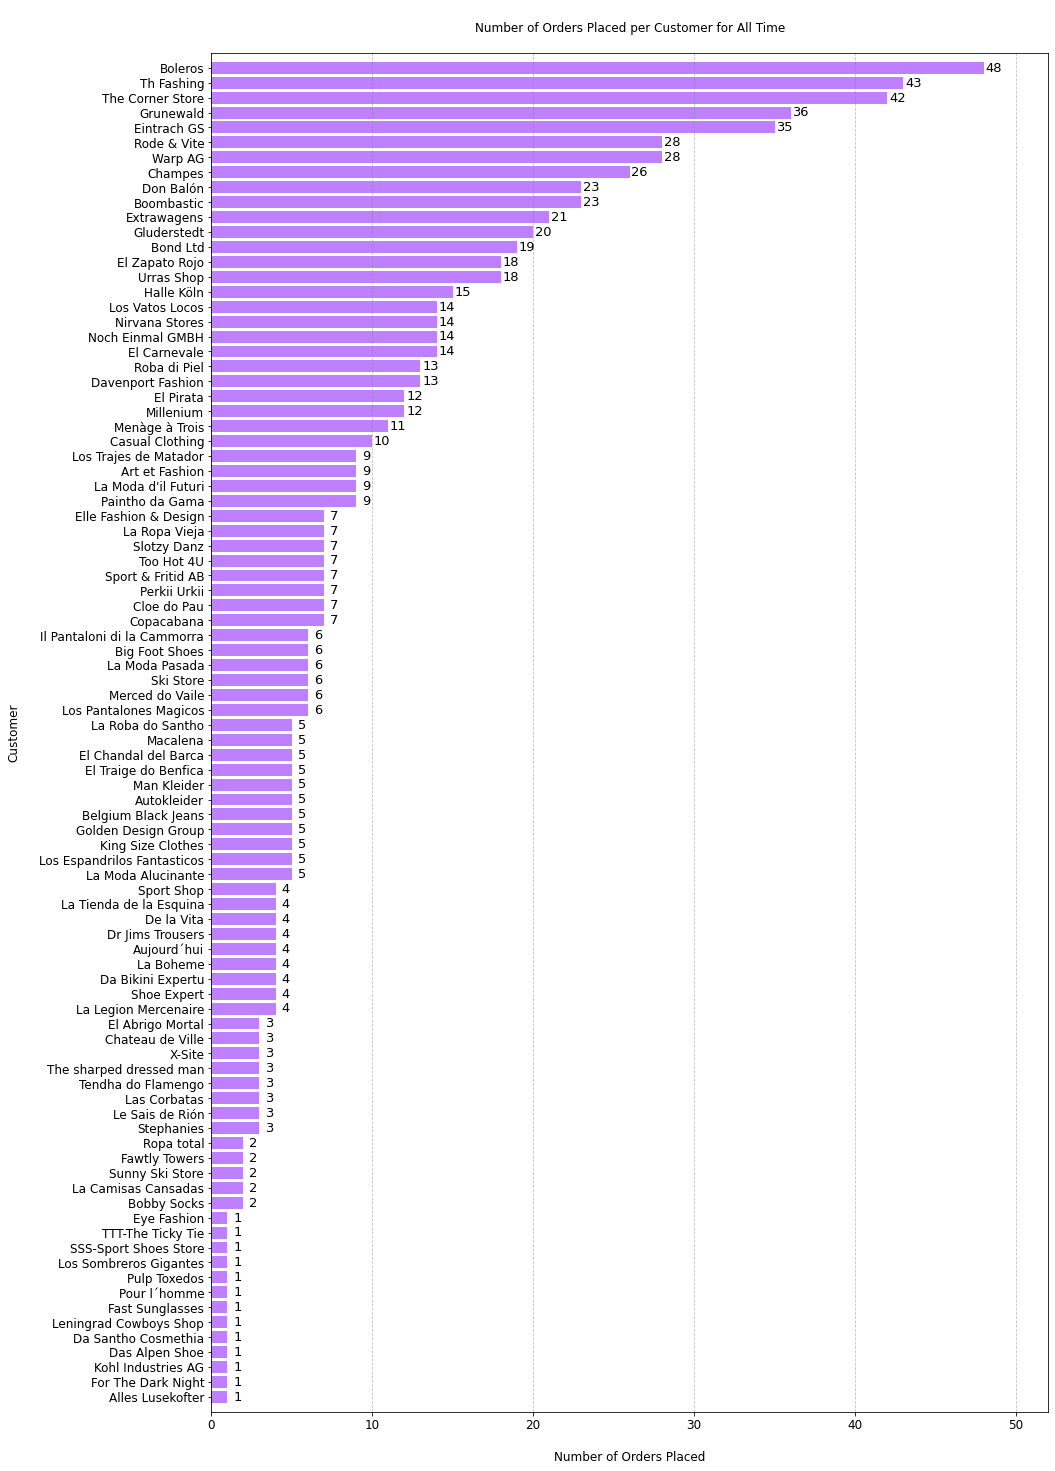

In [21]:
#group data by course type
customerorderall = df_2014.groupby('Customer Name')['OrderID'].nunique()

#sort grouped values in descending order,(ascending true)
#inplace true makes the values in order,
#inplace false makes the names (the axis) in order
customerorderall.sort_values(ascending = True, inplace = True)

customerorderall_index = customerorderall.index

plt.figure(figsize=(15, 25))


#align = 'center' makesd the name of bar aligned to centert of bar
plt.barh(customerorderall_index, customerorderall, color = '#bf80ff', align = 'center')

#showing tile/x-axis/y-axis of graph
plt.title('\nNumber of Orders Placed per Customer for All Time\n', fontsize = 12)
plt.xlabel('\nNumber of Orders Placed', fontsize = 12)
plt.ylabel('Customer\n', fontsize = 12)
plt.xlim(left = 0, right = 52)
plt.ylim(bottom = -1, top = 90)

#set range for x and y axis
plt.tick_params(axis='x', labelsize = 12)
plt.tick_params(axis='y', labelsize = 12)

#display data labels
for x,y in zip(customerorderall_index, customerorderall):
    
    label = int(y)
    
    plt.annotate(label, (y,x), fontsize = 13, textcoords = 'offset points', xytext = (10,-3.5), ha = 'center')
    
#set gridlines
plt.grid(axis = 'x', c = 'grey', alpha = .5, linestyle = '--')

This graph helps answer the question

How many times has each customer bought items from the company?

The customer who has made the most orders with the company for all time is Bolores, who is also the one who made the most number of orders with the company in 2018Q3. The number of orders made by Bolores with the company for all time is 48.

## 4.5 Average Amount Spent per Order per Customer for All Time <a id='4.5'></a>

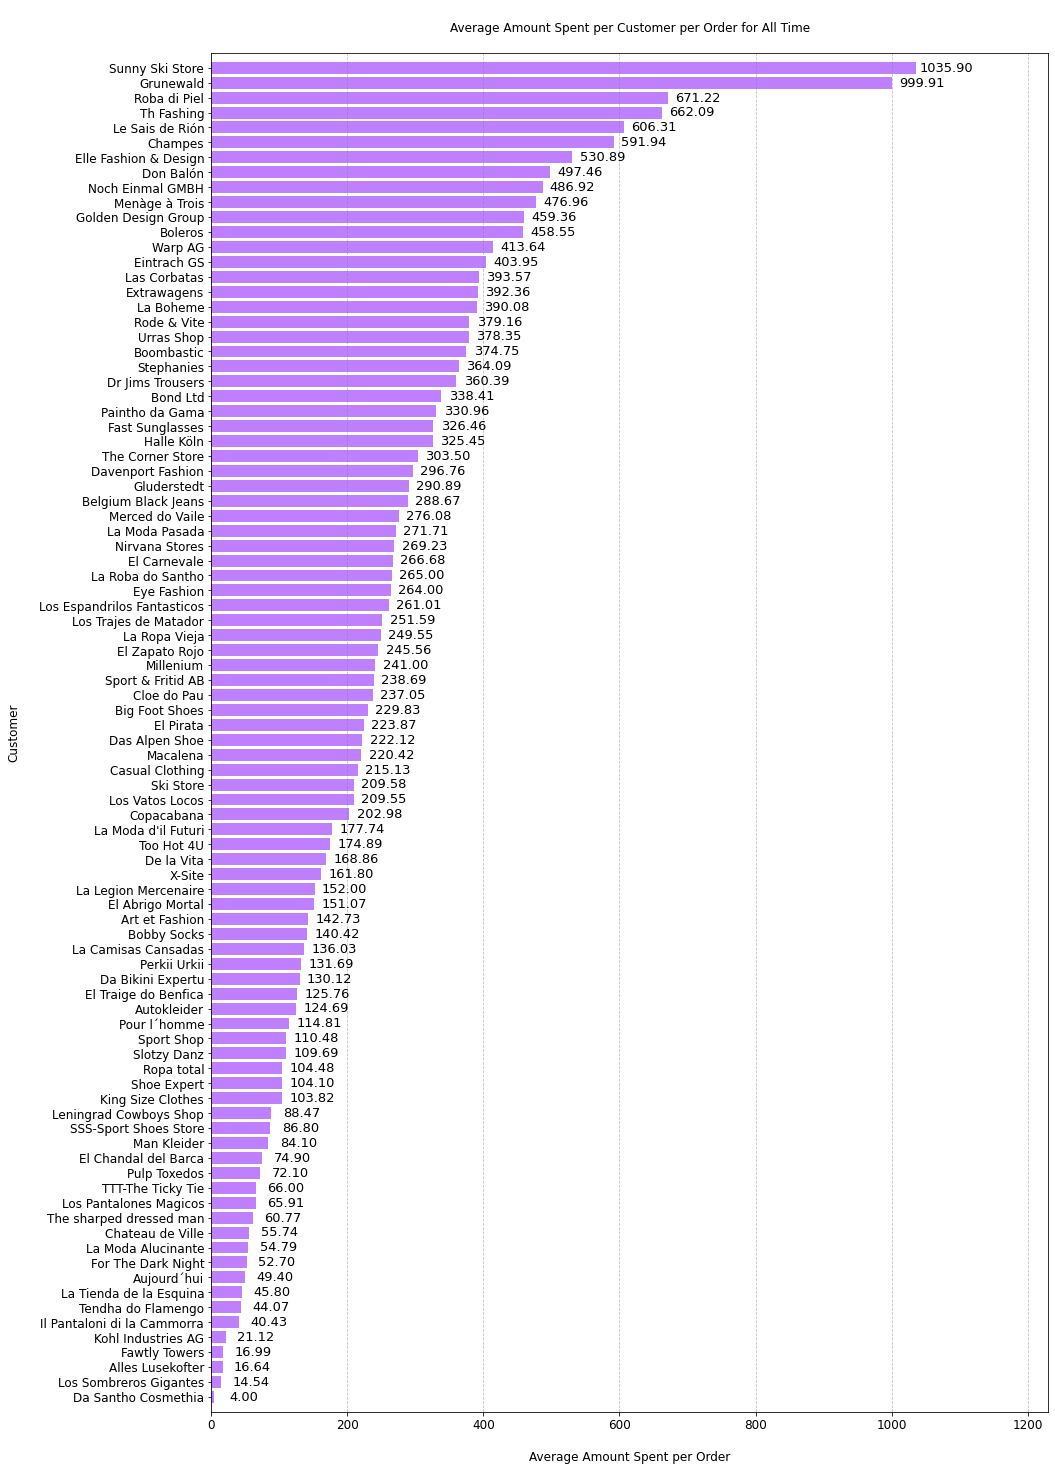

In [22]:
custave  = df_2014.groupby('Customer Name')['Order Profit'].sum()/df_2014.groupby('Customer Name')['OrderID'].nunique()

custave.sort_values(ascending = True, inplace = True)

aveind = custave.index

plt.figure(figsize=(15, 25))

#align = 'center' makesd the name of bar aligned to centert of bar
plt.barh(aveind, custave, color = '#bf80ff', align = 'center')

#showing tile/x-axis/y-axis of graph
plt.title('\nAverage Amount Spent per Customer per Order for All Time\n', fontsize = 12)
plt.xlabel('\nAverage Amount Spent per Order', fontsize = 12)
plt.ylabel('Customer\n', fontsize = 12)

plt.xlim(left = 0, right =1230)
plt.ylim(bottom = -1, top = 90)

#set range for x and y axis
plt.tick_params(axis='x', labelsize = 12)
plt.tick_params(axis='y', labelsize = 12)

#display data labels
for x,y in zip(aveind, custave):
    
    label = y
    
    plt.annotate('{:.2f}'.format(label), (y,x), fontsize = 13, textcoords = 'offset points', xytext = (30,-3.5), ha = 'center')
    
#set gridlines
plt.grid(axis = 'x', c = 'grey', alpha = .5, linestyle = '--')


This graph helps answer the question

What is the average amount spent per customer?

This graph shows the average amount of money spent per order for each customer for all time. 

On average, Sunny Ski Store, located in the USA has spent the most amount of money per order placed with an amount of \\$1,035.90 per order.

To gain better insights, it should be used together with the graph at [4.6](#4.6)

[back to top](#1)

## 4.6 Average Amount Spent per Order per Customer in 2018Q3 <a id='4.6'></a>

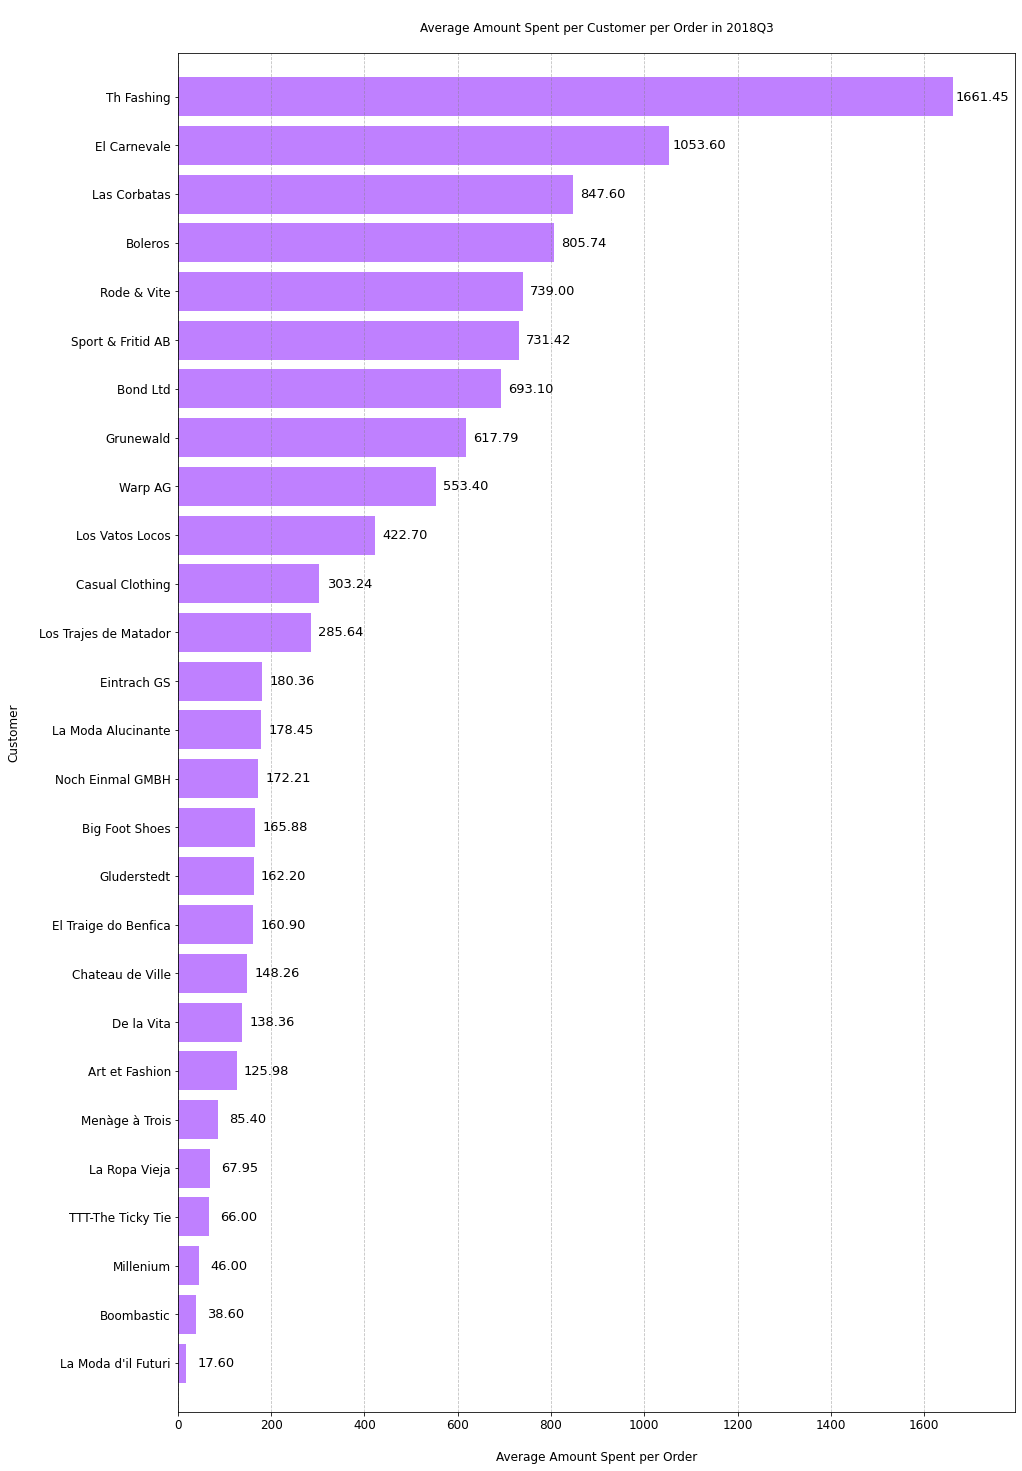

In [23]:
custave18  = q3_2018.groupby('Customer Name')['Order Profit'].sum()/q3_2018.groupby('Customer Name')['OrderID'].nunique()

custave18.sort_values(ascending = True, inplace = True)

aveind18 = custave18.index

plt.figure(figsize=(15, 25))

#align = 'center' makesd the name of bar aligned to centert of bar
plt.barh(aveind18, custave18, color = '#bf80ff', align = 'center')

#showing tile/x-axis/y-axis of graph
plt.title('\nAverage Amount Spent per Customer per Order in 2018Q3\n', fontsize = 12)
plt.xlabel('\nAverage Amount Spent per Order', fontsize = 12)
plt.ylabel('Customer\n', fontsize = 12)

plt.xlim(left = 0, right =1795)
plt.ylim(bottom = -1, top = 26.9)

#set range for x and y axis
plt.tick_params(axis='x', labelsize = 12)
plt.tick_params(axis='y', labelsize = 12)

#display data labels
for x,y in zip(aveind18, custave18):
    
    label = y
    
    plt.annotate('{:.2f}'.format(label), (y,x), fontsize = 13, textcoords = 'offset points', xytext = (30,-3.5), ha = 'center')
    
#set gridlines
plt.grid(axis = 'x', c = 'grey', alpha = .5, linestyle = '--')


This graph helps answer the question

What is the average amount spent per customer?

It shows the average amount of money spent per order for each customer in 2018Q3. 

On average, Th Fashing has spent the most amount of money per order placed with an amount of \\$1,661.45 per order.

To gain better insights, it should be used together with the graph at [4.5](#4.5)

[back to top](#1)

# 5. Region Focus <a id='5'></a>

## 5.1 Number of Customers per Country <a id='5.1'></a>

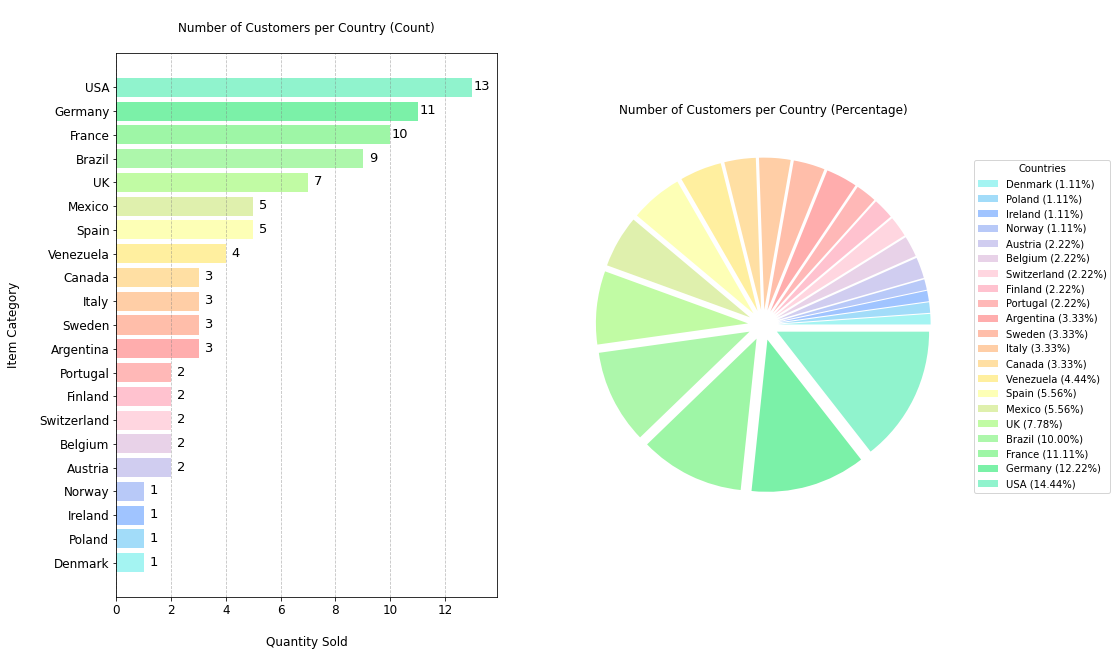

In [24]:
#extended colour list
extendedcolors = ['#a4f4f2',
                '#a2dcf9',
                '#a0c4ff',
                '#b8c9f8',
                '#d0cdf0',
                '#e8d2e8',
                '#ffd6e0',
                '#ffc2cf',
                '#ffb8b7',
                '#ffadad',
                '#ffbeaa',
                '#ffcea6',
                '#ffdfa3',
                '#ffef9f',
                '#fdffb6',
                '#dff0ad',
                '#c1fba4',
                '#adf7ab',
                '#9ef6a6',
                '#7bf1a8',
                '#90f3cd',]

#group data by course type
country = df_2014.groupby('Customer Country')['Customer Name'].nunique()

custtotal = df_2014['Customer Name'].nunique()

#sort grouped values in descending order,(ascending true)
#inplace true makes the values in order,
#inplace false makes the names (the axis) in order
country.sort_values(ascending = True, inplace = True)

country_index = country.index

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

plt.subplot(1, 2, 1)

#align = 'center' makesd the name of bar aligned to centert of bar
plt.barh(country_index, country, color = extendedcolors, align = 'center')

#showing tile/x-axis/y-axis of graph
plt.title('\nNumber of Customers per Country (Count)\n', fontsize = 12)
plt.xlabel('\nQuantity Sold', fontsize = 12)
plt.ylabel('Item Category\n', fontsize = 12)
plt.xlim(left = 0, right = 13.9)

#set range for x and y axis
plt.tick_params(axis='x', labelsize = 12)
plt.tick_params(axis='y', labelsize = 12)

#display data labels
for x,y in zip(country_index, country):
    
    label = int(y)
    
    plt.annotate(label, (y,x), fontsize = 13, textcoords = 'offset points', xytext = (10,-3), ha = 'center')
    
#set gridlines
plt.grid(axis = 'x', c = 'grey', alpha = .5, linestyle = '--')

plt.subplot(1, 2, 2)

plt.title('\nNumber of Customers per Country (Percentage)\n', fontsize = 12)
plt.pie(country, explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1), colors = extendedcolors)

legend = ['{} ({:.2%})'.format(country_index, country/custtotal) for country_index, country in zip(country_index, country)]
plt.legend(legend, title="Countries", bbox_to_anchor=(1.05,0.5), loc="center right", fontsize=10, bbox_transform=plt.gcf().transFigure)


#show plot
plt.show()

The graph helps answer the question

Which country is the majority of the customers from?

It shows the number of customers in each country.

USA has the most number of customers followed by Germany, then France at 13, 11, and 10 customers respectively

[back to top](#1)

## 5.2 Amount of Profit Generated per Country in 2018Q3 <a id='5.2'></a>

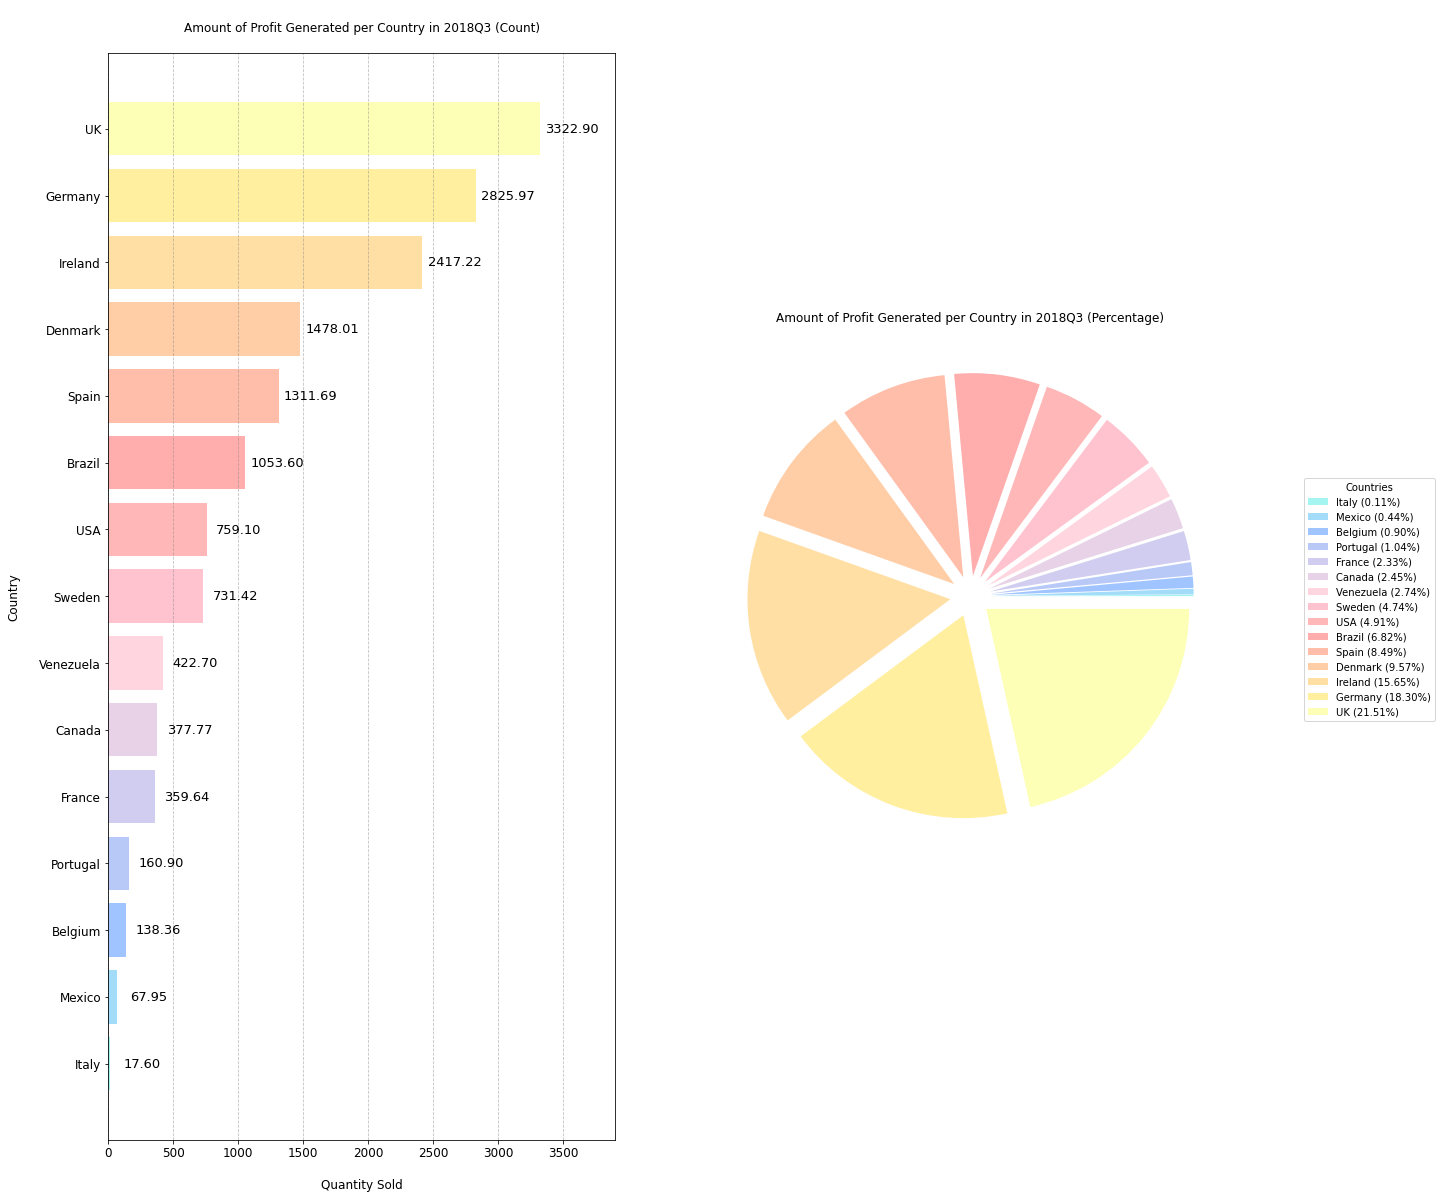

In [25]:
#group data by course type
countryprof18 = q3_2018.groupby('Customer Country')['Order Profit'].sum()
countrytotalprof18 = q3_2018['Order Profit'].sum()

#sort grouped values in descending order,(ascending true)
#inplace true makes the values in order,
#inplace false makes the names (the axis) in order
countryprof18.sort_values(ascending = True, inplace = True)

countryprof18_index = countryprof18.index

fig, ax = plt.subplots(2, 2, figsize=(20, 20))

plt.subplot(1, 2, 1)

#align = 'center' makesd the name of bar aligned to centert of bar
plt.barh(countryprof18_index, countryprof18, color = extendedcolors, align = 'center')

#showing tile/x-axis/y-axis of graph
plt.title('\nAmount of Profit Generated per Country in 2018Q3 (Count)\n', fontsize = 12)
plt.xlabel('\nQuantity Sold', fontsize = 12)
plt.ylabel('Country\n', fontsize = 12)
plt.xlim(left = 0, right = 3900)

#set range for x and y axis
plt.tick_params(axis='x', labelsize = 12)
plt.tick_params(axis='y', labelsize = 12)

#display data labels
for x,y in zip(countryprof18_index, countryprof18):
    
    label = y
    
    plt.annotate('{:.2f}'.format(label), (y,x), fontsize = 13, textcoords = 'offset points', xytext = (32,-3.5), ha = 'center')
    
#set gridlines
plt.grid(axis = 'x', c = 'grey', alpha = .5, linestyle = '--')

plt.subplot(1, 2, 2)

plt.title('\nAmount of Profit Generated per Country in 2018Q3 (Percentage)\n', fontsize = 12)

plt.pie(countryprof18, explode=(0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1), colors = extendedcolors)

legend = ['{} ({:.2%})'.format(countryprof18_index, countryprof18/countrytotalprof18) for countryprof18_index, countryprof18 in zip(countryprof18_index, countryprof18)]
plt.legend(legend, title="Countries", bbox_to_anchor=(1.05,0.5), loc="center right", fontsize=10, bbox_transform=plt.gcf().transFigure)


#show plot
plt.show()

The graph helps answer the question

What is the amount of profit made from each country?

The graph shows the amount of profit generated from each country for 2018Q3. With a profit of \\$3,322.90, the company has generated the most profit from the UK.

In 2018Q3, the UK was the biggest contributor for the amount of profit generated with a generated profit of 21.51% of the total.

[back to top](#1)

## 5.3 Amount of Profit Generated per Country for All Time <a id='5.3'></a>

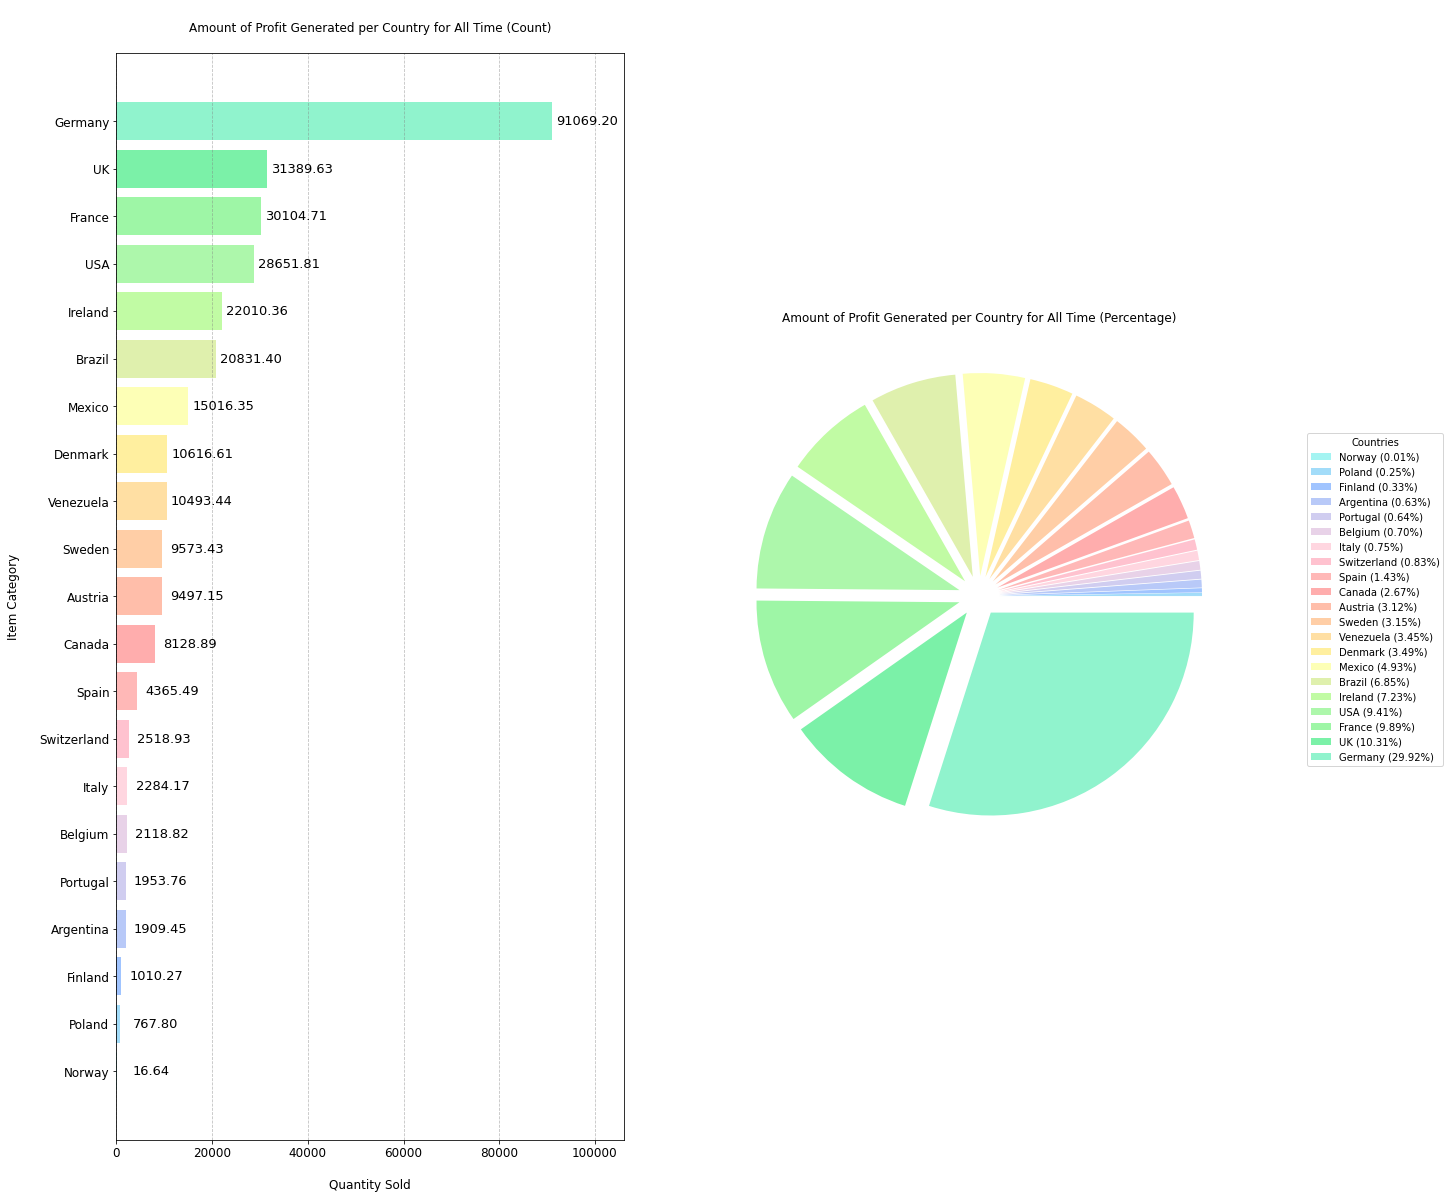

In [26]:
#group data by course type
countryprofall = df_2014.groupby('Customer Country')['Order Profit'].sum()
countrytotalprof = df_2014['Order Profit'].sum()

#sort grouped values in descending order,(ascending true)
#inplace true makes the values in order,
#inplace false makes the names (the axis) in order
countryprofall.sort_values(ascending = True, inplace = True)

countryprofall_index = countryprofall.index

fig, ax = plt.subplots(2, 2, figsize=(20, 20))

plt.subplot(1, 2, 1)

#align = 'center' makesd the name of bar aligned to centert of bar
plt.barh(countryprofall_index, countryprofall, color = extendedcolors, align = 'center')

#showing tile/x-axis/y-axis of graph
plt.title('\nAmount of Profit Generated per Country for All Time (Count)\n', fontsize = 12)
plt.xlabel('\nQuantity Sold', fontsize = 12)
plt.ylabel('Item Category\n', fontsize = 12)
plt.xlim(left = 0, right = 106000)

#set range for x and y axis
plt.tick_params(axis='x', labelsize = 12)
plt.tick_params(axis='y', labelsize = 12)

#display data labels
for x,y in zip(countryprofall_index, countryprofall):
    
    label = y
    
    plt.annotate('{:.2f}'.format(label), (y,x), fontsize = 13, textcoords = 'offset points', xytext = (35,-3.5), ha = 'center')
    
#set gridlines
plt.grid(axis = 'x', c = 'grey', alpha = .5, linestyle = '--')

plt.subplot(1, 2, 2)

plt.title('\nAmount of Profit Generated per Country for All Time (Percentage)\n', fontsize = 12)

plt.pie(countryprofall, explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1), colors = extendedcolors)

legend = ['{} ({:.2%})'.format(countryprofall_index, countryprofall/countrytotalprof) for countryprofall_index, countryprofall in zip(countryprofall_index, countryprofall)]
plt.legend(legend, title="Countries", bbox_to_anchor=(1.05,0.5), loc="center right", fontsize=10, bbox_transform=plt.gcf().transFigure)


#show plot
plt.show()

The graph helps answer the question

What is the amount of profit made from each country?

In terms of the amount of profit generated from each country for all time. With a profit of \\$91,069.20, the company has generated the most profit from the Germany.

For all time, Germany was the biggest contributor for the amount of profit generated with a generated profit of 29.92% of the total.

[back to top](#1)

## 5.4 Total Number of Items Bought per Country in 2018Q3 <a id='5.4'></a>

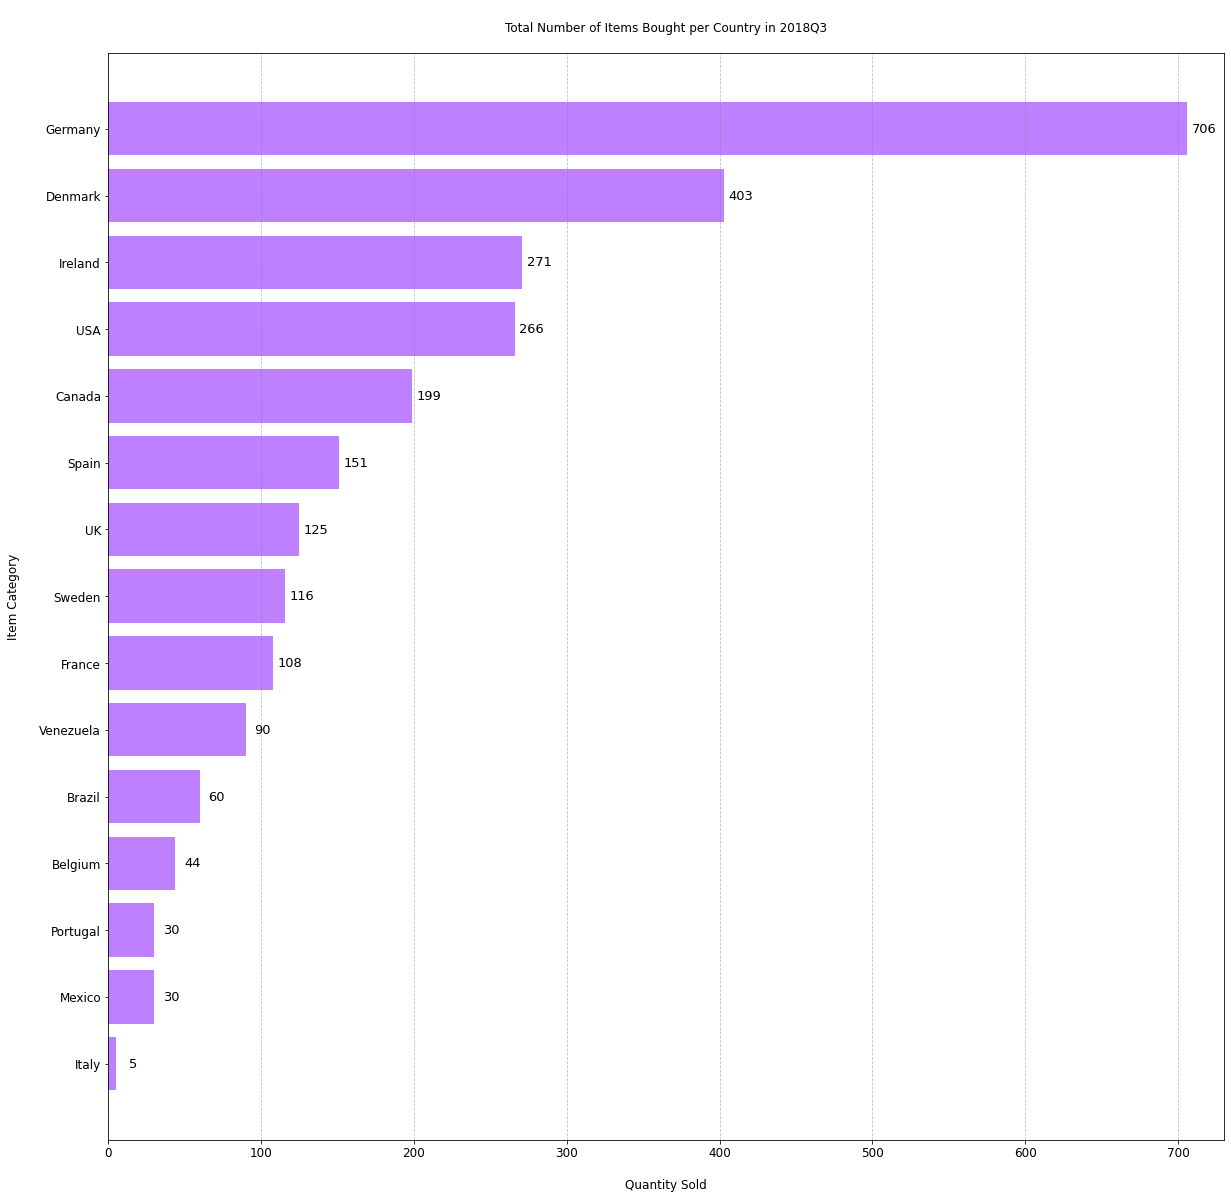

In [27]:
#group data by course type
citemquant18 = q3_2018.groupby('Customer Country')['Quantity'].sum()

#sort grouped values in descending order,(ascending true)
#inplace true makes the values in order,
#inplace false makes the names (the axis) in order
citemquant18.sort_values(ascending = True, inplace = True)

citemquant18_index = citemquant18.index

plt.figure(figsize=(20, 20))

#align = 'center' makesd the name of bar aligned to centert of bar
plt.barh(citemquant18_index, citemquant18, color = '#bf80ff', align = 'center')

#showing tile/x-axis/y-axis of graph
plt.title('\nTotal Number of Items Bought per Country in 2018Q3\n', fontsize = 12)
plt.xlabel('\nQuantity Sold', fontsize = 12)
plt.ylabel('Item Category\n', fontsize = 12)
plt.xlim(left = 0, right = 730)

#set range for x and y axis
plt.tick_params(axis='x', labelsize = 12)
plt.tick_params(axis='y', labelsize = 12)

#display data labels
for x,y in zip(citemquant18_index, citemquant18):
    
    label = int(y)
    
    plt.annotate(label, (y,x), fontsize = 13, textcoords = 'offset points', xytext = (17,-3.5), ha = 'center')
    
#set gridlines
plt.grid(axis = 'x', c = 'grey', alpha = .5, linestyle = '--')

#show plot
plt.show()

The graph helps answer the question


Which country has bought the most number of items from the company?


In 2018Q3, Germany had the most number of items sold to them with 706 units sold.

[back to top](#1)

## 5.5 Total Number of Items Bought per Country for All Time  <a id='5.5'></a>

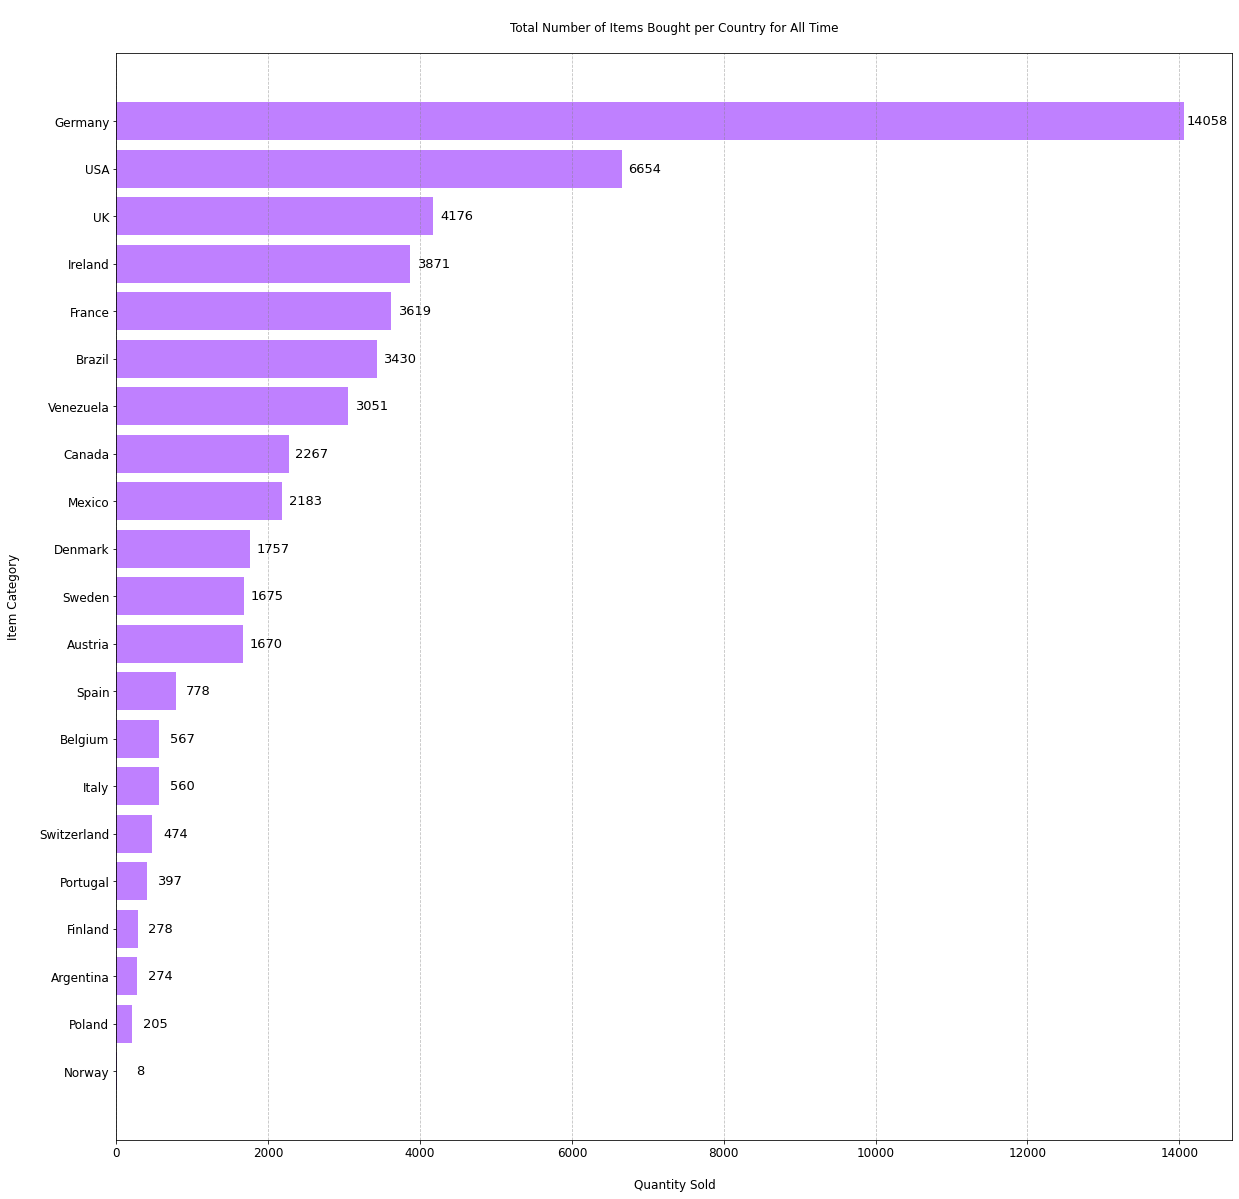

In [28]:
#group data by course type
citemquantall = df_2014.groupby('Customer Country')['Quantity'].sum()

#sort grouped values in descending order,(ascending true)
#inplace true makes the values in order,
#inplace false makes the names (the axis) in order
citemquantall.sort_values(ascending = True, inplace = True)

citemquantall_index = citemquantall.index

plt.figure(figsize=(20, 20))

#align = 'center' makesd the name of bar aligned to centert of bar
plt.barh(citemquantall_index, citemquantall, color = '#bf80ff', align = 'center')

#showing tile/x-axis/y-axis of graph
plt.title('\nTotal Number of Items Bought per Country for All Time\n', fontsize = 12)
plt.xlabel('\nQuantity Sold', fontsize = 12)
plt.ylabel('Item Category\n', fontsize = 12)
plt.xlim(left = 0, right = 14700)

#set range for x and y axis
plt.tick_params(axis='x', labelsize = 12)
plt.tick_params(axis='y', labelsize = 12)

#display data labels
for x,y in zip(citemquantall_index, citemquantall):
    
    label = int(y)
    
    plt.annotate(label, (y,x), fontsize = 13, textcoords = 'offset points', xytext = (23,-3.5), ha = 'center')
    
#set gridlines
plt.grid(axis = 'x', c = 'grey', alpha = .5, linestyle = '--')

#show plot
plt.show()

Similarly to [graph 5.4](#5.4), the graph helps answer the question 

Which country has bought the most number of items from the company?

and like [graph 5.4](#5.4), Germany had the most number of items sold to them with 14058 units sold for all time.

[back to top](#1)

## 5.6 Number of Orders Made per Country in 2018Q3 <a id='5.6'></a>

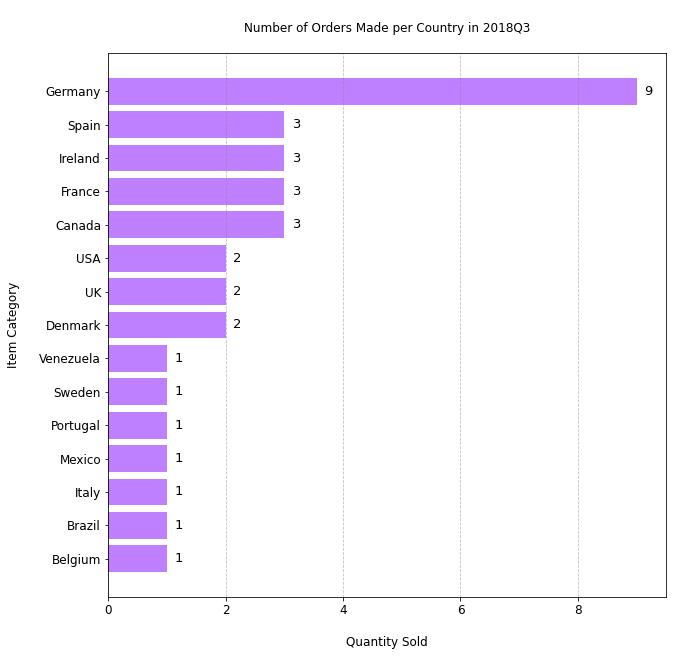

In [29]:
#group data by course type
ctotalorder18 = q3_2018.groupby('Customer Country')['OrderID'].nunique()

#sort grouped values in descending order,(ascending true)
#inplace true makes the values in order,
#inplace false makes the names (the axis) in order
ctotalorder18.sort_values(ascending = True, inplace = True)

ctotalorder18_index = ctotalorder18.index

plt.figure(figsize=(10, 10))

#align = 'center' makesd the name of bar aligned to centert of bar
plt.barh(ctotalorder18_index, ctotalorder18, color = '#bf80ff', align = 'center')

#showing tile/x-axis/y-axis of graph
plt.title('\nNumber of Orders Made per Country in 2018Q3\n', fontsize = 12)
plt.xlabel('\nQuantity Sold', fontsize = 12)
plt.ylabel('Item Category\n', fontsize = 12)
plt.xlim(left = 0, right = 9.5)

#set range for x and y axis
plt.tick_params(axis='x', labelsize = 12)
plt.tick_params(axis='y', labelsize = 12)

#display data labels
for x,y in zip(ctotalorder18_index, ctotalorder18):
    
    label = int(y)
    
    plt.annotate(label, (y,x), fontsize = 13, textcoords = 'offset points', xytext = (12,-3.5), ha = 'center')
    
#set gridlines
plt.grid(axis = 'x', c = 'grey', alpha = .5, linestyle = '--')

#show plot
plt.show()

This graph helps answer the question

Which country has made the most orders?

In 2018Q3, the most number of orders were made in the country Germany, with the number of orders being 9. This number is also 3 times of that of the number of orders made by the multiple countries ranked second, which have the number of orders being 3.

[back to top](#1)

## 5.7 Number of Orders Made per Country for All Time <a id='5.7'></a>

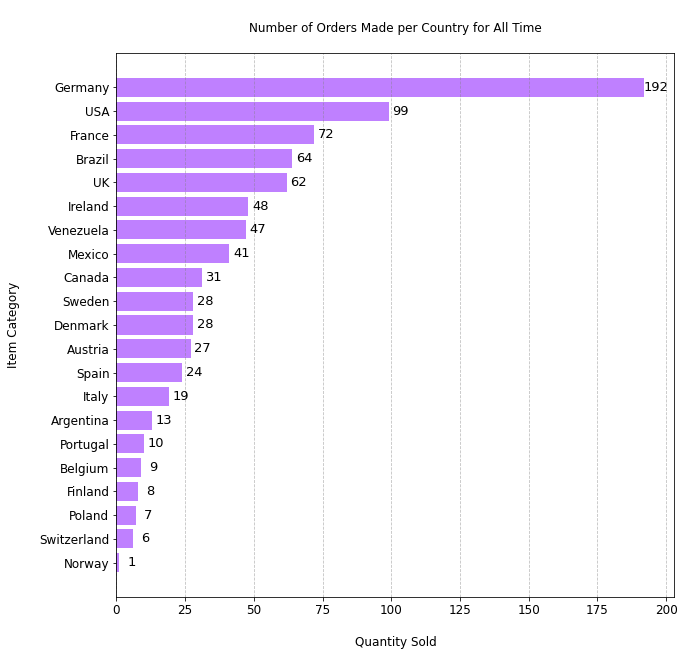

In [30]:
#group data by course type
ctotalorderall = df_2014.groupby('Customer Country')['OrderID'].nunique()

#sort grouped values in descending order,(ascending true)
#inplace true makes the values in order,
#inplace false makes the names (the axis) in order
ctotalorderall.sort_values(ascending = True, inplace = True)

ctotalorderall_index = ctotalorderall.index

plt.figure(figsize=(10, 10))

#align = 'center' makesd the name of bar aligned to centert of bar
plt.barh(ctotalorderall_index, ctotalorderall, color = '#bf80ff', align = 'center')

#showing tile/x-axis/y-axis of graph
plt.title('\nNumber of Orders Made per Country for All Time\n', fontsize = 12)
plt.xlabel('\nQuantity Sold', fontsize = 12)
plt.ylabel('Item Category\n', fontsize = 12)
plt.xlim(left = 0, right = 203)

#set range for x and y axis
plt.tick_params(axis='x', labelsize = 12)
plt.tick_params(axis='y', labelsize = 12)

#display data labels
for x,y in zip(ctotalorderall_index, ctotalorderall):
    
    label = int(y)
    
    plt.annotate(label, (y,x), fontsize = 13, textcoords = 'offset points', xytext = (12,-3.5), ha = 'center')
    
#set gridlines
plt.grid(axis = 'x', c = 'grey', alpha = .5, linestyle = '--')

#show plot
plt.show()

Like [graph 5.6](#5.6), this graph answers the question

Which country has made the most orders?

Similarly to the statistics shown in [graph 5.6](#5.6), the most number of orders were made in the country Germany, with the number of orders being 192.

This number is also almost 2 times of that of the number of orders made by the country ranked second, USA, which have the number of orders being 99.

[back to top](#1)

# 6. Dashboards <a id='6'></a> 

## 6.1 Sales Trend by Financial Quarter/Product Category <a id='6.1'></a>

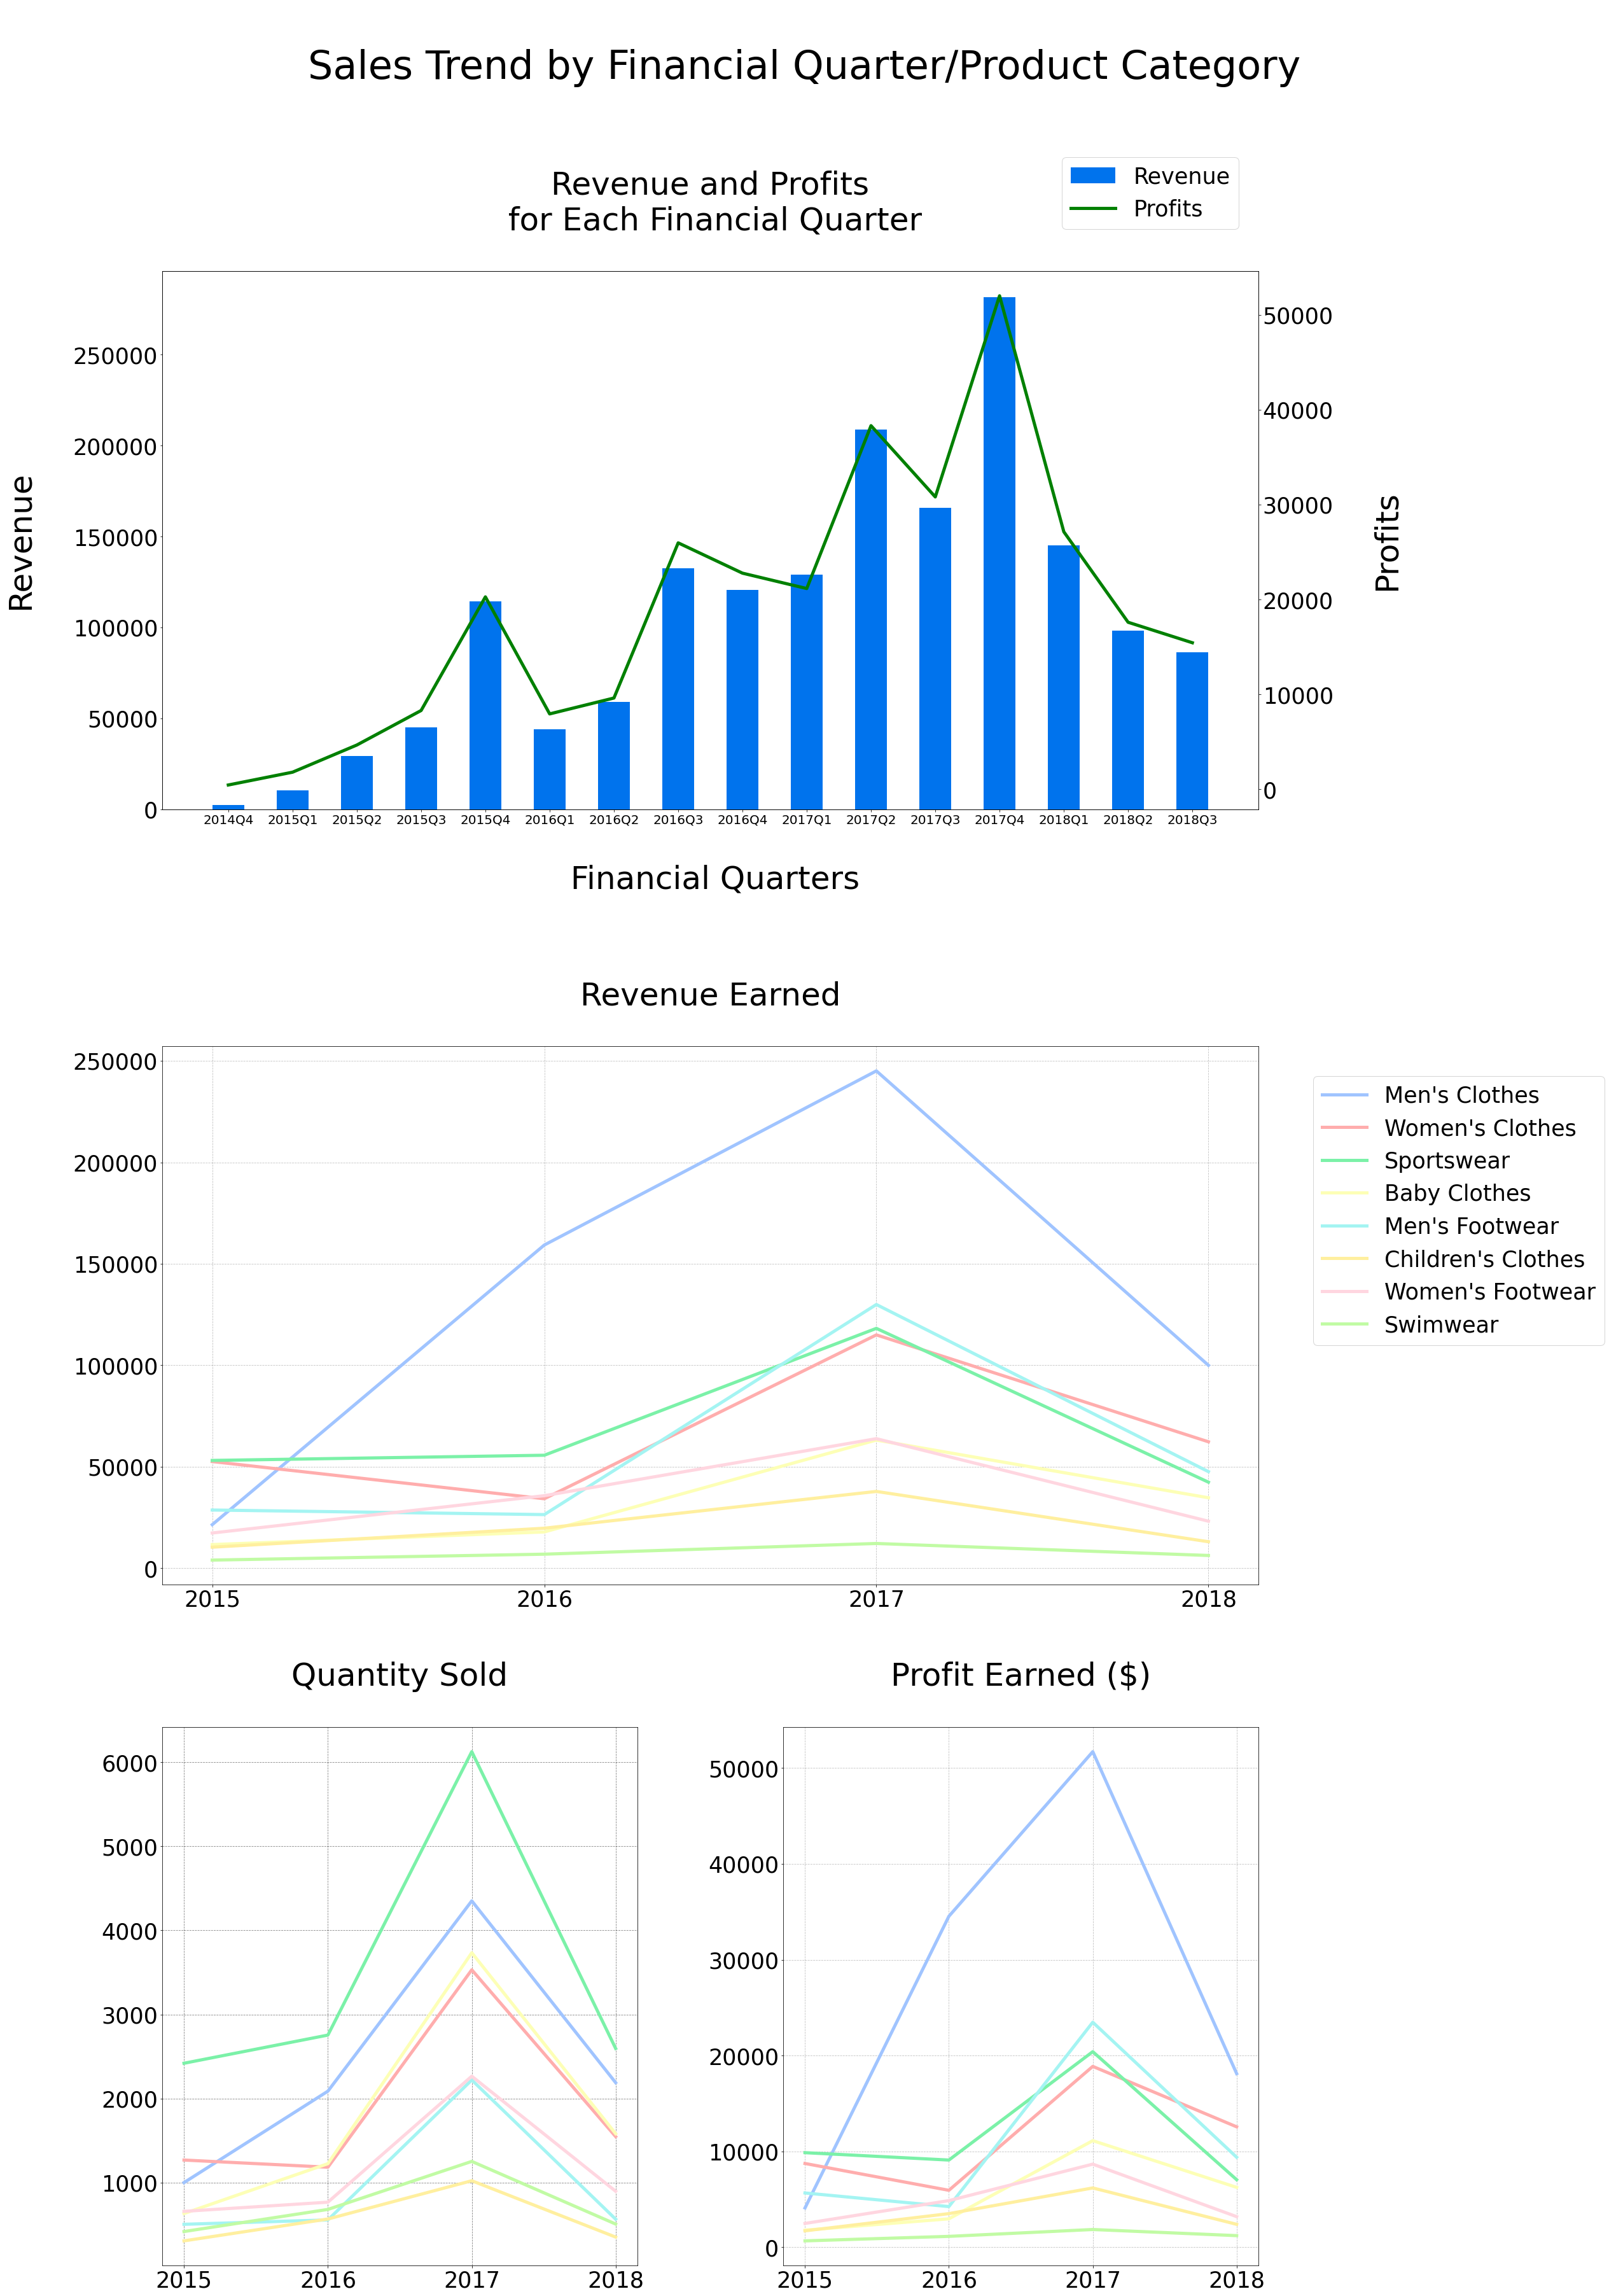

In [31]:
# Create a figure to be used as a dashboard
fig = plt.figure(figsize=(35,50), constrained_layout=True)

# Use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows=3, ncols=2, figure=fig)
#-----------------------------------------------------------------------------

# Define subplots and their corresponding positions
ax1 = fig.add_subplot(gs[0, :])

# Plot revenue chart
ax1.bar(orderdt, totalrev, color = '#0073ed', width=0.5, label='Revenue')
ax1.set_title('\nRevenue and Profits\n for Each Financial Quarter\n', fontsize = 50)
ax1.set_ylabel('Revenue\n', fontsize = 50) # first y-axis (on the left)
ax1.set_xlabel('\n Financial Quarters\n', fontsize = 50)

ax1.tick_params(axis='x', labelsize = 20)
ax1.tick_params(axis='y', labelsize = 35)

# Instantiate a second axes that shares the same x-axis
ax_p = ax1.twinx()

# Plot profits chart
ax_p.plot(orderdt, totalprof, 'green', linewidth = 5, label = 'Profits')
ax_p.set_ylabel('\nProfits', fontsize = 50) # second y-axis (on the right)

ax_p.tick_params(axis='y', labelsize = 35)

# Set location of legend for both axes
fig.legend(fontsize = 35, loc=(0.66, 0.9))
#-----------------------------------------------------------------------------

ax2 = fig.add_subplot(gs[1, :])

ax2.plot(year, pc_r1, '#a0c4ff', linewidth = 5, label = 'Men\'s Clothes')
ax2.plot(year, pc_r2, '#ffadad', linewidth = 5, label = 'Women\'s Clothes')
ax2.plot(year, pc_r3, '#7bf1a8', linewidth = 5, label = 'Sportswear')
ax2.plot(year, pc_r4, '#fdffb6', linewidth = 5, label = 'Baby Clothes')
ax2.plot(year, pc_r5, '#a4f4f2', linewidth = 5, label = 'Men\'s Footwear')
ax2.plot(year, pc_r6, '#ffef9f', linewidth = 5, label = 'Children\'s Clothes')
ax2.plot(year, pc_r7, '#ffd6e0', linewidth = 5, label = 'Women\'s Footwear')
ax2.plot(year, pc_r8, '#c1fba4', linewidth = 5, label = 'Swimwear')

#set the plot title
ax2.set_title('\nRevenue Earned\n', fontsize = 50)

#set the marker size 
ax2.tick_params(axis='x', labelsize = 35)
ax2.tick_params(axis='y', labelsize = 35)

#set gridlines
ax2.grid(c = 'grey', alpha = .5, linestyle = '--')

#set legend
ax2.legend(fontsize = 35, loc=(1.05,0.445))
#-----------------------------------------------------------------------------

ax3 = fig.add_subplot(gs[2, 0])

#plot the lines
ax3.plot(year, pc_q1, '#a0c4ff', linewidth = 5, label = 'Men\'s Clothes')
ax3.plot(year, pc_q2, '#ffadad', linewidth = 5, label = 'Women\'s Clothes')
ax3.plot(year, pc_q3, '#7bf1a8', linewidth = 5, label = 'Sportswear')
ax3.plot(year, pc_q4, '#fdffb6', linewidth = 5, label = 'Baby Clothes')
ax3.plot(year, pc_q5, '#a4f4f2', linewidth = 5, label = 'Men\'s Footwear')
ax3.plot(year, pc_q6, '#ffef9f', linewidth = 5, label = 'Children\'s Clothes')
ax3.plot(year, pc_q7, '#ffd6e0', linewidth = 5, label = 'Women\'s Footwear')
ax3.plot(year, pc_q8, '#c1fba4', linewidth = 5, label = 'Swimwear')

#set the plot title
ax3.set_title('\nQuantity Sold\n', fontsize = 50)

#set the marker size 
ax3.tick_params(axis='x', labelsize = 35)
ax3.tick_params(axis='y', labelsize = 35)

#set gridlines
ax3.grid(c = 'k', alpha = .5, linestyle = '--')
#-----------------------------------------------------------------------

ax4 = fig.add_subplot(gs[2, 1])

#plot the lines
ax4.plot(year, pc_p1, '#a0c4ff', linewidth = 5, label = 'Men\'s Clothes')
ax4.plot(year, pc_p2, '#ffadad', linewidth = 5, label = 'Women\'s Clothes')
ax4.plot(year, pc_p3, '#7bf1a8', linewidth = 5, label = 'Sportswear')
ax4.plot(year, pc_p4, '#fdffb6', linewidth = 5, label = 'Baby Clothes')
ax4.plot(year, pc_p5, '#a4f4f2', linewidth = 5, label = 'Men\'s Footwear')
ax4.plot(year, pc_p6, '#ffef9f', linewidth = 5, label = 'Children\'s Clothes')
ax4.plot(year, pc_p7, '#ffd6e0', linewidth = 5, label = 'Women\'s Footwear')
ax4.plot(year, pc_p8, '#c1fba4', linewidth = 5, label = 'Swimwear')

#set the plot title
ax4.set_title('\nProfit Earned ($)\n', fontsize = 50)

#set the marker size
ax4.tick_params(axis='x', labelsize = 35)
ax4.tick_params(axis='y', labelsize = 35)

#set gridlines
ax4.grid(c = 'grey', alpha = .5, linestyle = '--')

fig.suptitle("\nSales Trend by Financial Quarter/Product Category\n", fontsize=62)

plt.show()

This dashboard is used to look at sales and profit/revenue trends.It was created to be able to compare these trends so that there is a possibility that, using these graphs, future rises and falls in profit/revenue for each financial quarter can be predicted.

[back to top](#1)

## 6.2 Product and Product Category Sales Statistics for 2018Q3 <a id='6.2'></a>

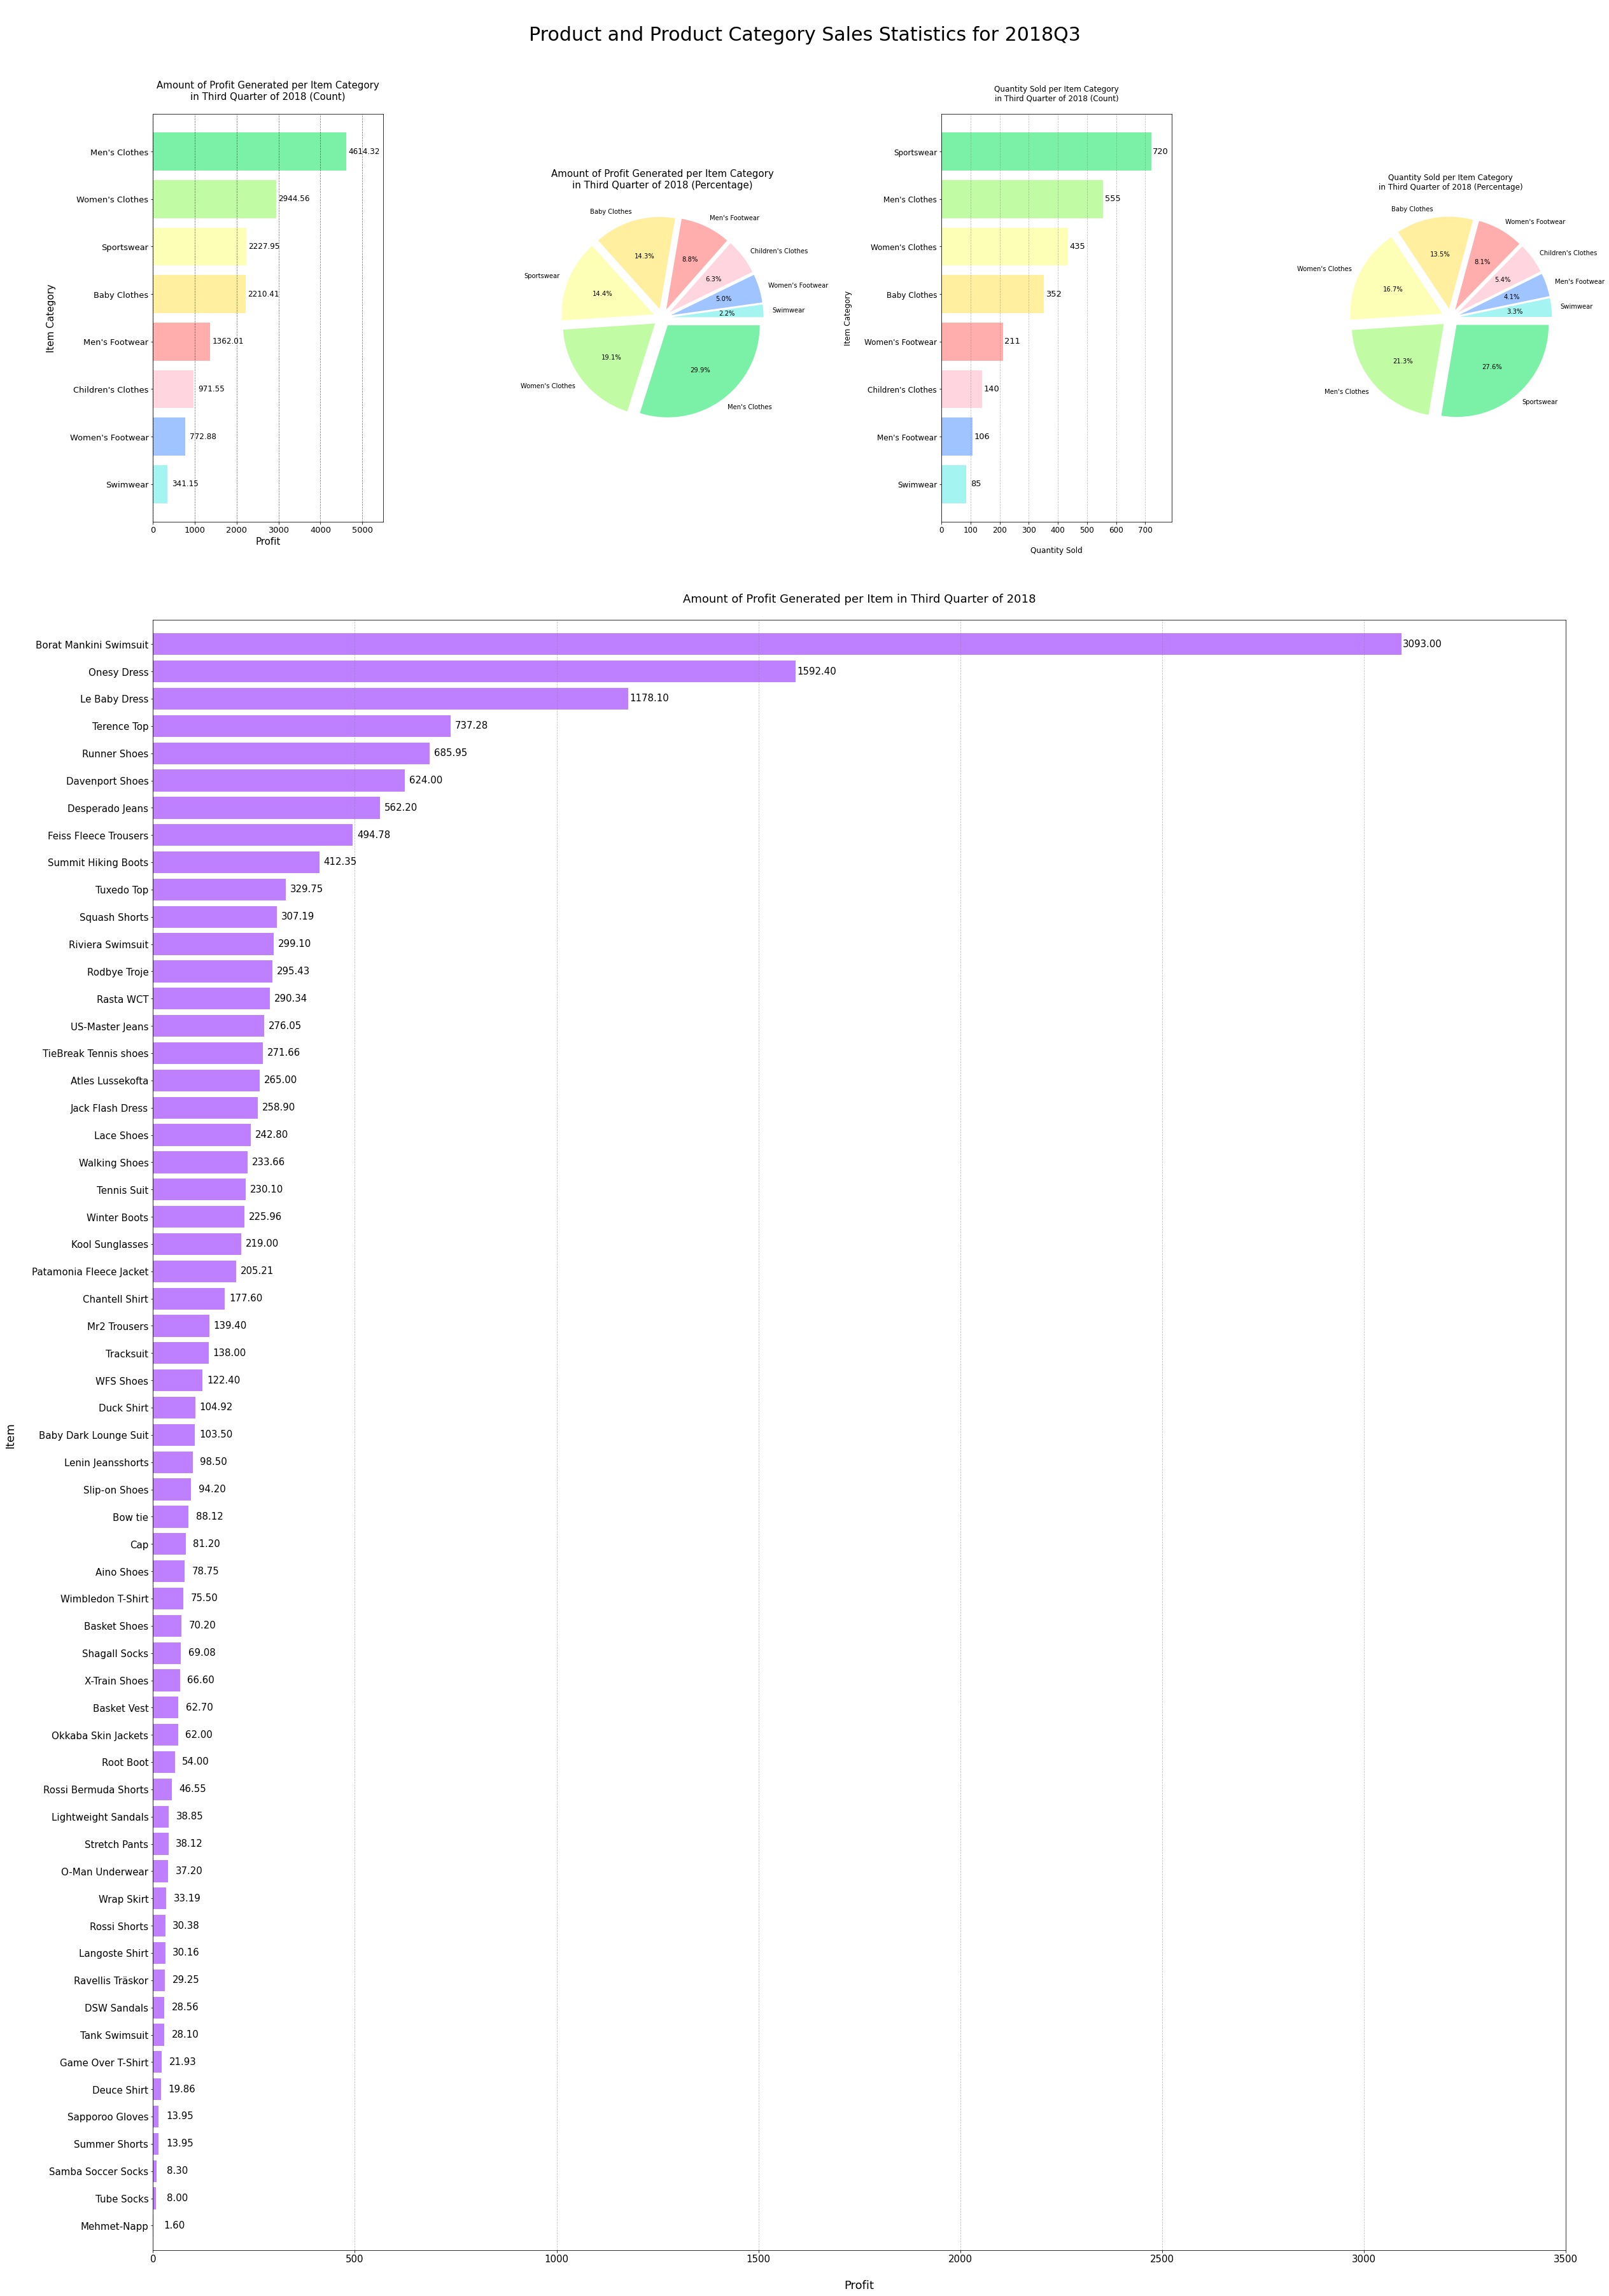

In [32]:
# Create a figure to be used as a dashboard
fig = plt.figure(figsize=(35,50), constrained_layout=True)

# Use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows=2, ncols=4, height_ratios=[1,4], figure=fig)
#-----------------------------------------------------------------------------

# Define subplots and their corresponding positions
ax1 = fig.add_subplot(gs[0, 0])
ax1.barh(prof2018index, prof2018, color = colors, align = 'center')

#showing tile/x-axis/y-axis of graph
ax1.set_title('\nAmount of Profit Generated per Item Category\nin Third Quarter of 2018 (Count)\n', fontsize = 15)
ax1.set_xlabel('Profit\n', fontsize = 15)
ax1.set_ylabel('Item Category\n', fontsize = 15)

#set axis limits
ax1.set_xlim(left = 0, right = 5500)

#set range for x and y axis
ax1.tick_params(axis='x', labelsize = 13)
ax1.tick_params(axis='y', labelsize = 13)

#display data labels
for x,y in zip(prof2018index, prof2018):
    
    label = float(y)
    
    ax1.annotate('{:.2f}'.format(label), (y,x), fontsize = 12, textcoords = 'offset points', xytext = (28,-3), ha = 'center')

#set gridlines
ax1.grid(axis = 'x', c = 'k', alpha = .5, linestyle = '--')
#-----------------------------------------------------------------------------

ax2 = fig.add_subplot(gs[0, 1])

ax2.set_title('\nAmount of Profit Generated per Item Category\nin Third Quarter of 2018 (Percentage)\n', fontsize = 15)

ax2.pie(prof2018, explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1), labels = prof2018index, colors = colors, autopct='%1.1f%%')
#-----------------------------------------------------------------------------

ax3 = fig.add_subplot(gs[0, 2])

ax3.barh(quant2018_index, quant2018, color = colors, align = 'center')

#showing tile/x-axis/y-axis of graph
ax3.set_title('\nQuantity Sold per Item Category\nin Third Quarter of 2018 (Count)\n', fontsize = 12)
ax3.set_xlabel('\nQuantity Sold', fontsize = 12)
ax3.set_ylabel('Item Category\n', fontsize = 12)

#set range for x and y axis
ax3.tick_params(axis='x', labelsize = 12)
ax3.tick_params(axis='y', labelsize = 12)
ax3.set_xlim(left = 0, right = 790)


#display data labels
for x,y in zip(quant2018_index, quant2018):
    
    label = int(y)
    
    plt.annotate(label, (y,x), fontsize = 13, textcoords = 'offset points', xytext = (15,-3), ha = 'center')
    
#set gridlines
ax3.grid(axis = 'x', c = 'grey', alpha = .5, linestyle = '--')
#-----------------------------------------------------------------------------

ax4 = fig.add_subplot(gs[0, 3])

ax4.set_title('\nQuantity Sold per Item Category\nin Third Quarter of 2018 (Percentage)\n', fontsize = 12)

ax4.pie(quant2018, explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1), labels=quant2018_index, colors = colors, autopct='%1.1f%%')
#-----------------------------------------------------------------------------

ax5 = fig.add_subplot(gs[1, :])

#align = 'center' makesd the name of bar aligned to centert of bar
ax5.barh(itemprof2018_index, itemprof2018, color = '#bf80ff', align = 'center')

#showing tile/x-axis/y-axis of graph
ax5.set_title('\nAmount of Profit Generated per Item in Third Quarter of 2018\n', fontsize = 18)
ax5.set_xlabel('\nProfit', fontsize = 18)
ax5.set_ylabel('Item\n', fontsize = 18)

ax5.set_xlim(left = 0, right = 3500)
ax5.set_ylim(bottom = -0.9, top = 58.9)

#set axis font size
ax5.tick_params(axis='x', labelsize = 15)
ax5.tick_params(axis='y', labelsize = 15)

#display data labels
for x,y in zip(itemprof2018_index, itemprof2018):
    
    label = y
    
    plt.annotate('{:.2f}'.format(label), (y,x), fontsize = 15, textcoords = 'offset points', xytext = (33,-4), ha = 'center')

#set gridlines
ax5.grid(axis = 'x', c = 'grey', alpha = .5, linestyle = '--')

# Set title of dashboard
fig.suptitle("\nProduct and Product Category Sales Statistics for 2018Q3\n", fontsize=30)

# Display plot
plt.show()

This dashboard was created to allow for a quick overview on how well each item and their item category has sold for the financial quarter of 2018Q3

[back to top](#1)

## 6.3 Product Category Profit Gained VS Quantity Sold<a id='6.3'></a>

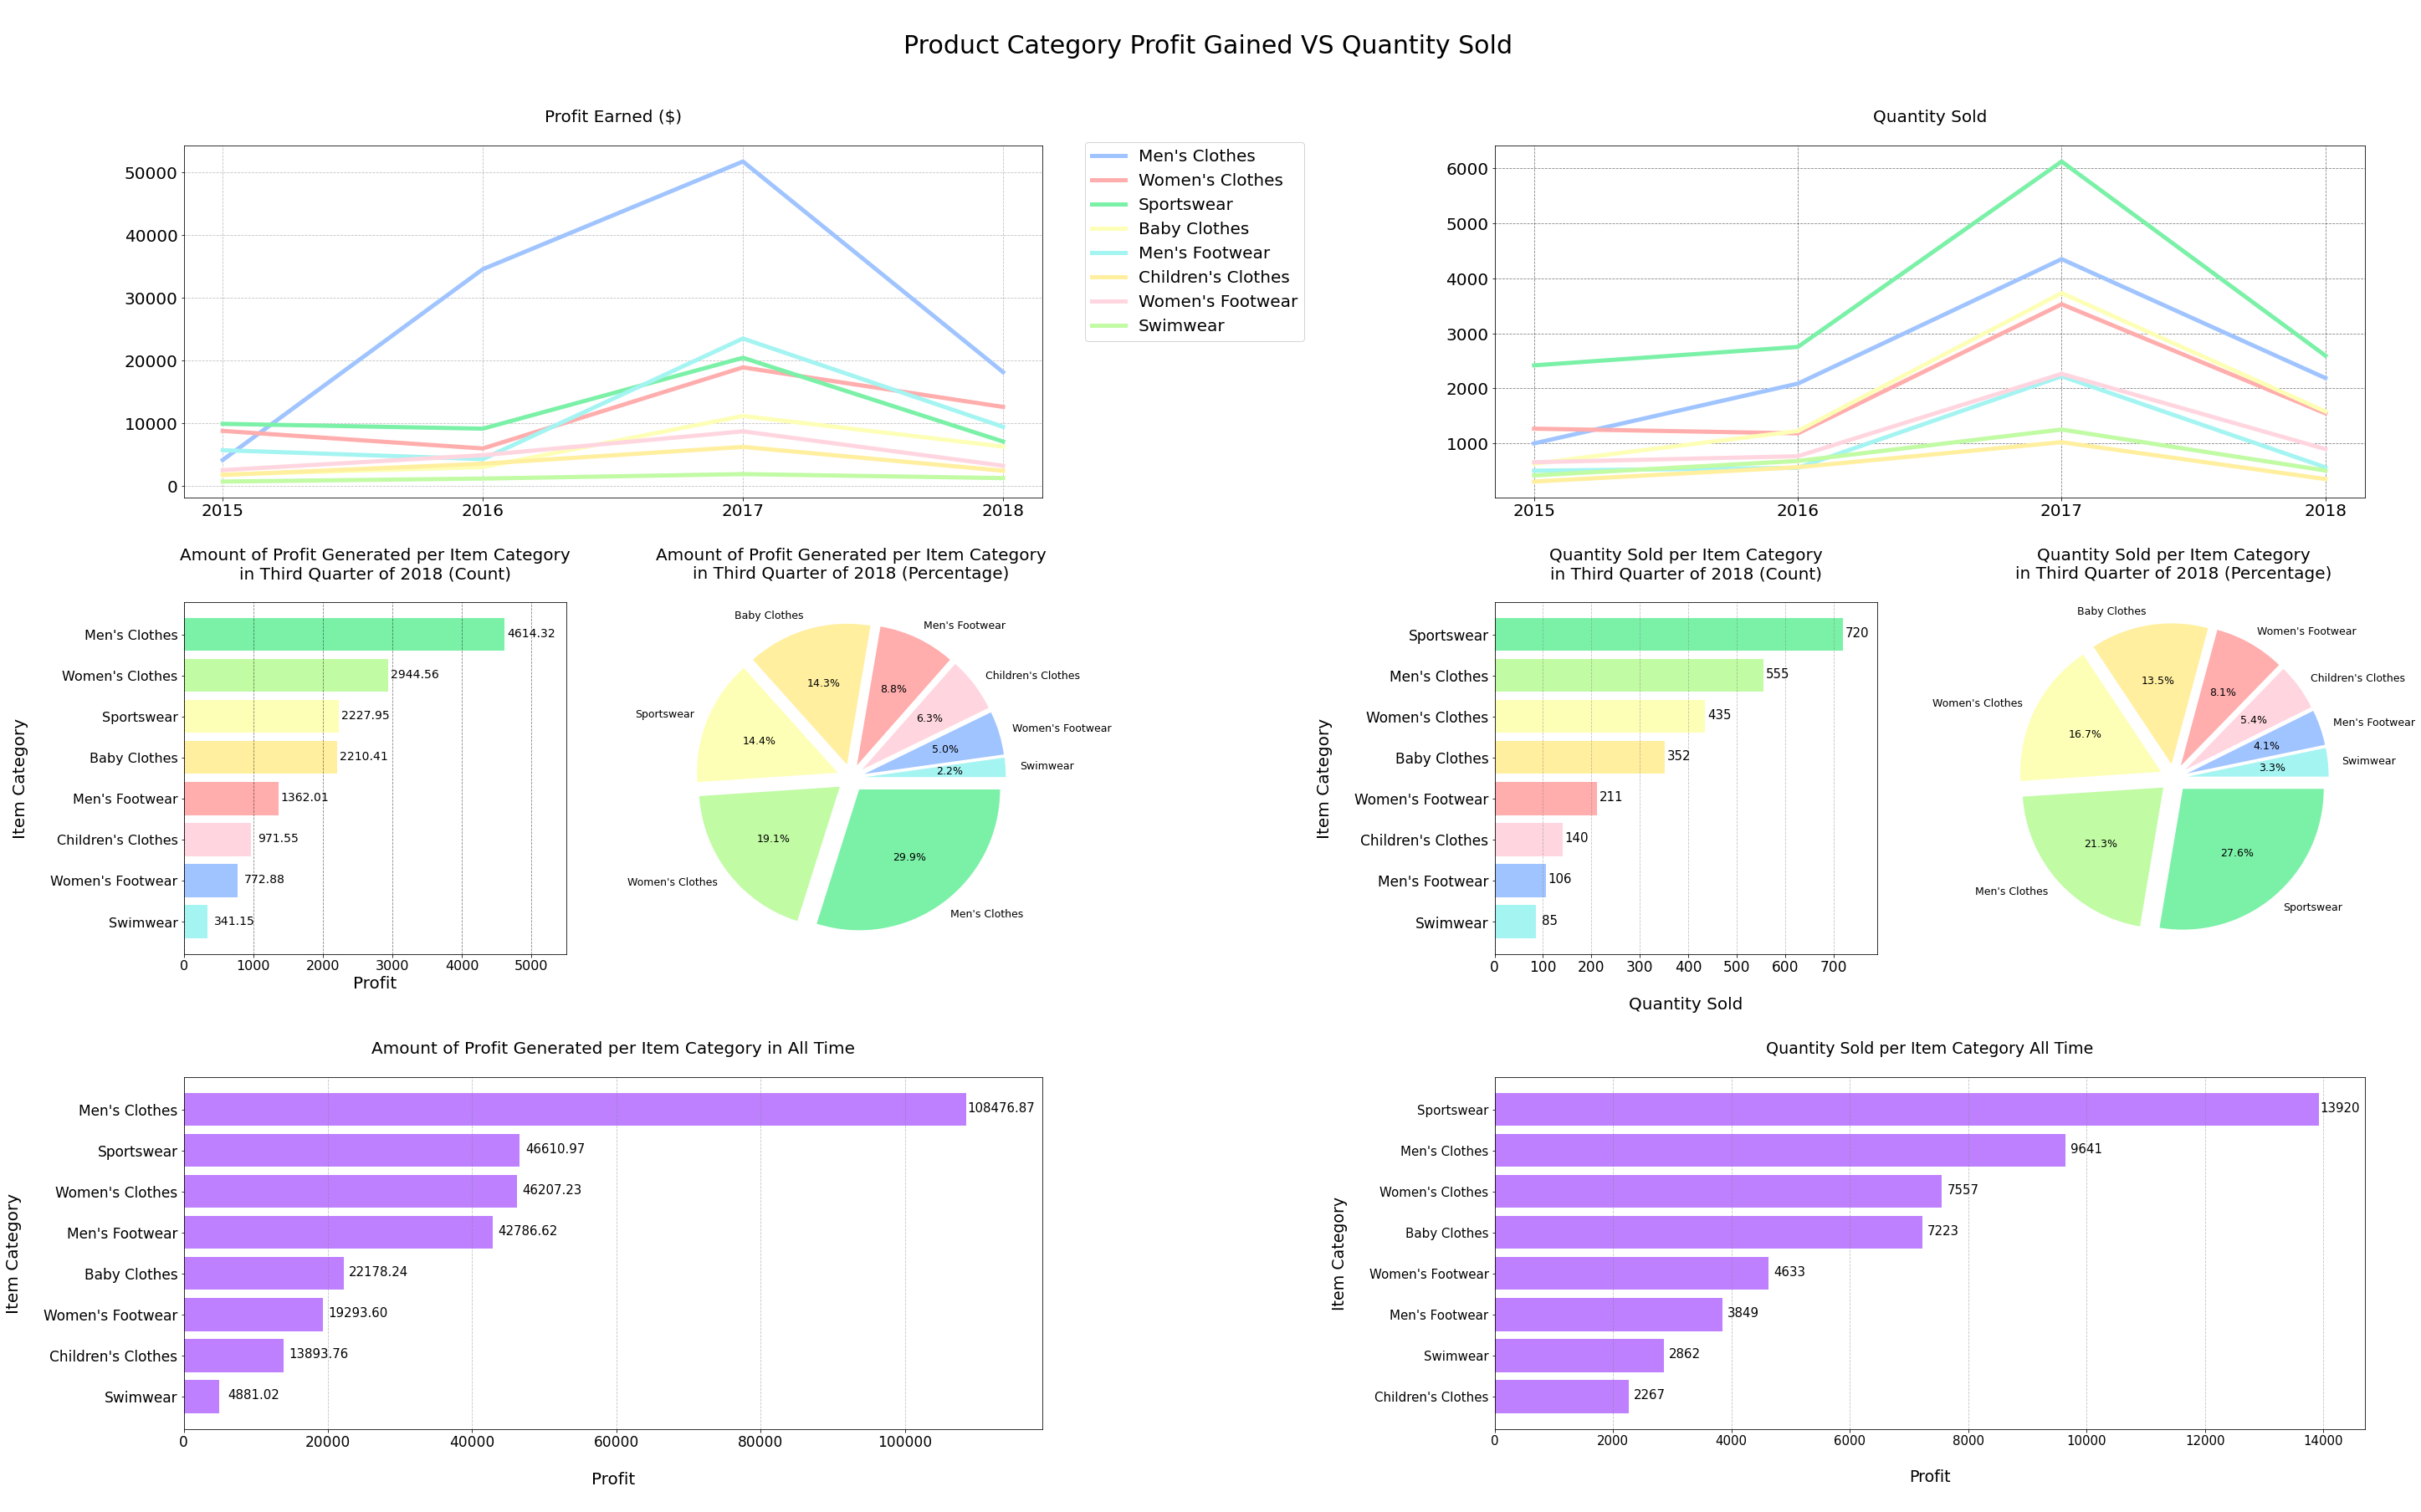

In [33]:
# Create a figure to be used as a dashboard
fig = plt.figure(figsize=(40,25), constrained_layout=True)

# Use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows=3, ncols=4, figure=fig)
#-----------------------------------------------------------------------------

# Define subplots and their corresponding positions
ax1 = fig.add_subplot(gs[0, 2:])

#plot the lines
ax1.plot(year, pc_q1, '#a0c4ff', linewidth = 5, label = 'Men\'s Clothes')
ax1.plot(year, pc_q2, '#ffadad', linewidth = 5, label = 'Women\'s Clothes')
ax1.plot(year, pc_q3, '#7bf1a8', linewidth = 5, label = 'Sportswear')
ax1.plot(year, pc_q4, '#fdffb6', linewidth = 5, label = 'Baby Clothes')
ax1.plot(year, pc_q5, '#a4f4f2', linewidth = 5, label = 'Men\'s Footwear')
ax1.plot(year, pc_q6, '#ffef9f', linewidth = 5, label = 'Children\'s Clothes')
ax1.plot(year, pc_q7, '#ffd6e0', linewidth = 5, label = 'Women\'s Footwear')
ax1.plot(year, pc_q8, '#c1fba4', linewidth = 5, label = 'Swimwear')

#set the plot title
ax1.set_title('\nQuantity Sold\n', fontsize = 20)

#set the marker size 
ax1.tick_params(axis='x', labelsize = 20)
ax1.tick_params(axis='y', labelsize = 20)

#set gridlines
ax1.grid(c = 'k', alpha = .5, linestyle = '--')
#-----------------------------------------------------------------------
ax2 = fig.add_subplot(gs[0, :2])

#plot the lines
plt.plot(year, pc_p1, '#a0c4ff', linewidth = 5, label = 'Men\'s Clothes')
plt.plot(year, pc_p2, '#ffadad', linewidth = 5, label = 'Women\'s Clothes')
plt.plot(year, pc_p3, '#7bf1a8', linewidth = 5, label = 'Sportswear')
plt.plot(year, pc_p4, '#fdffb6', linewidth = 5, label = 'Baby Clothes')
plt.plot(year, pc_p5, '#a4f4f2', linewidth = 5, label = 'Men\'s Footwear')
plt.plot(year, pc_p6, '#ffef9f', linewidth = 5, label = 'Children\'s Clothes')
plt.plot(year, pc_p7, '#ffd6e0', linewidth = 5, label = 'Women\'s Footwear')
plt.plot(year, pc_p8, '#c1fba4', linewidth = 5, label = 'Swimwear')

#set the plot title
plt.title('\nProfit Earned ($)\n', fontsize = 20)

#set the marker size
plt.tick_params(axis='x', labelsize = 20)
plt.tick_params(axis='y', labelsize = 20)

#set gridlines
plt.grid(c = 'grey', alpha = .5, linestyle = '--')

#set legend
plt.legend(fontsize = 20, loc=(1.05,0.445))
#-----------------------------------------------------------------------------

ax3 = fig.add_subplot(gs[1, 0])

ax3.barh(prof2018index, prof2018, color = colors, align = 'center')

#showing tile/x-axis/y-axis of graph
ax3.set_title('\nAmount of Profit Generated per Item Category\nin Third Quarter of 2018 (Count)\n', fontsize = 20)
ax3.set_xlabel('Profit\n', fontsize = 20)
ax3.set_ylabel('Item Category\n', fontsize = 20)

#set axis limits
ax3.set_xlim(left = 0, right = 5500)

#set range for x and y axis
ax3.tick_params(axis='x', labelsize = 16)
ax3.tick_params(axis='y', labelsize = 16)

#display data labels
for x,y in zip(prof2018index, prof2018):
    
    label = float(y)
    
    ax3.annotate('{:.2f}'.format(label), (y,x), fontsize = 14, textcoords = 'offset points', xytext = (32,-3), ha = 'center')

#set gridlines
ax3.grid(axis = 'x', c = 'k', alpha = .5, linestyle = '--')

#-----------------------------------------------------------------------------
ax4 = fig.add_subplot(gs[1, 1])

ax4.set_title('\nAmount of Profit Generated per Item Category\nin Third Quarter of 2018 (Percentage)\n', fontsize = 20)

ax4.pie(prof2018, explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1), labels = prof2018index, colors = colors, autopct='%1.1f%%', textprops={'fontsize': 12.5})
#-----------------------------------------------------------------------------

ax5 = fig.add_subplot(gs[1, 2])

ax5.barh(quant2018_index, quant2018, color = colors, align = 'center')

#showing tile/x-axis/y-axis of graph
ax5.set_title('\nQuantity Sold per Item Category\nin Third Quarter of 2018 (Count)\n', fontsize = 20)
ax5.set_xlabel('\nQuantity Sold', fontsize = 20)
ax5.set_ylabel('Item Category\n', fontsize = 20)

#set range for x and y axis
ax5.tick_params(axis='x', labelsize = 17)
ax5.tick_params(axis='y', labelsize = 17)
ax5.set_xlim(left = 0, right = 790)


#display data labels
for x,y in zip(quant2018_index, quant2018):
    
    label = int(y)
    
    ax5.annotate(label, (y,x), fontsize = 15, textcoords = 'offset points', xytext = (17,-3), ha = 'center')
    
#set gridlines
ax5.grid(axis = 'x', c = 'grey', alpha = .5, linestyle = '--')
#-----------------------------------------------------------------------------
ax6 = fig.add_subplot(gs[1, 3])

ax6.set_title('\nQuantity Sold per Item Category\nin Third Quarter of 2018 (Percentage)\n', fontsize = 20)

ax6.pie(quant2018, explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1), labels=quant2018_index, colors = colors, autopct='%1.1f%%', textprops={'fontsize': 12.5})
#-----------------------------------------------------------------------------  
ax7 = fig.add_subplot(gs[2, :2])

ax7.barh(profallindex, profall, color = '#bf80ff', align = 'center')

#showing tile/x-axis/y-axis of graph
ax7.set_title('\nAmount of Profit Generated per Item Category in All Time\n', fontsize = 20)
ax7.set_xlabel('\nProfit\n', fontsize = 20)
ax7.set_ylabel('Item Category\n', fontsize = 20)
ax7.set_xlim(left = 0, right = 119000)

#set range for x and y axis
ax7.tick_params(axis='x', labelsize = 17)
ax7.tick_params(axis='y', labelsize = 17)

#display data labels
for x,y in zip(profallindex, profall):
    
    label = float(y)
    
    ax7.annotate('{:.2f}'.format(label), (y,x), fontsize = 15, textcoords = 'offset points', xytext = (42,-3), ha = 'center')

    #set gridlines
ax7.grid(axis = 'x', c = 'grey', alpha = .5, linestyle = '--')
#-----------------------------------------------------------------------------
ax8 = fig.add_subplot(gs[2, 2:])

ax8.barh(quantall_index, quantall, color = '#bf80ff', align = 'center')

#showing tile/x-axis/y-axis of graph
ax8.set_title('\nQuantity Sold per Item Category All Time\n', fontsize = 19)
ax8.set_xlabel('\nProfit\n', fontsize = 19)
ax8.set_ylabel('Item Category\n', fontsize = 19)
ax8.set_xlim(left = 0, right = 14700)

#set axis font size
ax8.tick_params(axis='x', labelsize = 15)
ax8.tick_params(axis='y', labelsize = 15)

#display data labels
for x,y in zip(quantall_index, quantall):
    
    label = y
    
    ax8.annotate(label, (y,x), fontsize = 15, textcoords = 'offset points', xytext = (25,-3), ha = 'center')

#set gridlines
ax8.grid(axis = 'x', c = 'grey', alpha = .5, linestyle = '--')

fig.suptitle("\nProduct Category Profit Gained VS Quantity Sold\n", fontsize=30)

plt.show()

This dashboard was created for so that the product categories' Profit gained and quantity sold can be compared. It was with the goal of allowing users to see which item categories should be prioritised on for the year 2019 to help the company garner more sales.

[back to top](#1)

## 6.4 Customer Sales Statistics for 2018Q3 <a id='6.4'></a>

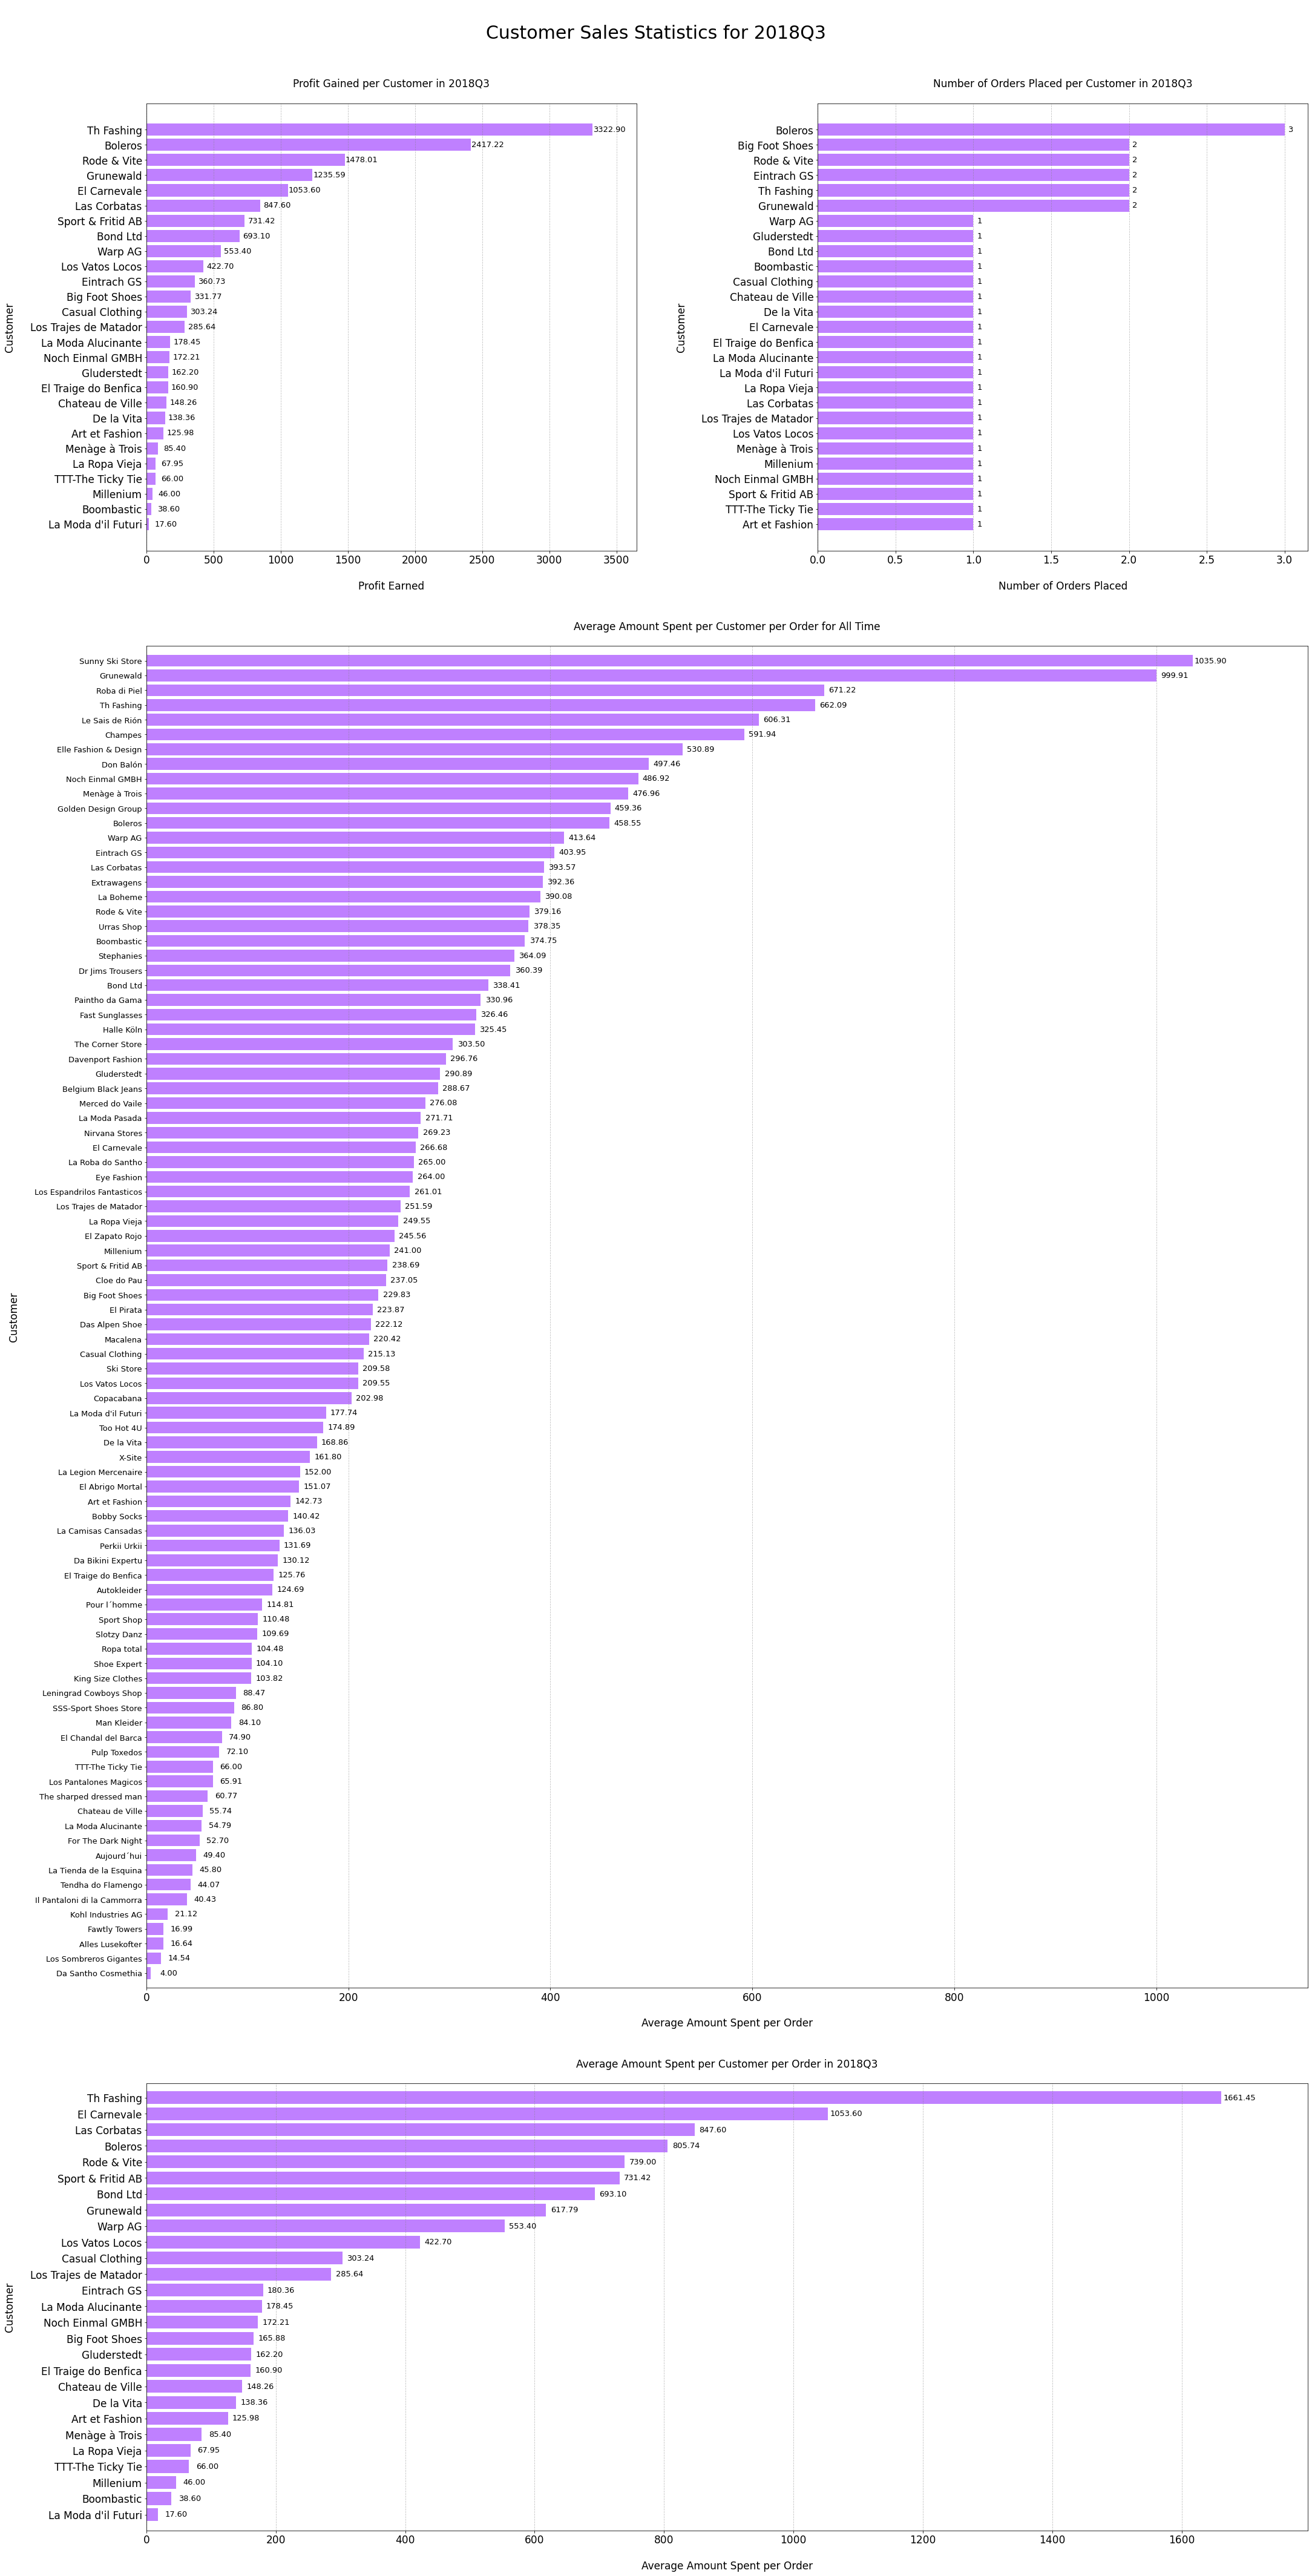

In [34]:
# Create a figure to be used as a dashboard
fig = plt.figure(figsize=(30,59), constrained_layout=True)

# Use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows=3, ncols=2,  height_ratios=[1,3, 1], figure=fig)
#-----------------------------------------------------------------------------

# Define subplots and their corresponding positions
ax1 = fig.add_subplot(gs[0, 0])

ax1.barh(customerprof18_index, customerprof18, color = '#bf80ff', align = 'center')

#showing tile/x-axis/y-axis of graph
ax1.set_title('\nProfit Gained per Customer in 2018Q3\n', fontsize = 17)
ax1.set_xlabel('\nProfit Earned', fontsize = 17)
ax1.set_ylabel('Customer\n', fontsize = 17)
ax1.set_xlim(left = 0, right = 3650)


#set range for x and y axis
ax1.tick_params(axis='x', labelsize = 17)
ax1.tick_params(axis='y', labelsize = 17)

#display data labels
for x,y in zip(customerprof18_index, customerprof18):
    
    label = y
    
    ax1.annotate('{:.2f}'.format(label), (y,x), fontsize = 13, textcoords = 'offset points', xytext = (28,-3.5), ha = 'center')
    
#set gridlines
ax1.grid(axis = 'x', c = 'grey', alpha = .5, linestyle = '--')
#-----------------------------------------------------------------------------
ax2 = fig.add_subplot(gs[0, 1])

ax2.barh(customerorder18_index, customerorder18, color = '#bf80ff', align = 'center')

#showing tile/x-axis/y-axis of graph
ax2.set_title('\nNumber of Orders Placed per Customer in 2018Q3\n', fontsize = 17)
ax2.set_xlabel('\nNumber of Orders Placed', fontsize = 17)
ax2.set_ylabel('Customer\n', fontsize = 17)

#set range for x and y axis
ax2.tick_params(axis='x', labelsize = 17)
ax2.tick_params(axis='y', labelsize = 17)

#display data labels
for x,y in zip(customerorder18_index, customerorder18):
    
    label = int(y)
    
    ax2.annotate(label, (y,x), fontsize = 13, textcoords = 'offset points', xytext = (10,-3.5), ha = 'center')
    
#set gridlines
ax2.grid(axis = 'x', c = 'grey', alpha = .5, linestyle = '--')
#-----------------------------------------------------------------------------

ax3 = fig.add_subplot(gs[1, :])

ax3.barh(aveind, custave, color = '#bf80ff', align = 'center')

#showing tile/x-axis/y-axis of graph
ax3.set_title('\nAverage Amount Spent per Customer per Order for All Time\n', fontsize = 17)
ax3.set_xlabel('\nAverage Amount Spent per Order', fontsize = 17)
ax3.set_ylabel('Customer\n', fontsize = 17)

ax3.set_xlim(left = 0, right =1150)
ax3.set_ylim(bottom = -1, top = 90)

#set range for x and y axis
ax3.tick_params(axis='x', labelsize = 17)
ax3.tick_params(axis='y', labelsize = 13)

#display data labels
for x,y in zip(aveind, custave):
    
    label = y
    
    ax3.annotate('{:.2f}'.format(label), (y,x), fontsize = 13, textcoords = 'offset points', xytext = (30,-3.5), ha = 'center')
    
#set gridlines
ax3.grid(axis = 'x', c = 'grey', alpha = .5, linestyle = '--')

#-----------------------------------------------------------------------------

ax4 = fig.add_subplot(gs[2, :])

ax4.barh(aveind18, custave18, color = '#bf80ff', align = 'center')

#showing tile/x-axis/y-axis of graph
ax4.set_title('\nAverage Amount Spent per Customer per Order in 2018Q3\n', fontsize = 17)
ax4.set_xlabel('\nAverage Amount Spent per Order', fontsize = 17)
ax4.set_ylabel('Customer\n', fontsize = 17)

ax4.set_xlim(left = 0, right =1795)
ax4.set_ylim(bottom = -1, top = 26.9)

#set range for x and y axis
ax4.tick_params(axis='x', labelsize = 17)
ax4.tick_params(axis='y', labelsize = 17)

#display data labels
for x,y in zip(aveind18, custave18):
    
    label = y
    
    ax4.annotate('{:.2f}'.format(label), (y,x), fontsize = 13, textcoords = 'offset points', xytext = (30,-3.5), ha = 'center')
    
#set gridlines
ax4.grid(axis = 'x', c = 'grey', alpha = .5, linestyle = '--')

fig.suptitle("\nCustomer Sales Statistics for 2018Q3\n", fontsize=30)

plt.show()

This dashboard was made so that customer spending habits is 2018Q3 can be compared to their previous spending habits so that it can be more easily determined which customer is not spending as much as usual, so that the company can remedy that to increase their business in 2019.

[back to top](#1)

## 6.5 Country Sales Satistics for 2018Q3 <a id='6.5'></a>

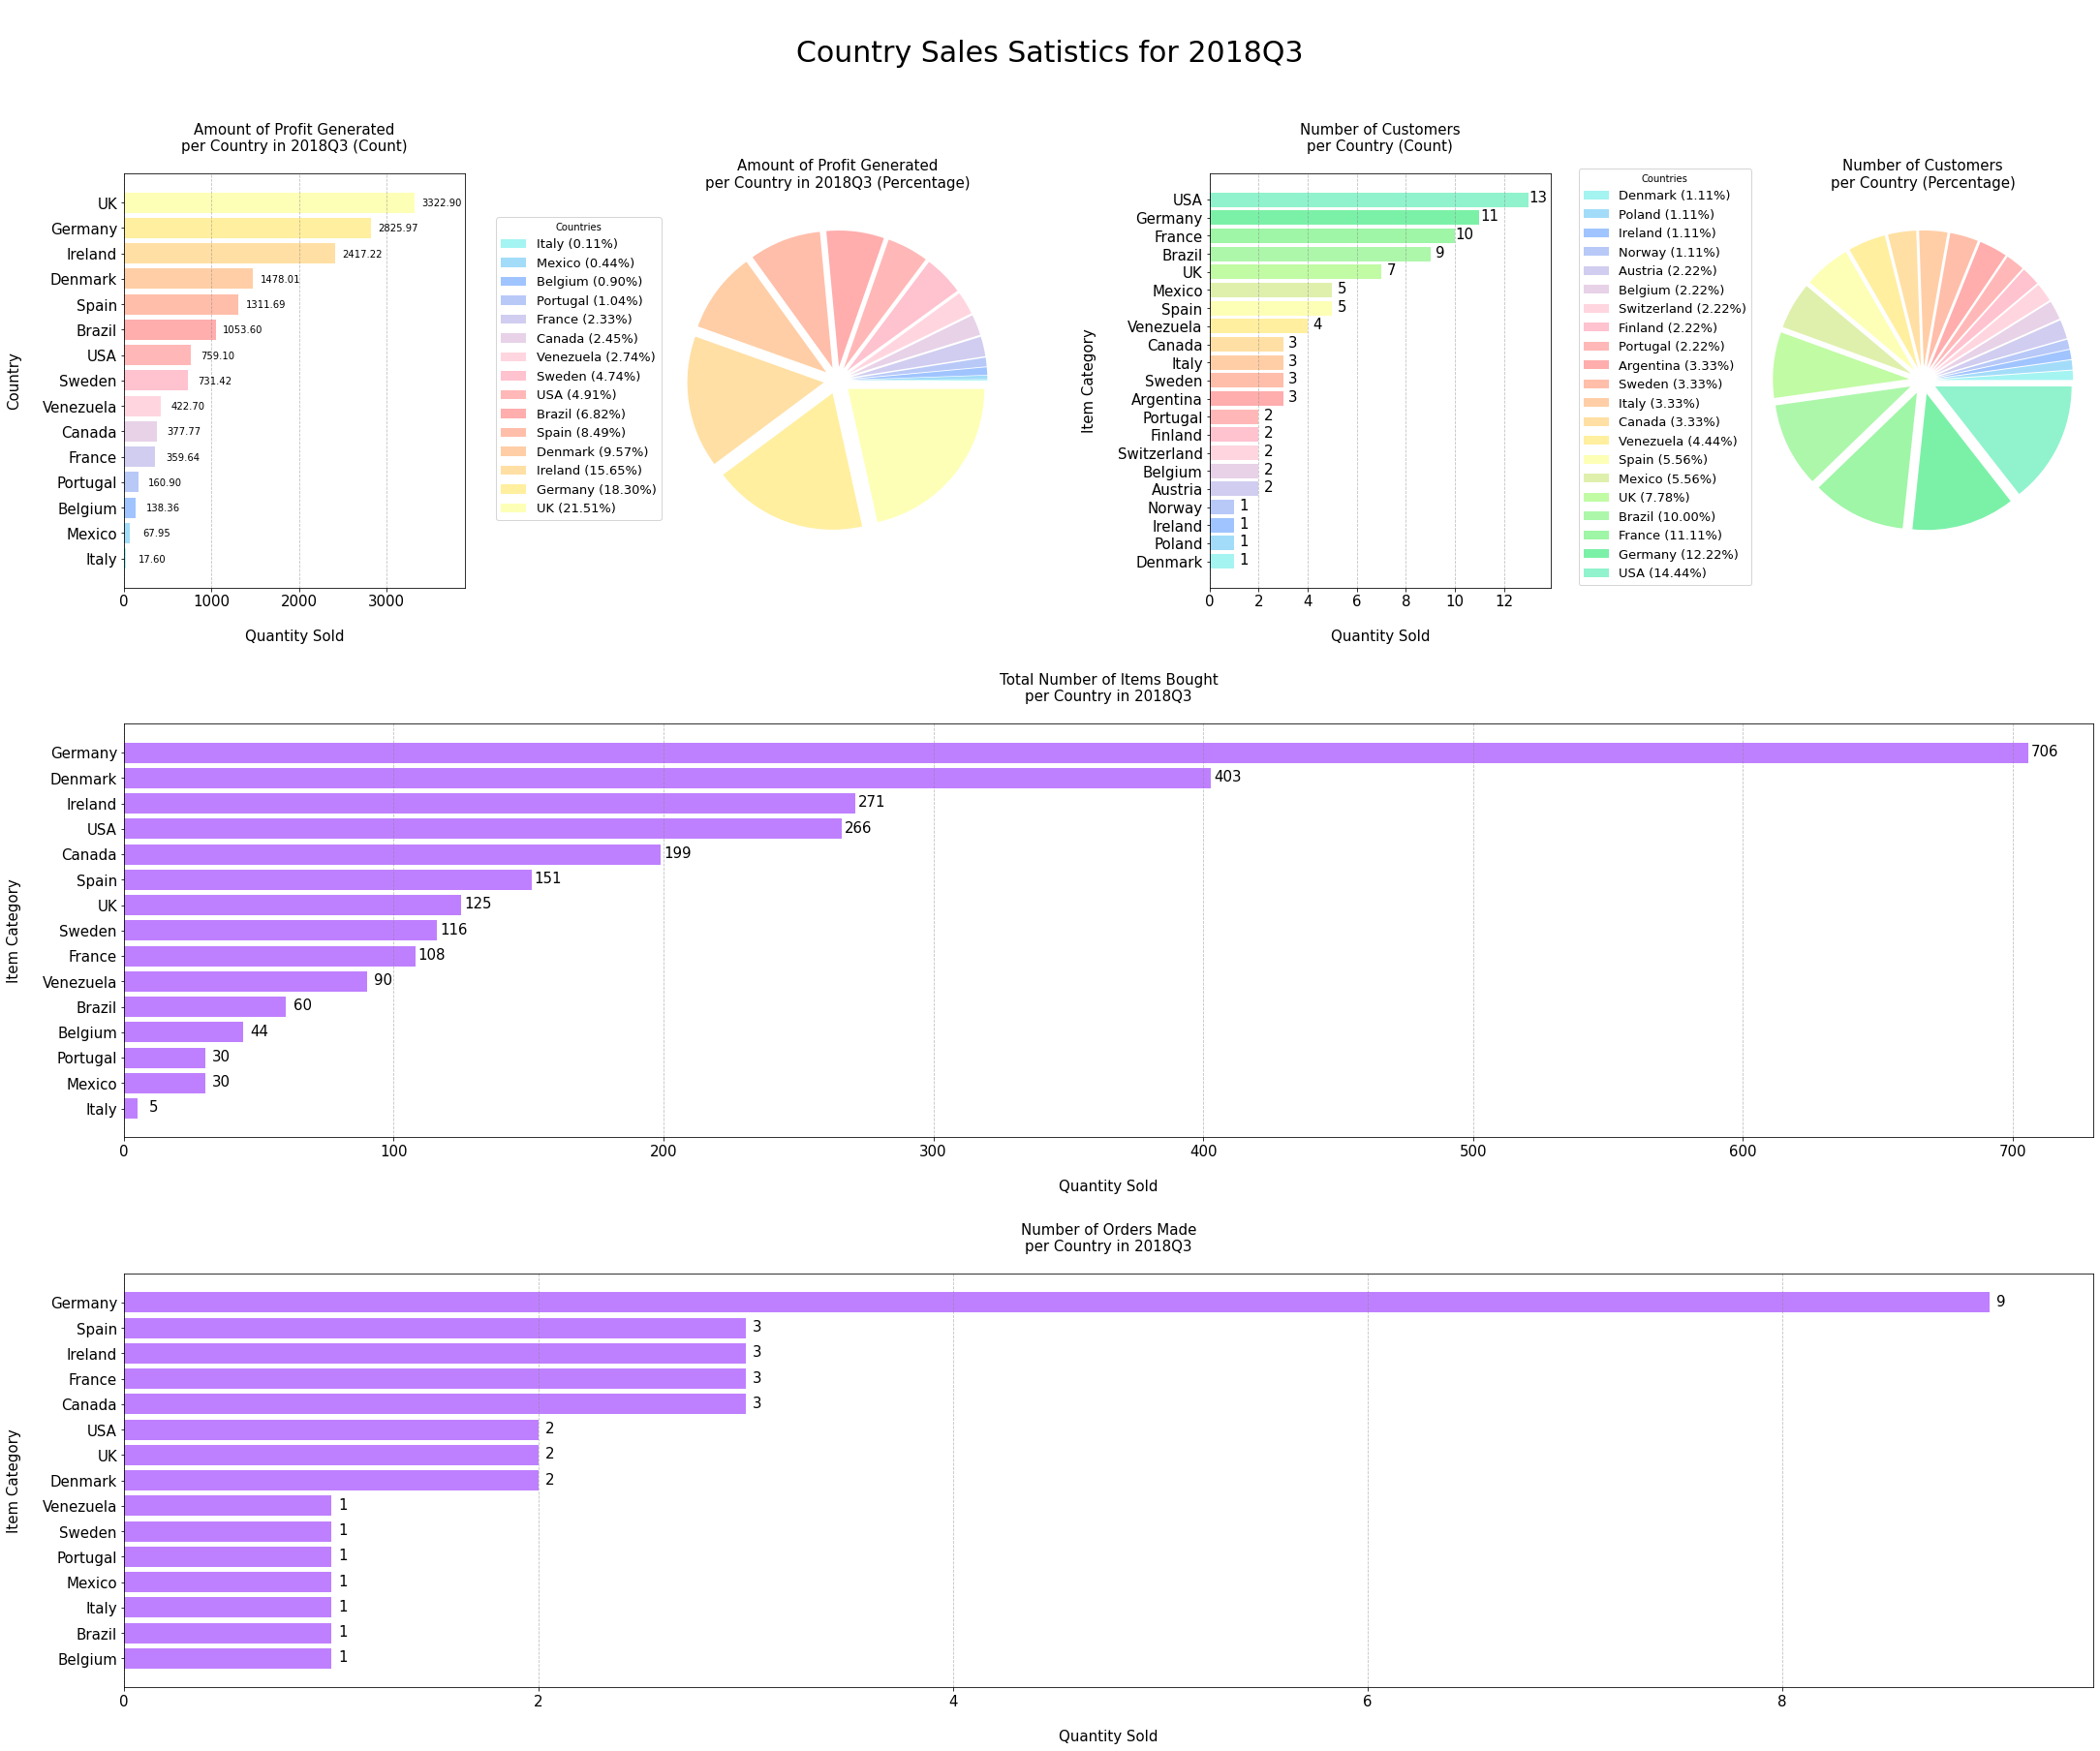

In [37]:
# Create a figure to be used as a dashboard
fig = plt.figure(figsize=(30,25), constrained_layout=True)

# Use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows=3, ncols=4, figure=fig)
#-----------------------------------------------------------------------------

# Define subplots and their corresponding positions
ax1 = fig.add_subplot(gs[0, 0])

ax1.barh(countryprof18_index, countryprof18, color = extendedcolors, align = 'center')

#showing tile/x-axis/y-axis of graph
ax1.set_title('\nAmount of Profit Generated\nper Country in 2018Q3 (Count)\n', fontsize = 15)
ax1.set_xlabel('\nQuantity Sold', fontsize = 15)
ax1.set_ylabel('Country\n', fontsize = 15)
ax1.set_xlim(left = 0, right = 3900)

#set range for x and y axis
ax1.tick_params(axis='x', labelsize = 15)
ax1.tick_params(axis='y', labelsize = 15)

#display data labels
for x,y in zip(countryprof18_index, countryprof18):
    
    label = y
    
    ax1.annotate('{:.2f}'.format(label), (y,x), fontsize = 10, textcoords = 'offset points', xytext = (28,-3.5), ha = 'center')
    
#set gridlines
ax1.grid(axis = 'x', c = 'grey', alpha = .5, linestyle = '--')
#-----------------------------------------------------------------------------

ax2 = fig.add_subplot(gs[0, 1])

ax2.set_title('\nAmount of Profit Generated\nper Country in 2018Q3 (Percentage)\n', fontsize = 15)

ax2.pie(countryprof18, explode=(0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1), colors = extendedcolors)

legend = ['{} ({:.2%})'.format(countryprof18_index, countryprof18/countrytotalprof18) for countryprof18_index, countryprof18 in zip(countryprof18_index, countryprof18)]
ax2.legend(legend, title="Countries",loc=(-0.5,0.09), fontsize=13, bbox_transform=plt.gcf().transFigure)
#-----------------------------------------------------------------------------

ax3 = fig.add_subplot(gs[1, :])

ax3.barh(citemquant18_index, citemquant18, color = '#bf80ff', align = 'center')

#showing tile/x-axis/y-axis of graph
ax3.set_title('\nTotal Number of Items Bought\nper Country in 2018Q3\n', fontsize = 15)
ax3.set_xlabel('\nQuantity Sold', fontsize = 15)
ax3.set_ylabel('Item Category\n', fontsize = 15)
ax3.set_xlim(left = 0, right = 730)

#set range for x and y axis
ax3.tick_params(axis='x', labelsize = 15)
ax3.tick_params(axis='y', labelsize = 15)

#display data labels
for x,y in zip(citemquant18_index, citemquant18):
    
    label = int(y)
    
    ax3.annotate(label, (y,x), fontsize = 15, textcoords = 'offset points', xytext = (17,-3.5), ha = 'center')
    
#set gridlines
ax3.grid(axis = 'x', c = 'grey', alpha = .5, linestyle = '--')

#-----------------------------------------------------------------------------
ax4 = fig.add_subplot(gs[2, :])

ax4.barh(ctotalorder18_index, ctotalorder18, color = '#bf80ff', align = 'center')

#showing tile/x-axis/y-axis of graph
ax4.set_title('\nNumber of Orders Made\nper Country in 2018Q3\n', fontsize = 15)
ax4.set_xlabel('\nQuantity Sold', fontsize = 15)
ax4.set_ylabel('Item Category\n', fontsize = 15)
ax4.set_xlim(left = 0, right = 9.5)

#set range for x and y axis
ax4.tick_params(axis='x', labelsize = 15)
ax4.tick_params(axis='y', labelsize = 15)

#display data labels
for x,y in zip(ctotalorder18_index, ctotalorder18):
    
    label = int(y)
    
    ax4.annotate(label, (y,x), fontsize = 15, textcoords = 'offset points', xytext = (12,-3.5), ha = 'center')
    
#set gridlines
ax4.grid(axis = 'x', c = 'grey', alpha = .5, linestyle = '--')

#-----------------------------------------------------------------------------
ax5 = fig.add_subplot(gs[0, 2])

ax5.barh(country_index, country, color = extendedcolors, align = 'center')

#showing tile/x-axis/y-axis of graph
ax5.set_title('\nNumber of Customers\nper Country (Count)\n', fontsize = 15)
ax5.set_xlabel('\nQuantity Sold', fontsize = 15)
ax5.set_ylabel('Item Category\n', fontsize = 15)
ax5.set_xlim(left = 0, right = 13.9)

#set range for x and y axis
ax5.tick_params(axis='x', labelsize = 15)
ax5.tick_params(axis='y', labelsize = 15)

#display data labels
for x,y in zip(country_index, country):
    
    label = int(y)
    
    ax5.annotate(label, (y,x), fontsize = 15, textcoords = 'offset points', xytext = (10,-3), ha = 'center')
    
#set gridlines
ax5.grid(axis = 'x', c = 'grey', alpha = .5, linestyle = '--')

#-----------------------------------------------------------------------------
ax6 = fig.add_subplot(gs[0, 3])

ax6.set_title('\nNumber of Customers\nper Country (Percentage)\n', fontsize = 15)
ax6.pie(country, explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1), colors = extendedcolors)

legend = ['{} ({:.2%})'.format(country_index, country/custtotal) for country_index, country in zip(country_index, country)]
ax6.legend(legend, title="Countries", loc=(-0.51,-0.1), fontsize=13, bbox_transform=plt.gcf().transFigure)

fig.suptitle("\nCountry Sales Satistics for 2018Q3\n", fontsize=30)

plt.show()

This dashboard is meant to show which countries a majority of the sales in 2018Q3 was made from. This is made so that the company can determine which countries should be prioritised for the next year so as to increase business, revenue, and profits for 2019.

[back to top](#1)

# 7. What may be done in 2019 to increase profit/revenue? <a id='7'></a>


Comparing the [profits gained](#3.2.1) and [quantity sold](#3.2.2) in the financial quarter of 2018Q3 as well as the trends in the graphs at [3.1.2](#3.1.2), I believe that the first thing that can be done is to increase the unit price for the items in Sportswear, Baby Clothes and Woman's Clothes.

This is especially so for sportswear since it has constantly been the best selling item category from 2015 - 2018Q3, which is th entire range of data I had, with the exception of 2014Q4. However, the profits gained is lower than that of categories which do not have as good of sales, which I will get back to later. By increasing the unit price, the amount of revenue gained as well as profits gained from these categories will increase since they, especially sportswear, has constantly been best selling categories. Therefore, allowing me to assume that a higher profit/revenue can be gained from them in 2019.

Secondly, the not as good selling categories like Children's Clothes, Men's Footwear, and Swimwear should be promoted more to increase its popularity with customers. Types of limited time promotions can include, lowering the items' prices for a limited time or selling these items together as a package deal for a limited time. By increasing the popularity of these items, customers are inclined to buy more of them from the company. Then, when the prices are reverted to their original prices, there is a chance that the customers will still continue to buy these items from the company, which can lead to an increase in revenue/profit for the future.

Finally, when looking at [Dashboard 4](#6.4) and [Dashboard 5](#6.5)

The number of customers per country can be seen. To increase the number of customers for 2019, the company can promote their products or look for partnerships with companies/customers in the countries where they are lacking customers so as to increase their number of orders and hence also increase their revenue/profit gained for 2019. While doing so, they can promote their newer or items that their customer are more interested in to their existing customers so as to increase their existing customers' ordering frequency, number of items per order, and amount spent on average for each order to increase the profit and revenue gained, and number of orders gained for 2019. 

[back to top](#1)